<a href="https://colab.research.google.com/github/VivChatPhysics/Photon_Trajectory_Simulations/blob/main/Photontrajectories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

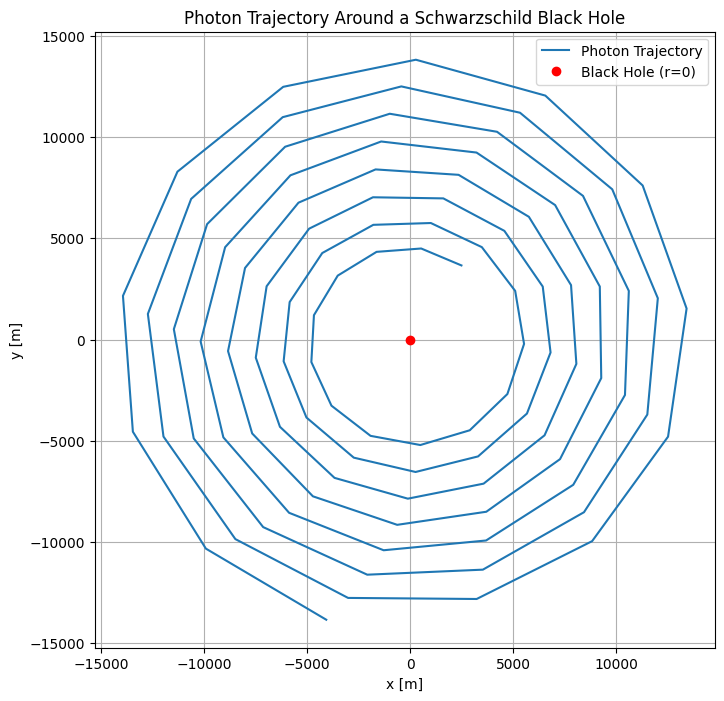

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 1.989e30     # Solar mass (kg)
c = 3e8          # Speed of light (m/s)
rs = 2 * G * M / c**2  # Schwarzschild radius (m)

# Equations of motion
def equations_of_motion(lambda_, y):
    r, phi, t, dr_dlambda, dphi_dlambda, dt_dlambda = y

    # Energy and angular momentum (conserved quantities)
    E = dt_dlambda * (1 - rs / r)
    L = r**2 * dphi_dlambda

    # Derivatives
    d2r_dlambda2 = - (G * M / r**2) * (1 - rs / r) * (E**2 / L**2)
    d2phi_dlambda2 = 0  # No explicit second derivative for phi
    d2t_dlambda2 = 0    # No explicit second derivative for t

    return [dr_dlambda, dphi_dlambda, dt_dlambda, d2r_dlambda2, d2phi_dlambda2, d2t_dlambda2]

# Initial conditions
r0 = 1.5 * rs      # Initial radial distance (arbitrary example)
phi0 = 1000          # Initial angle
t0 = 0            # Initial time
dr_dlambda0 = 1000   # Initial radial velocity (m/s)
dphi_dlambda0 = 1000 # Initial angular velocity (arbitrary value)
dt_dlambda0 = 1000   # Initial time derivative (arbitrary value)

# Integrate the equations of motion
lambda_span = (0, 100)  # Range of affine parameter
y0 = [r0, phi0, t0, dr_dlambda0, dphi_dlambda0, dt_dlambda0]  # Initial conditions

sol = solve_ivp(equations_of_motion, lambda_span, y0, method='RK45', t_eval=np.linspace(0, 10, 100))

# Extract the results
r = sol.y[0]
phi = sol.y[1]

# Convert polar coordinates to Cartesian for plotting
x = r * np.cos(phi)
y = r * np.sin(phi)

# Plot the trajectory
plt.figure(figsize=(8,8))
plt.plot(x, y, label='Photon Trajectory')
plt.plot(0, 0, 'ro', label='Black Hole (r=0)')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.grid(True)
plt.title('Photon Trajectory Around a Schwarzschild Black Hole')
plt.show()


-26.245
-6.245
13.754999999999999
33.755
53.755
73.755
93.755


/tmp/ipython-input-1957759572.py:62: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y = integrate.odeint(flow_deriv, y0, tspan)


OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 640x480 with 1 Axes>

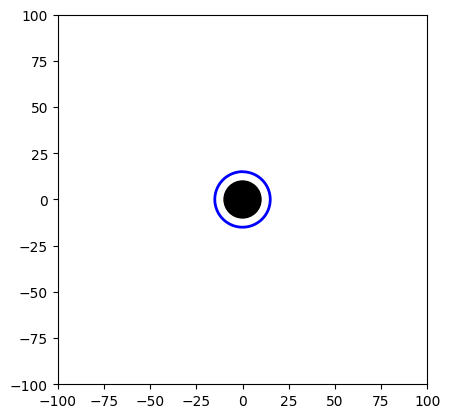

In [2]:

import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from matplotlib import pyplot as plt
from matplotlib import cm
import time
import os

plt.close('all')

def create_circle(radius=10, fill=True, color='black'):
    circle = plt.Circle((0,0), radius=radius, color=color, fill=fill)
    return circle

def show_shape(patch):
    ax=plt.gca()
    ax.add_patch(patch)
    plt.axis('scaled')
    #plt.show()

def refindex(x,y):

    A = 10
    eps = 1e-6

    rp0 = np.sqrt(x**2 + y**2);

    n = 1/(1 - A/(rp0+eps))
    fac = np.abs((1-9*(A/rp0)**2/8))   # approx correction to Eikonal
    nx = -fac*n**2*A*x/(rp0+eps)**3
    ny = -fac*n**2*A*y/(rp0+eps)**3

    return [n,nx,ny]

def flow_deriv(x_y_z,tspan):
    x, y, z, w = x_y_z

    [n,nx,ny] = refindex(x,y)

    yp = np.zeros(shape=(4,))
    yp[0] = z/n
    yp[1] = w/n
    yp[2] = nx
    yp[3] = ny

    return yp

for loop in range(-5,30,5):

    xstart = -100
    ystart = -2.245 + 4*(loop-1)
    print(ystart)

    [n,nx,ny] = refindex(xstart,ystart)


    y0 = [xstart, ystart, n, 0]

    tspan = np.linspace(1,400,2000)

    y = integrate.odeint(flow_deriv, y0, tspan)

    xx = y[1:2000,0]
    yy = y[1:2000,1]




    plt.figure(1)
    lines = plt.plot(xx,yy)
    plt.setp(lines, linewidth=1)
    plt.title('Photon Orbits')

    #axes = plt.gca()
    #axes.set_xlim([-100,100])
    #axes.set_ylim([-100,100])
    #plt.show()


bh = create_circle()
show_shape(bh)
ibco = create_circle(radius=15, color='red', fill=False)
show_shape(ibco)
axes = plt.gca()
axes.set_xlim([-100,100])
axes.set_ylim([-100,100])
plt.show()

# Now set up a circular photon orbit
xstart = 0
ystart = 15

[n,nx,ny] = refindex(xstart,ystart)

y0 = [xstart, ystart, n, 0]

tspan = np.linspace(1,94,1000)

y = integrate.odeint(flow_deriv, y0, tspan)

xx = y[1:1000,0]
yy = y[1:1000,1]

plt.figure(1)
lines = plt.plot(xx,yy)
plt.setp(lines, linewidth=2, color = 'blue')
bh = create_circle()
show_shape(bh)
ibco = create_circle(radius=15, color='red', fill=False)
show_shape(ibco)
axes = plt.gca()
axes.set_xlim([-100,100])
axes.set_ylim([-100,100])
plt.show()

7.419746481700975e-07 1.1129619722551463e-06


/tmp/ipython-input-570224216.py:126: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(geodesic, y0, tspan, args=(M_blackhole,))


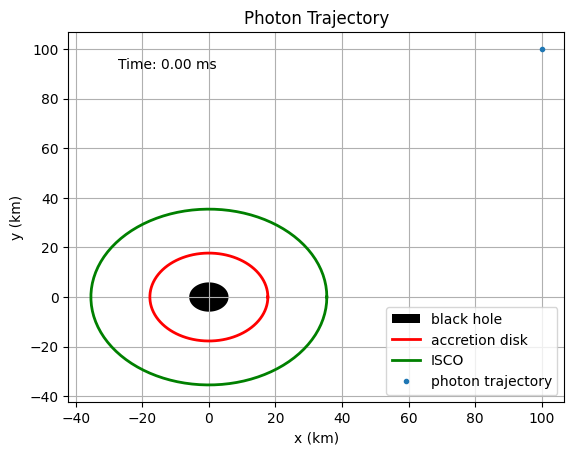

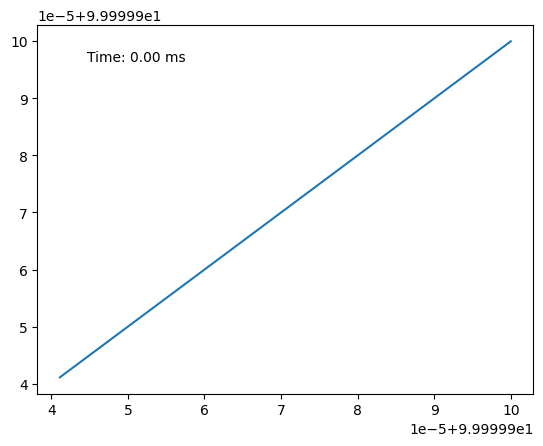

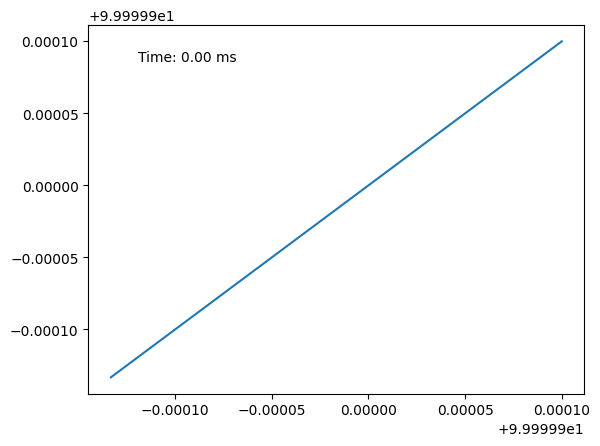

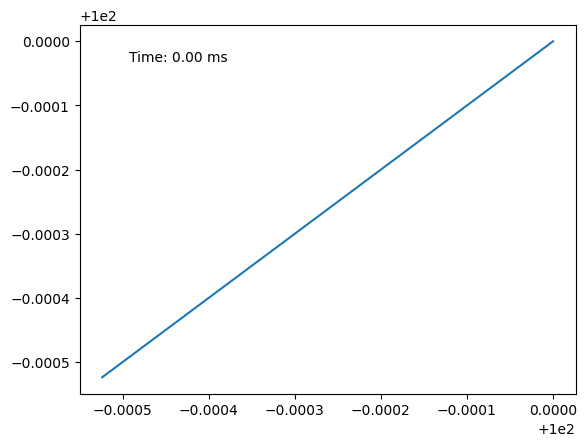

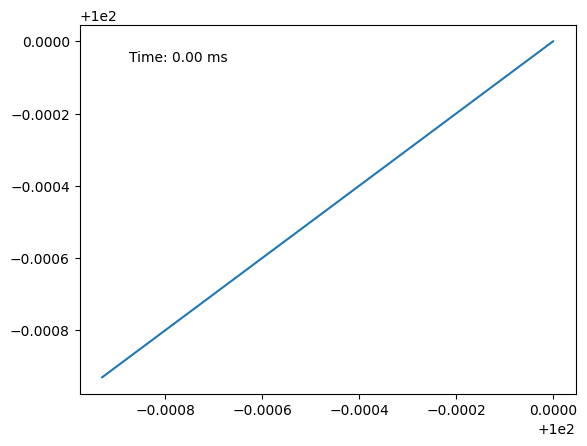

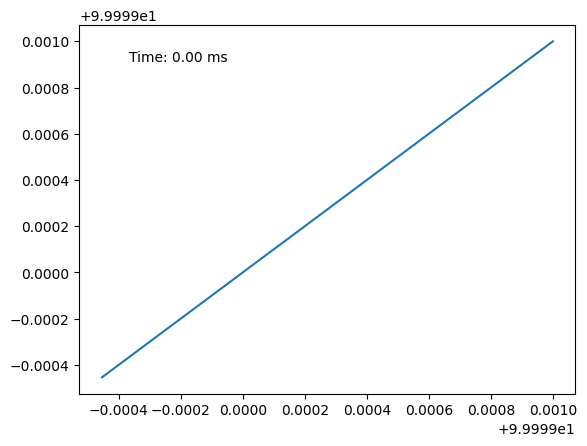

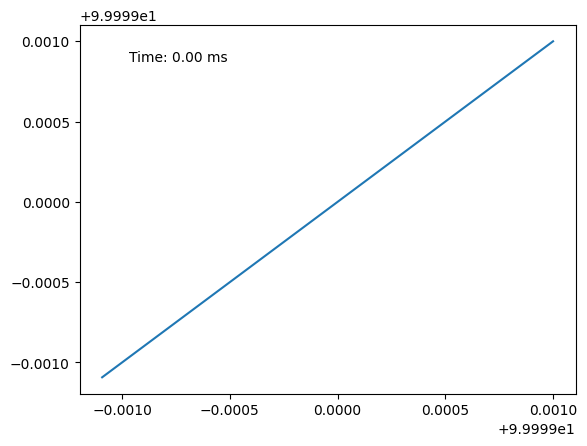

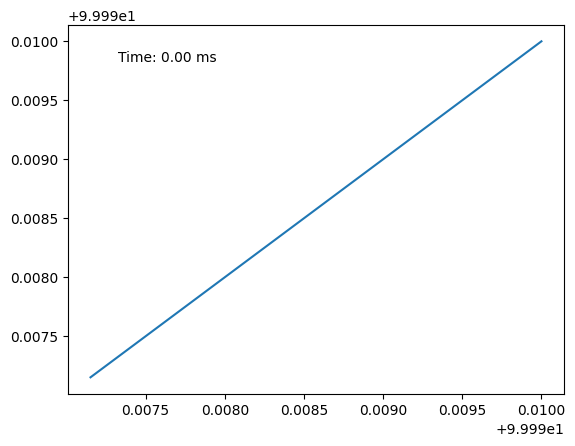

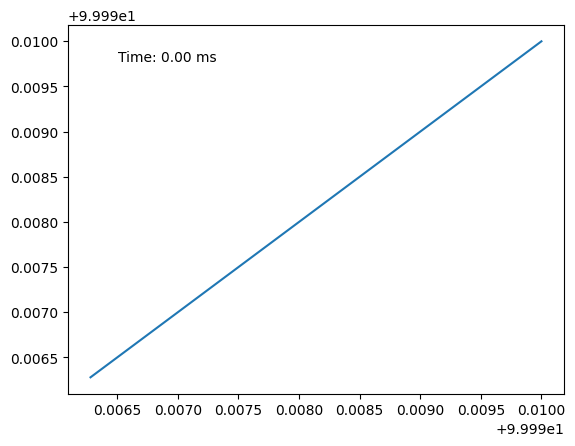

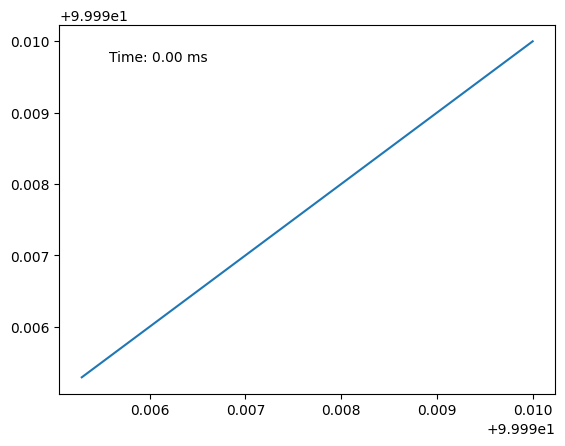

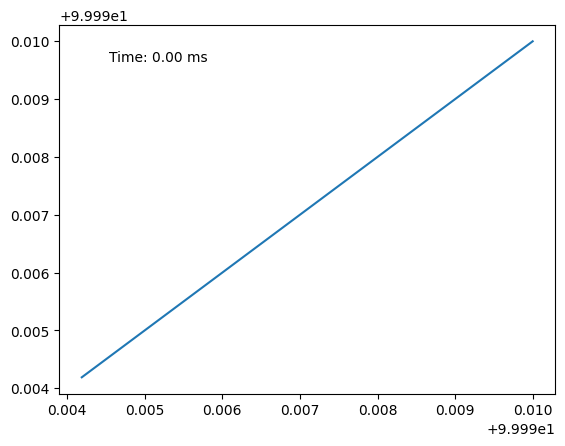

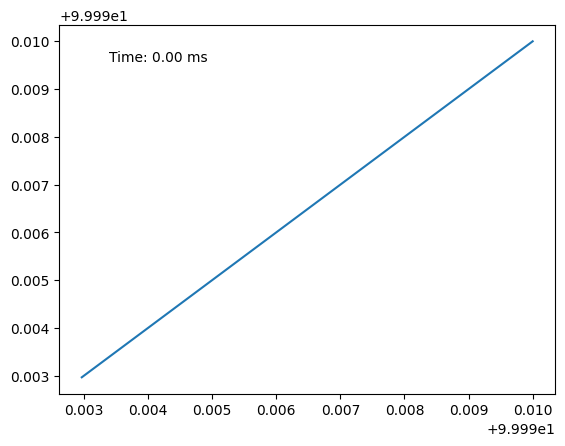

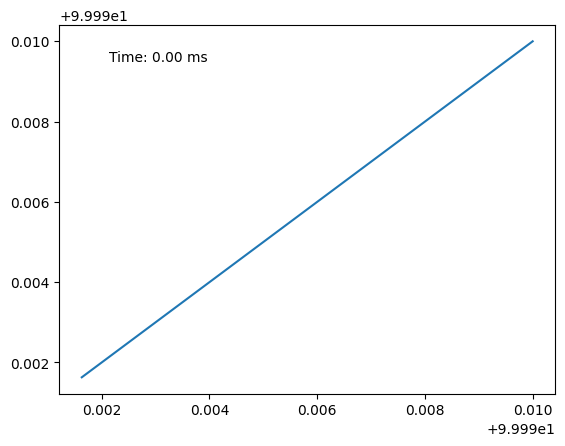

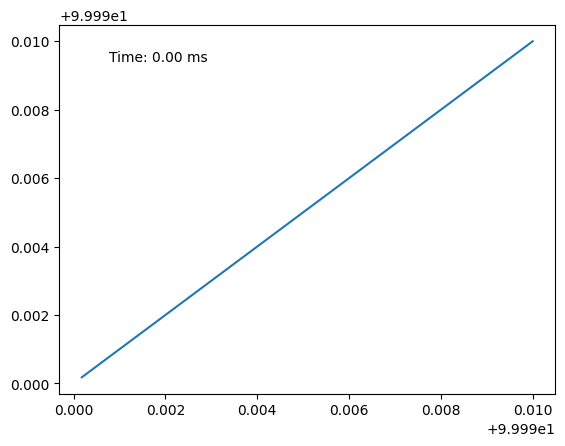

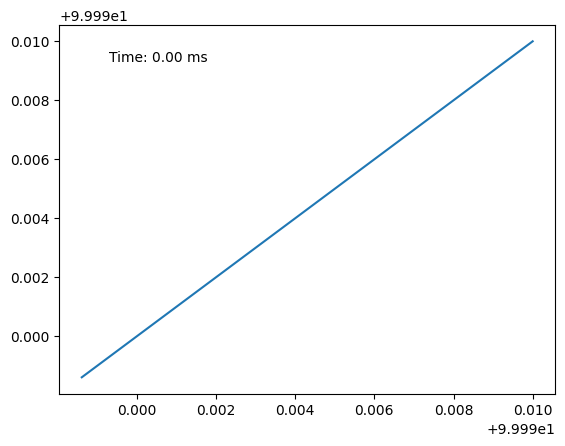

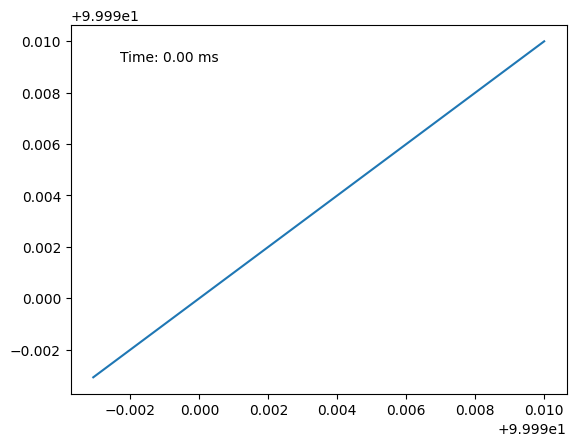

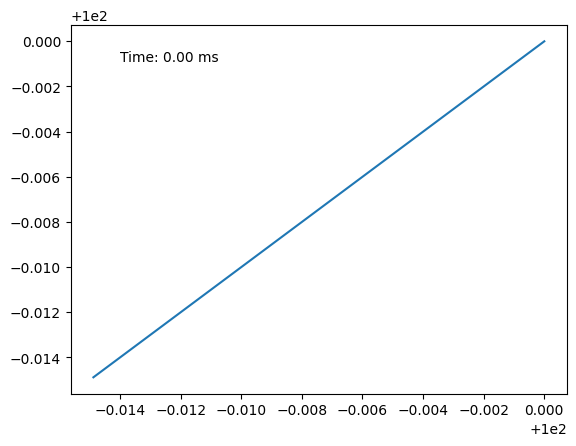

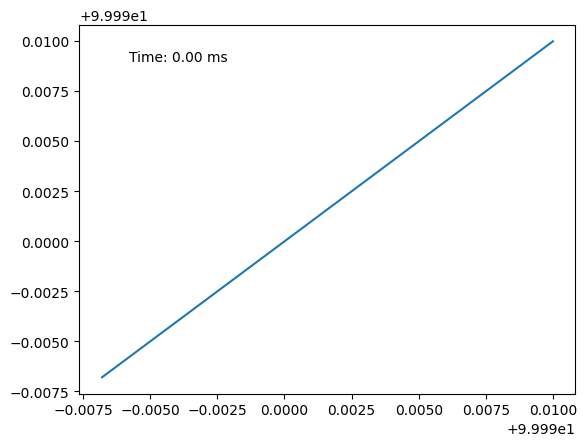

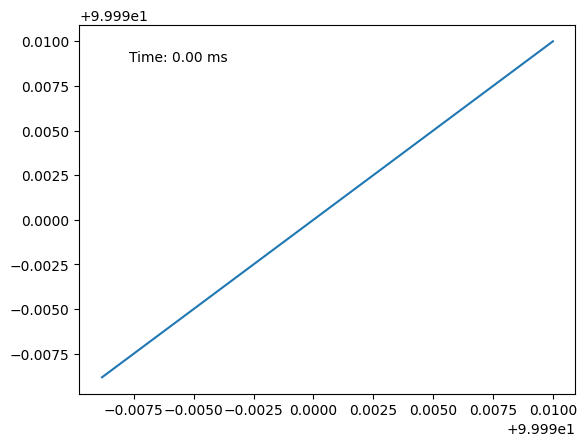

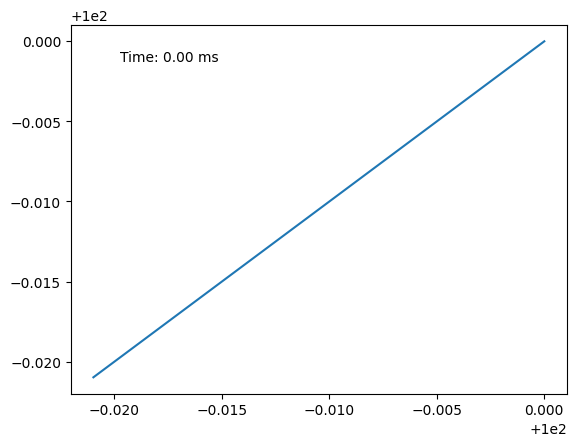

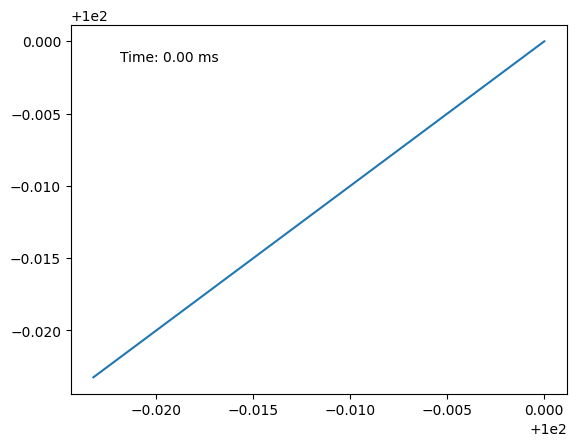

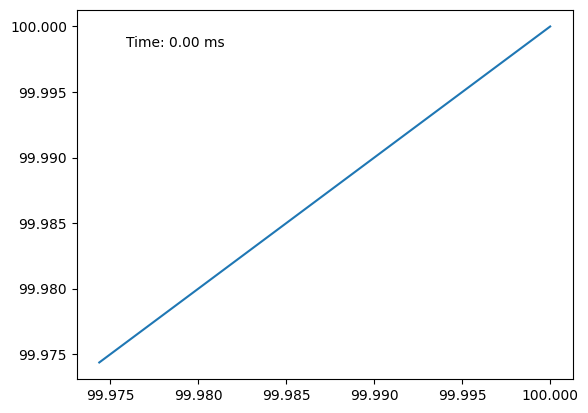

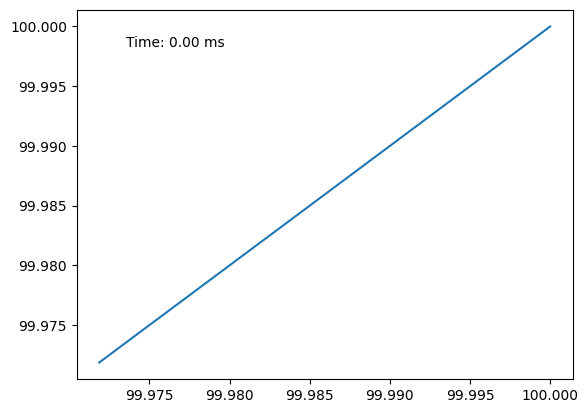

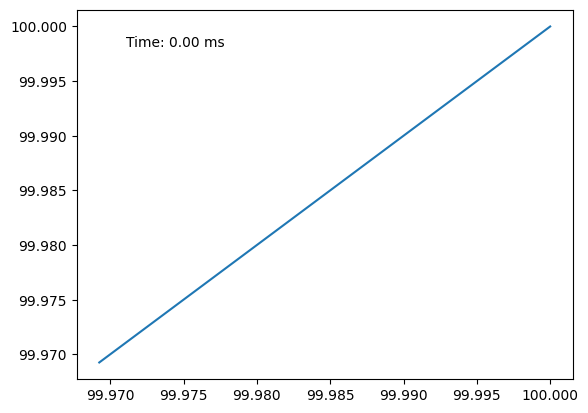

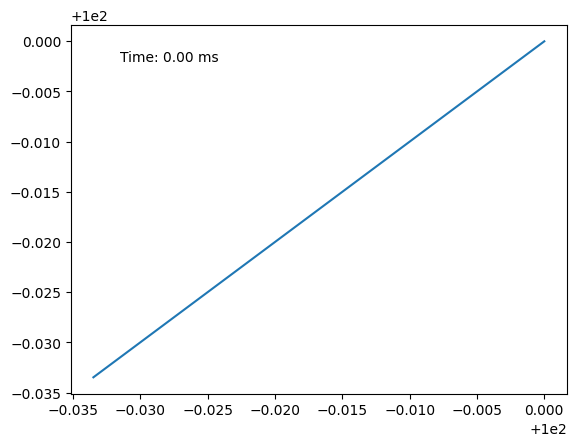

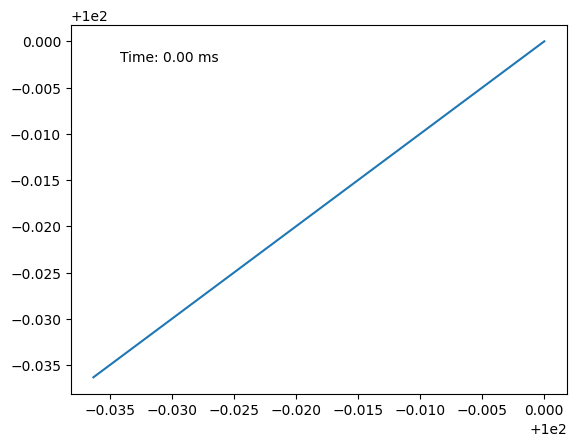

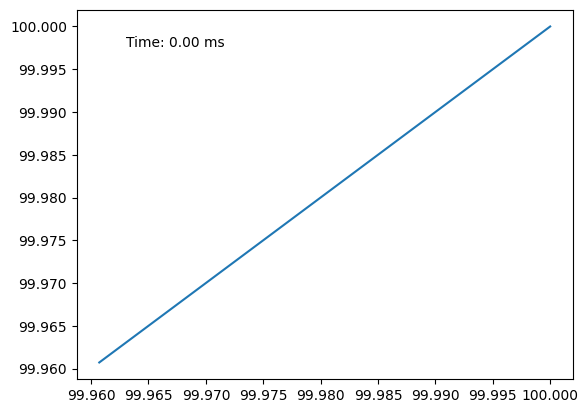

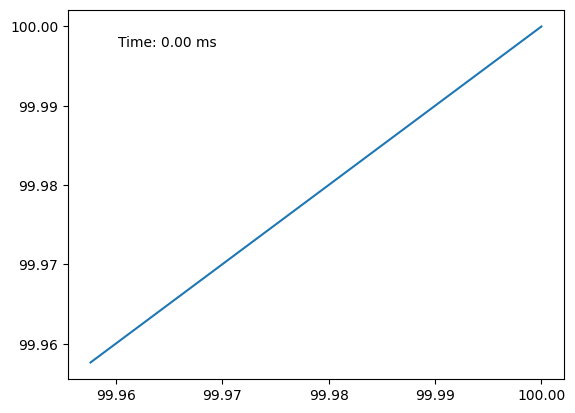

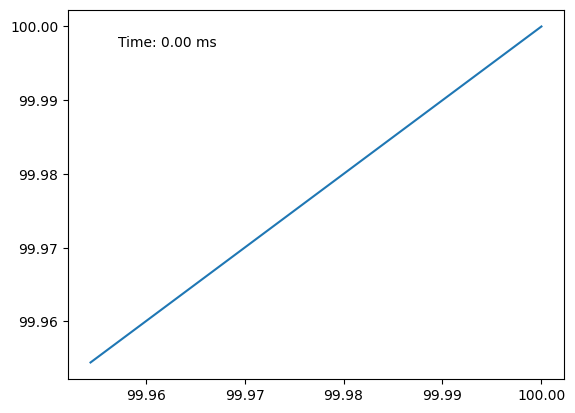

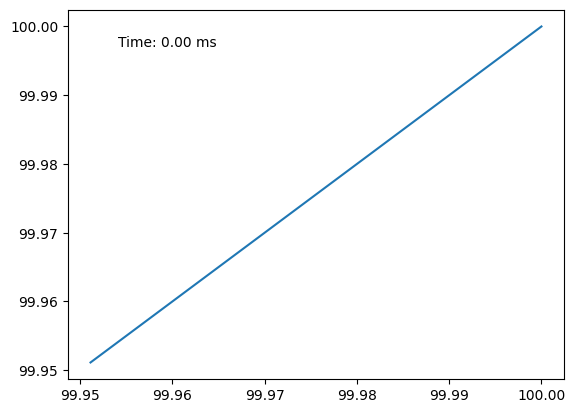

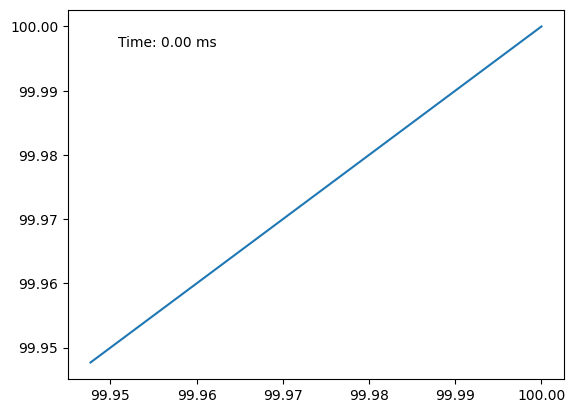

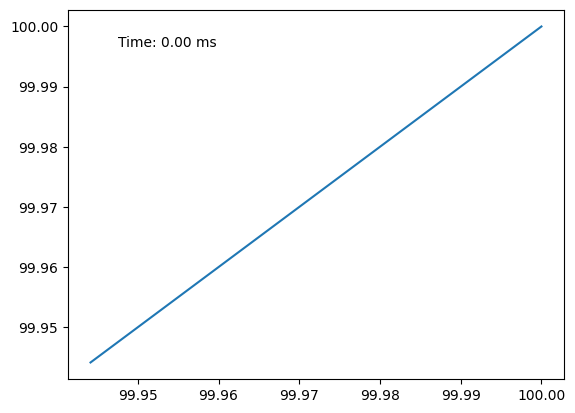

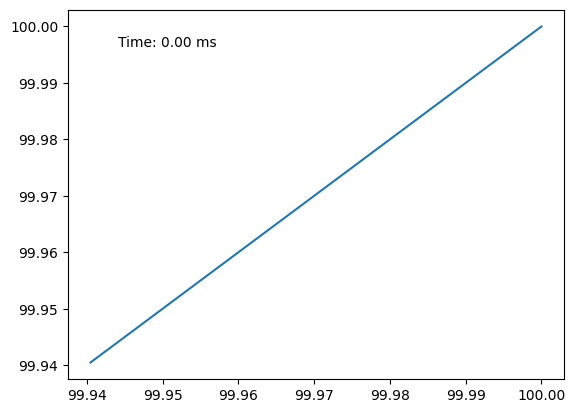

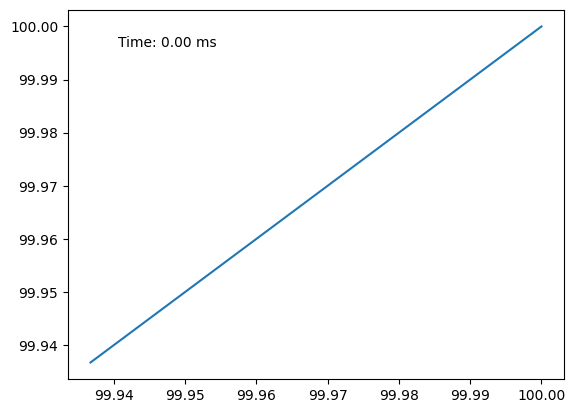

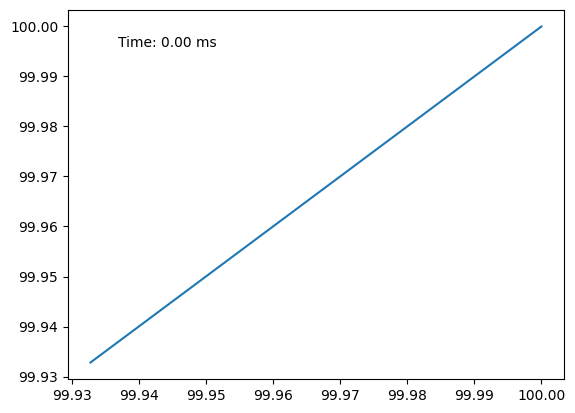

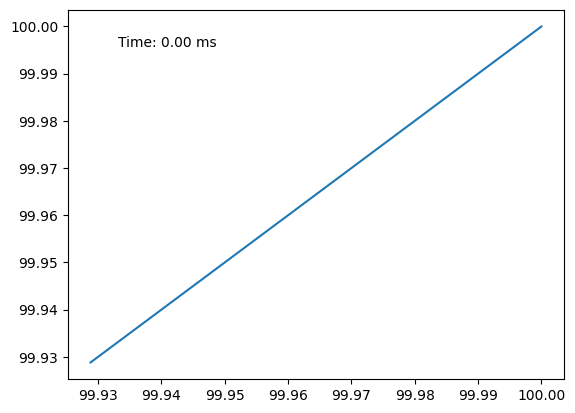

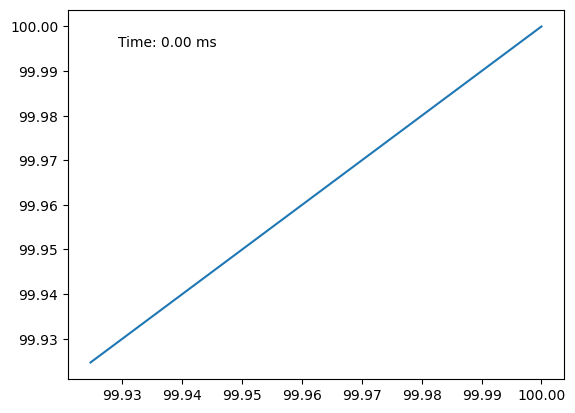

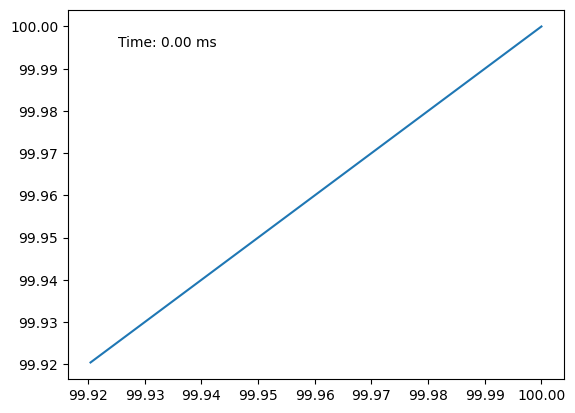

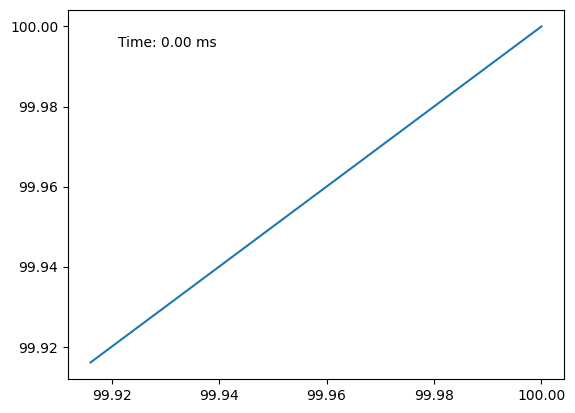

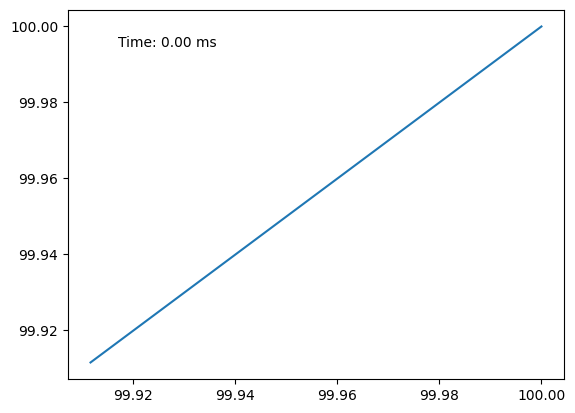

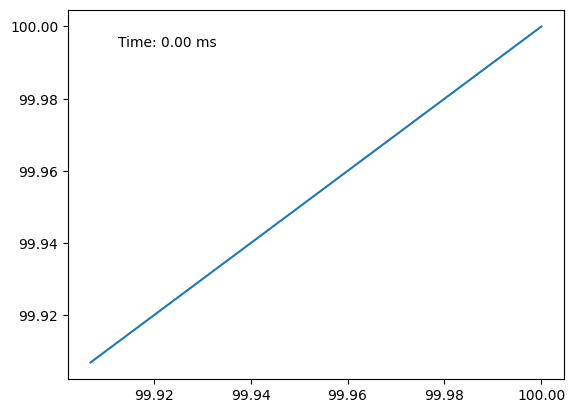

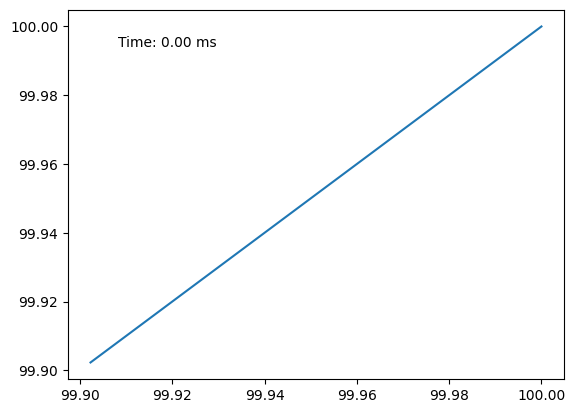

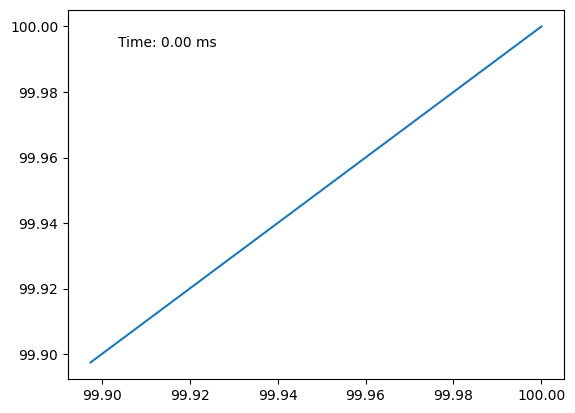

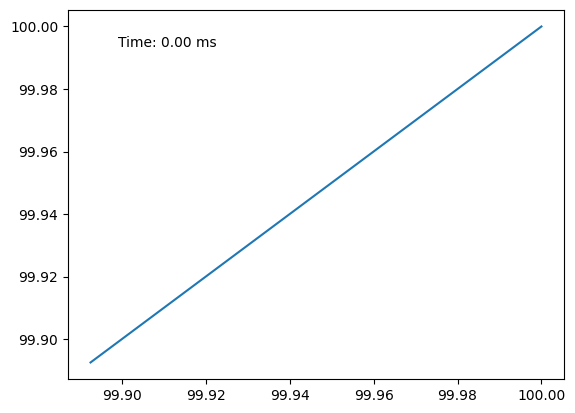

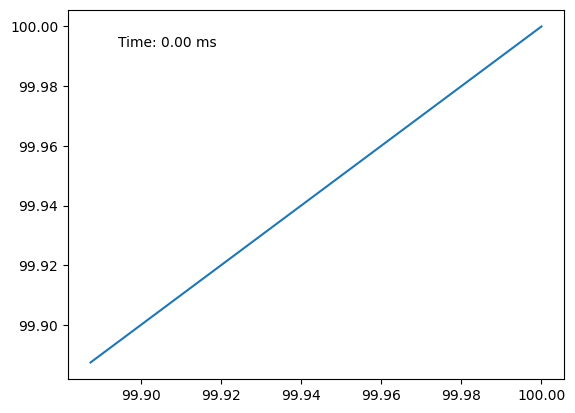

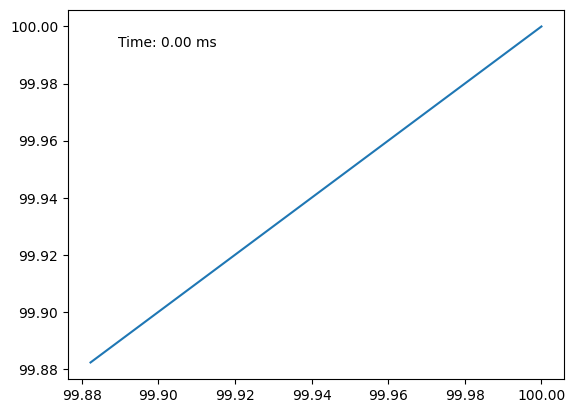

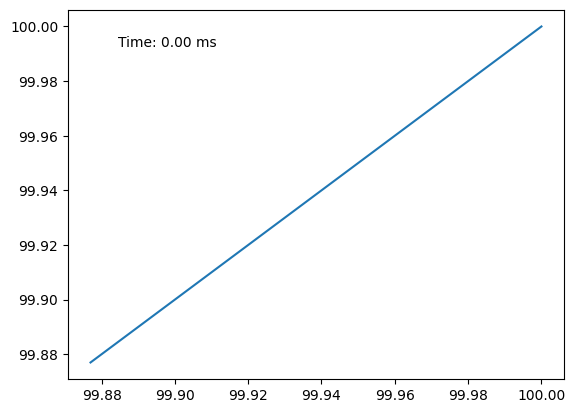

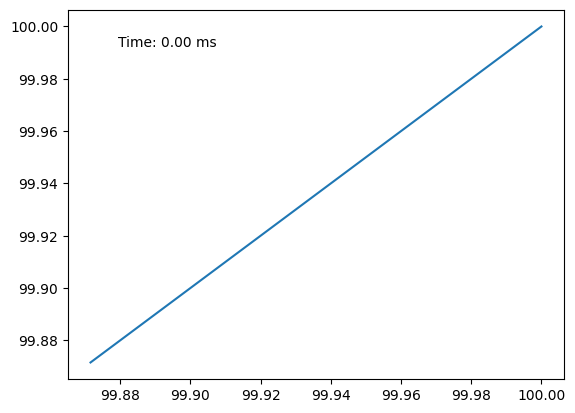

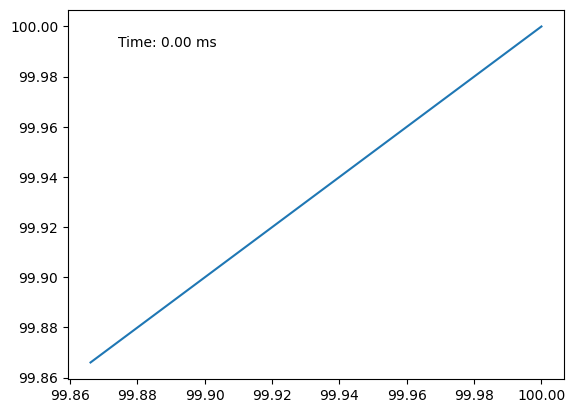

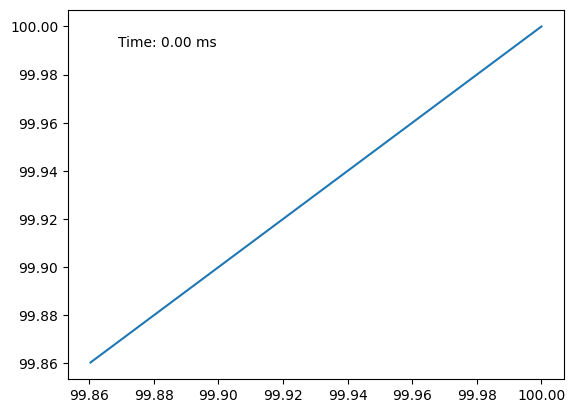

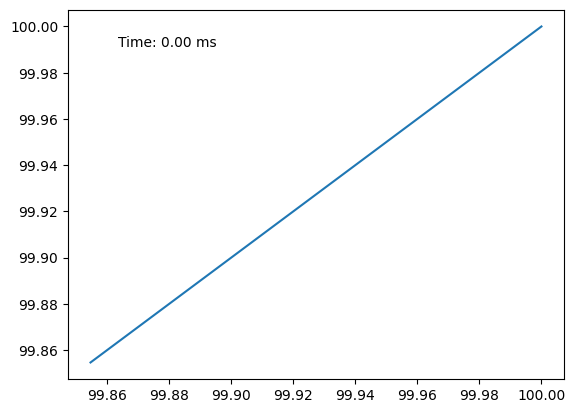

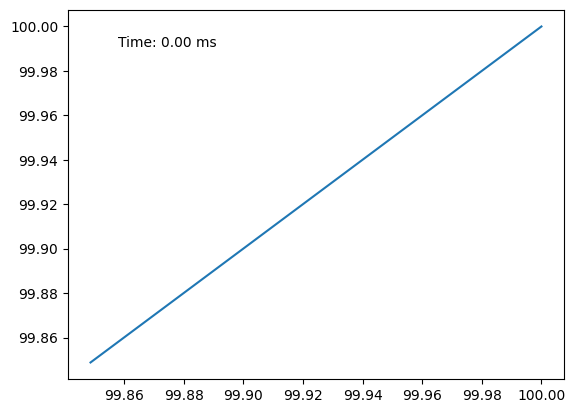

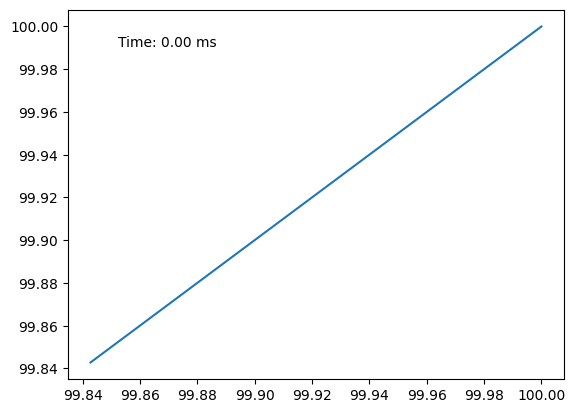

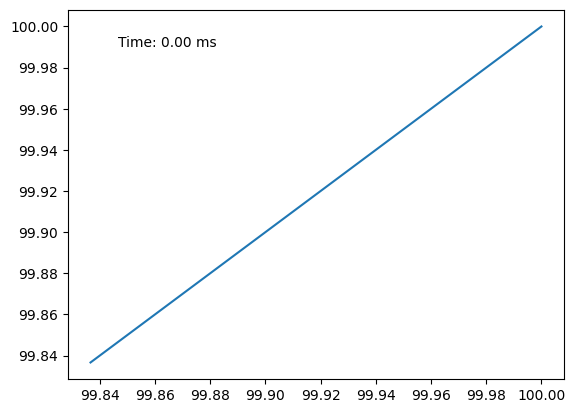

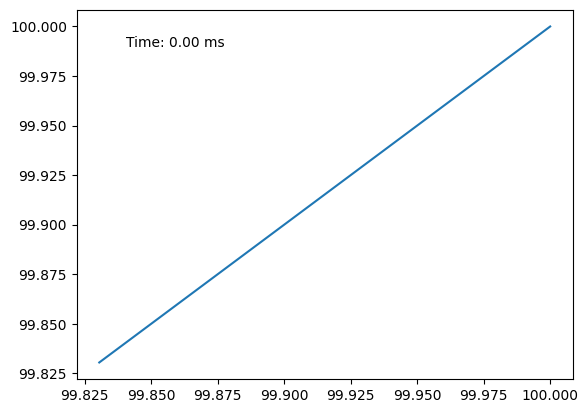

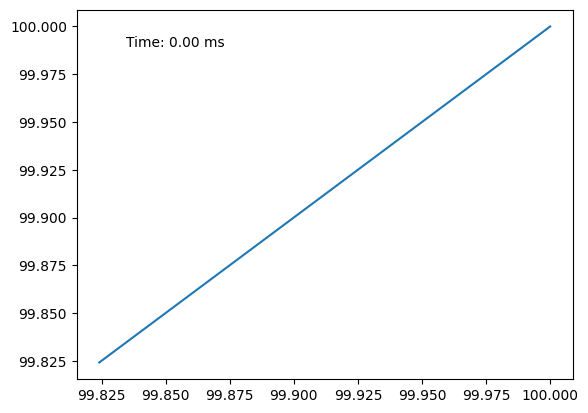

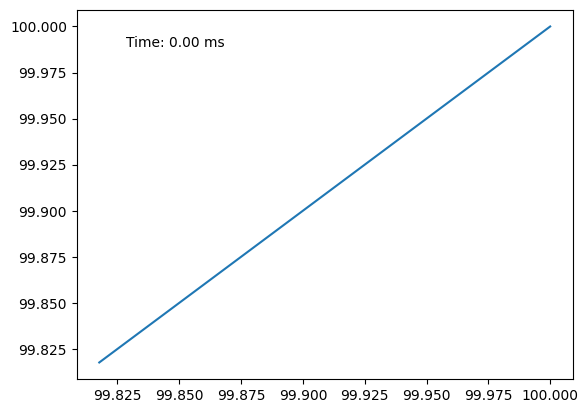

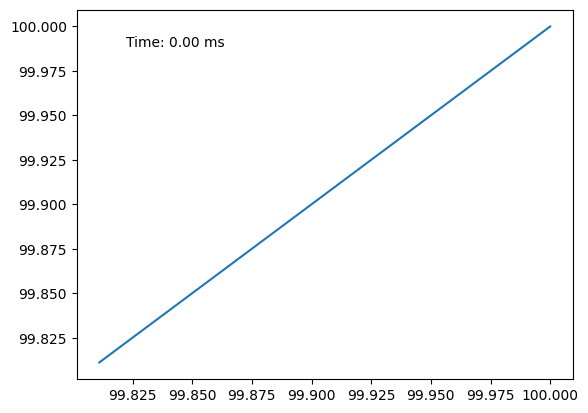

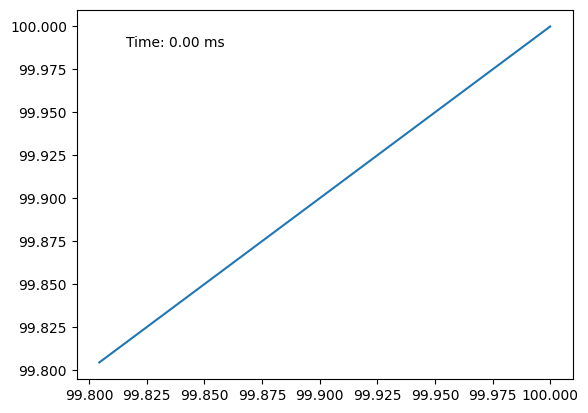

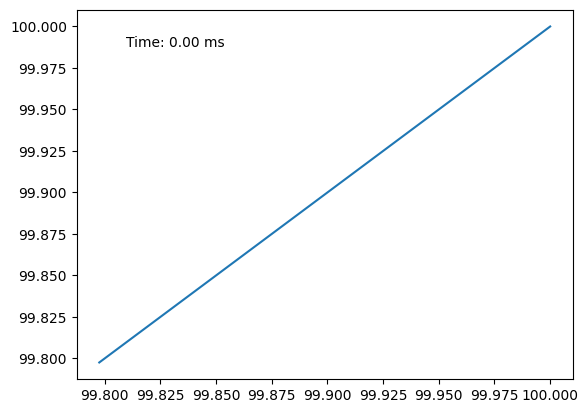

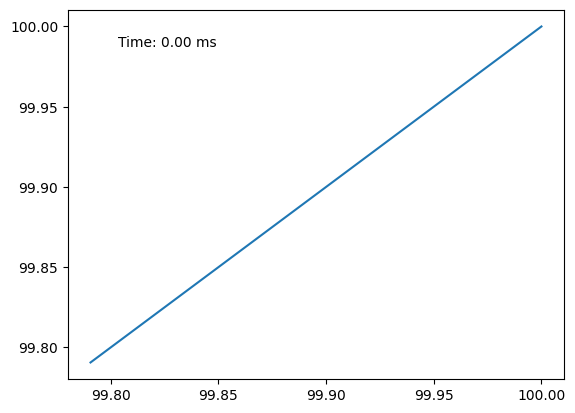

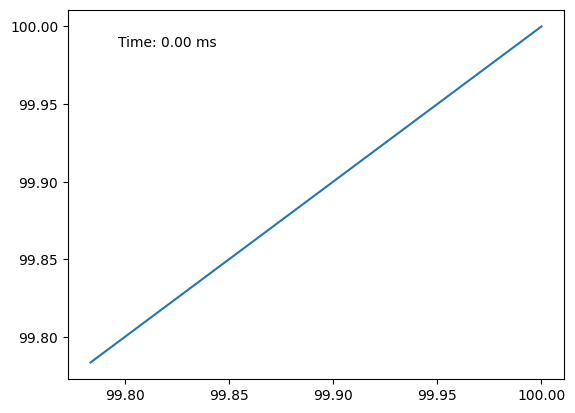

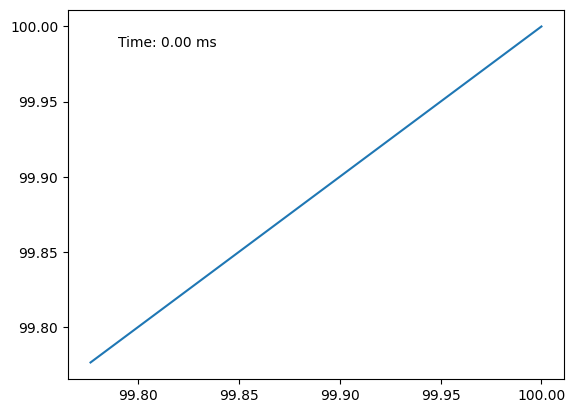

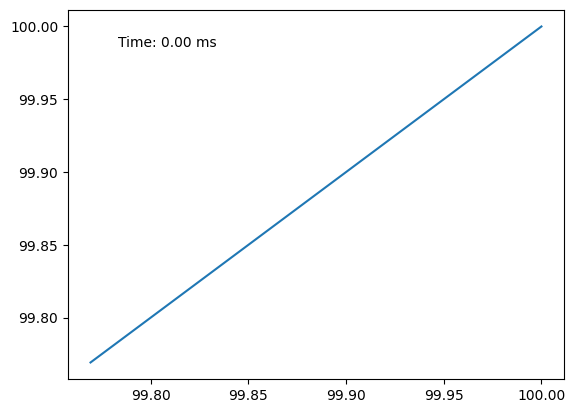

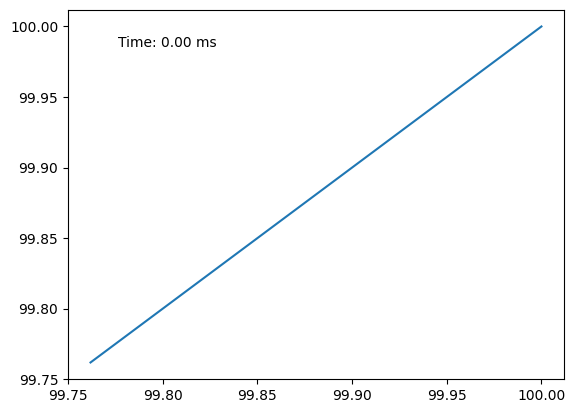

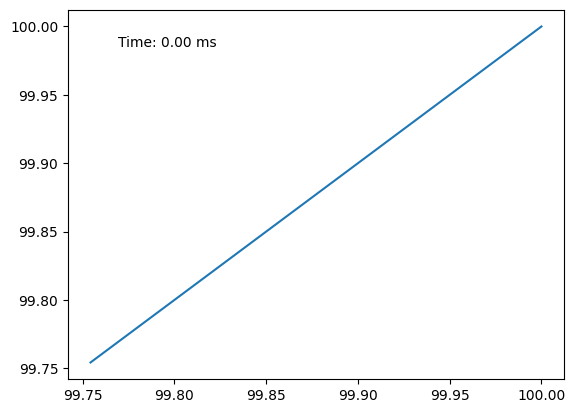

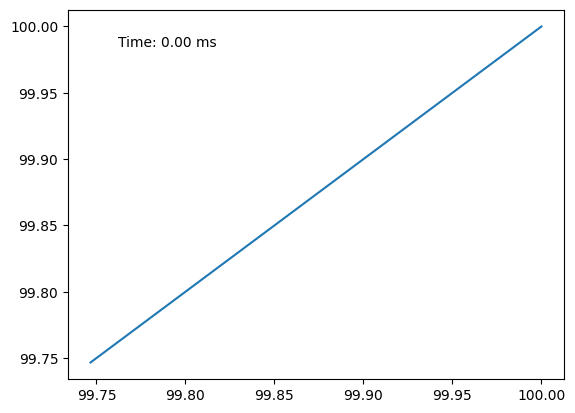

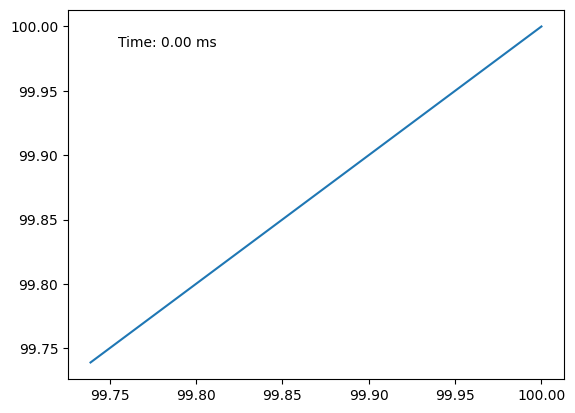

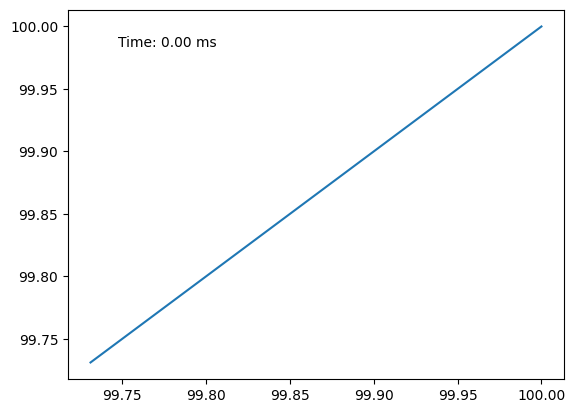

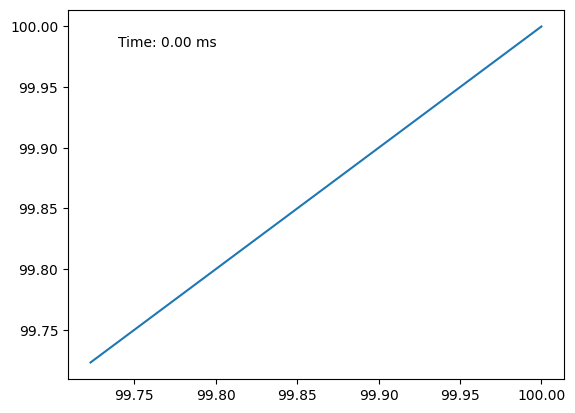

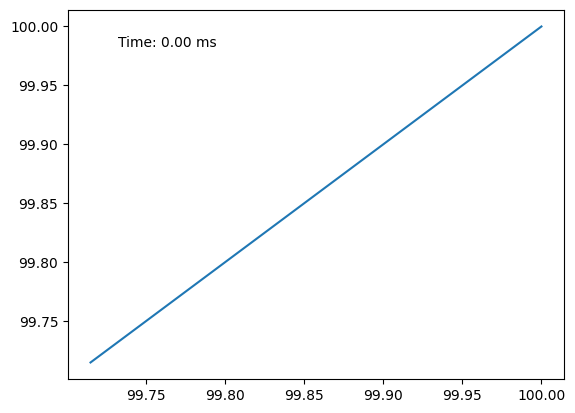

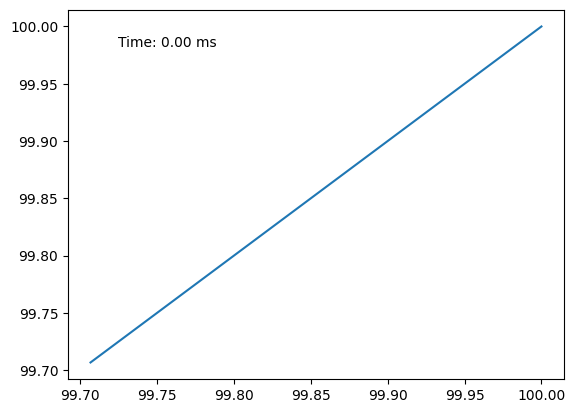

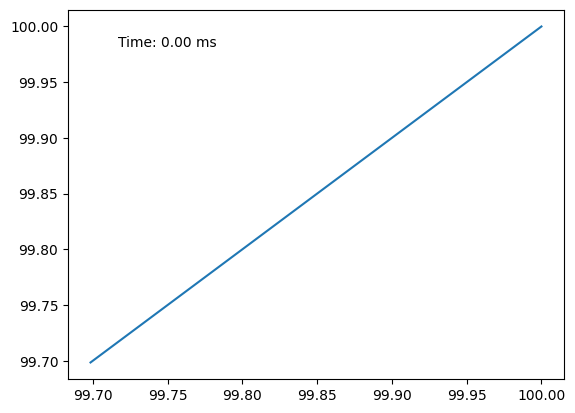

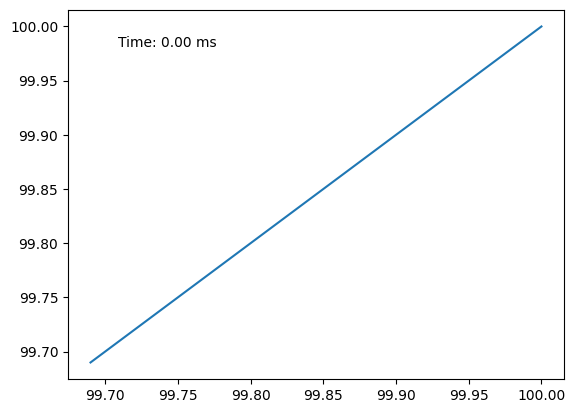

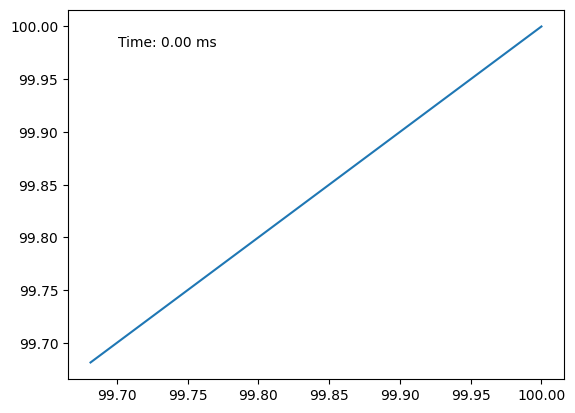

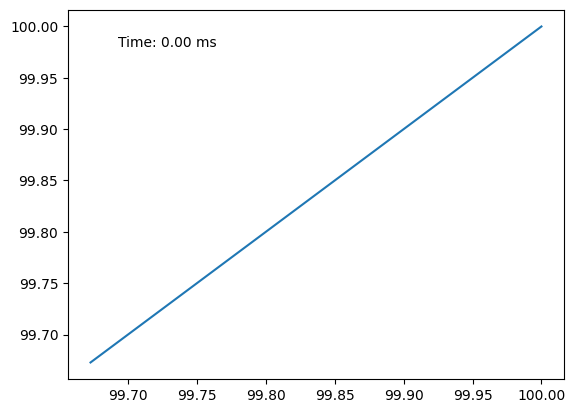

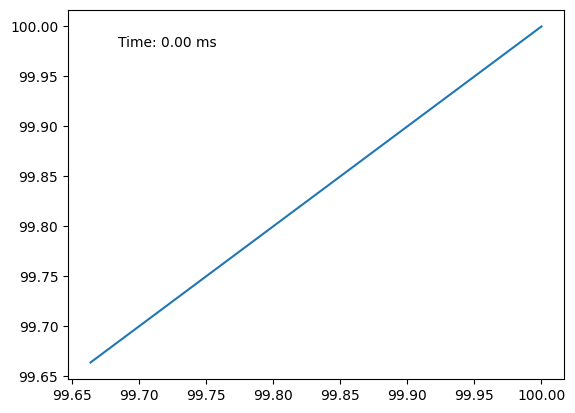

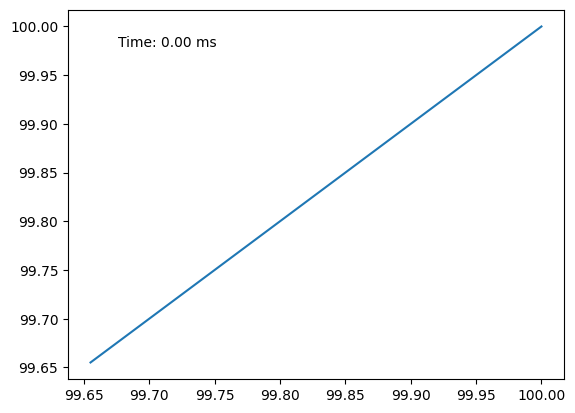

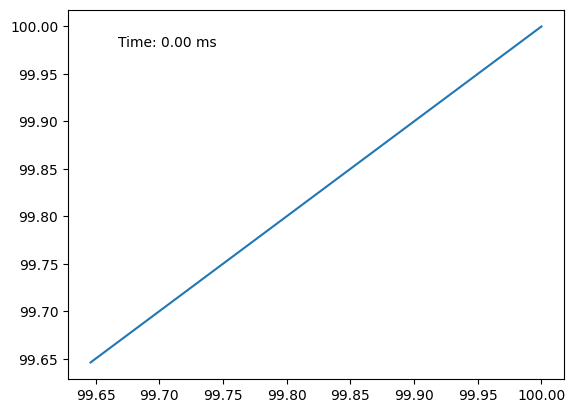

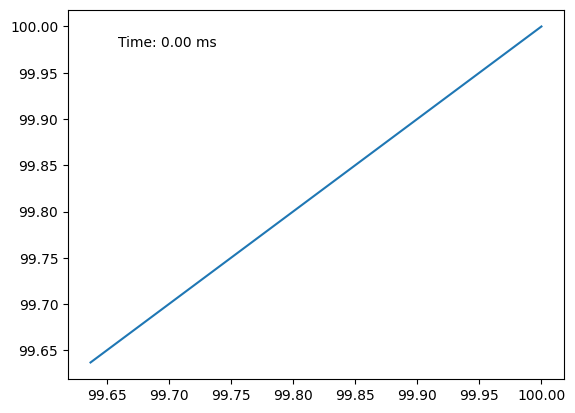

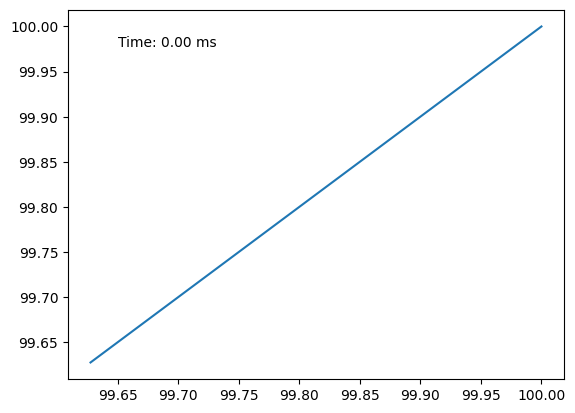

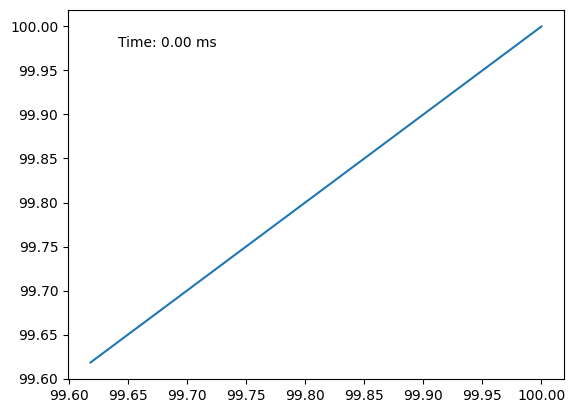

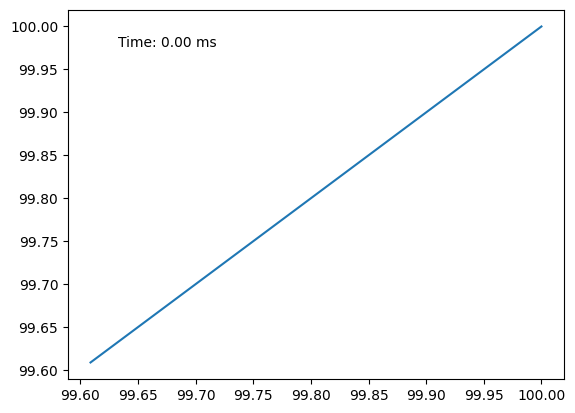

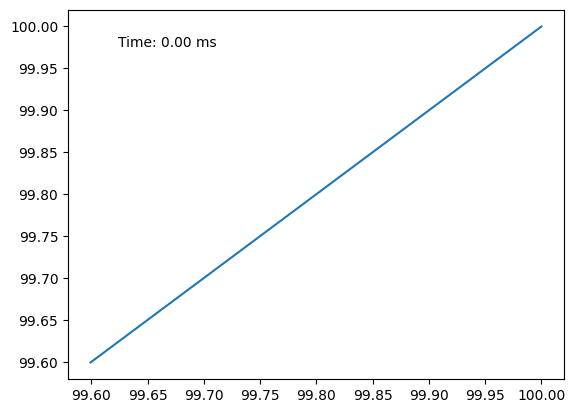

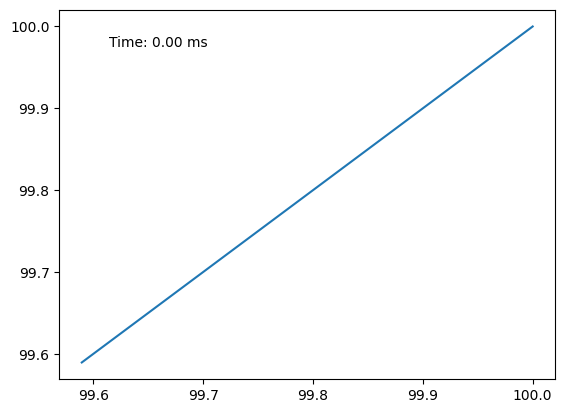

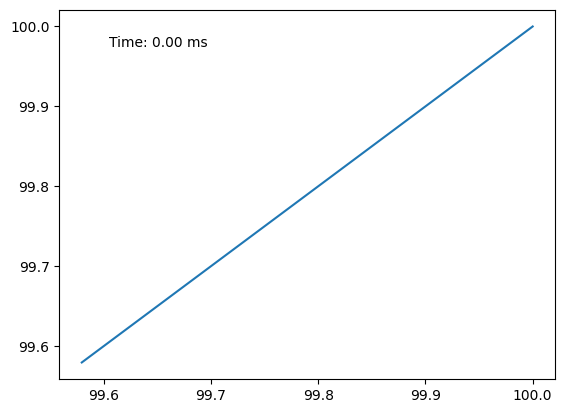

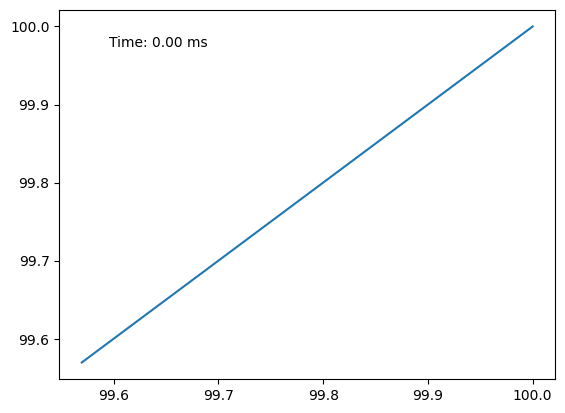

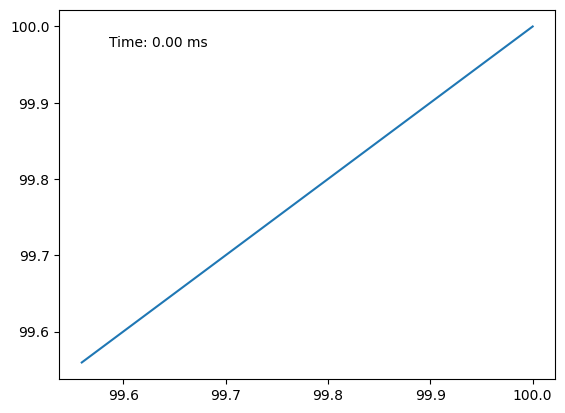

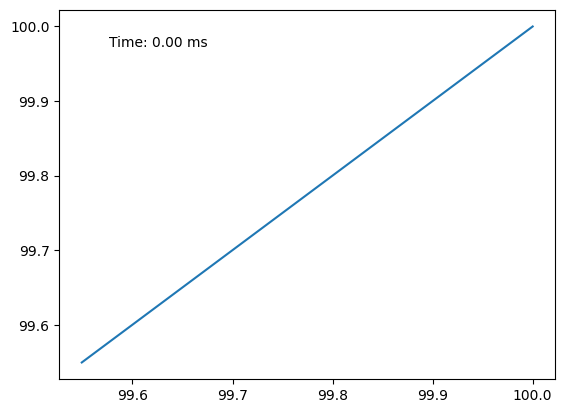

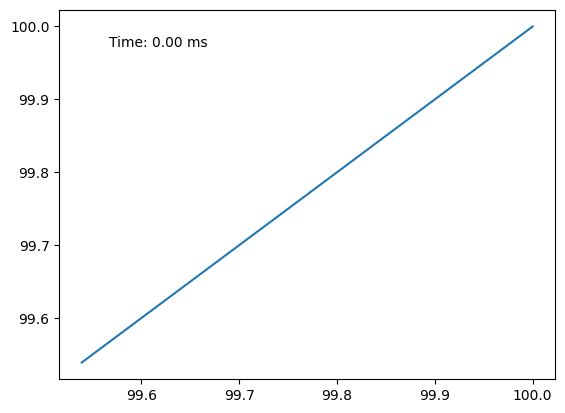

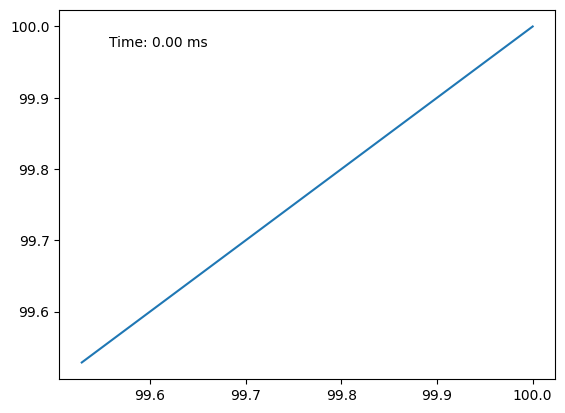

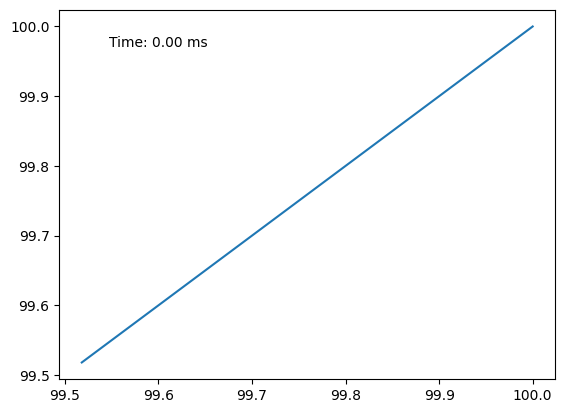

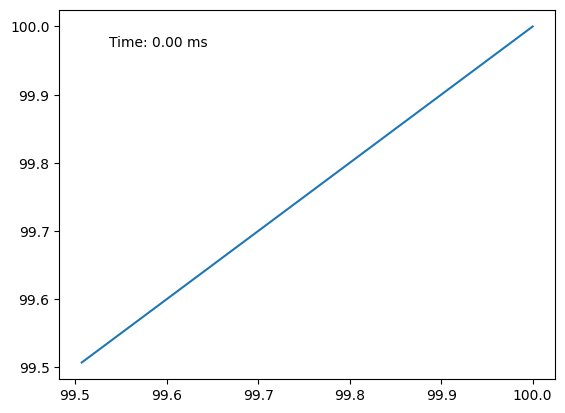

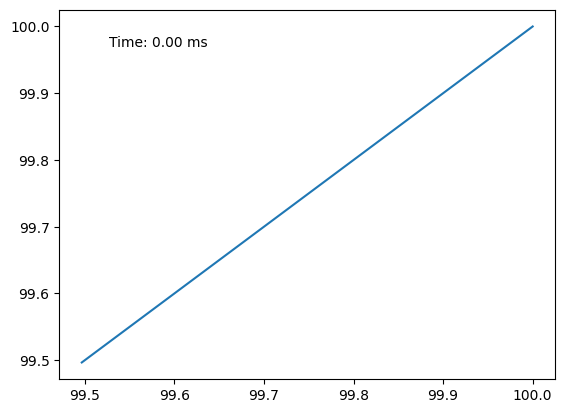

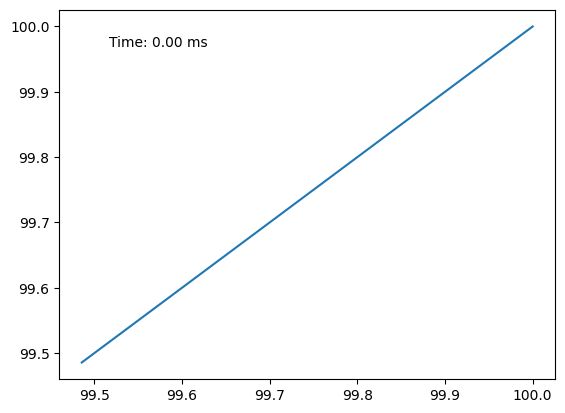

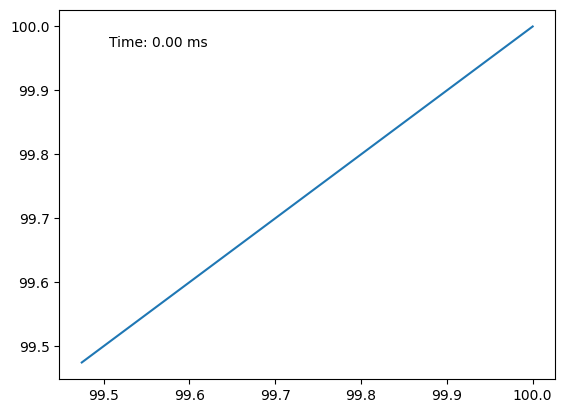

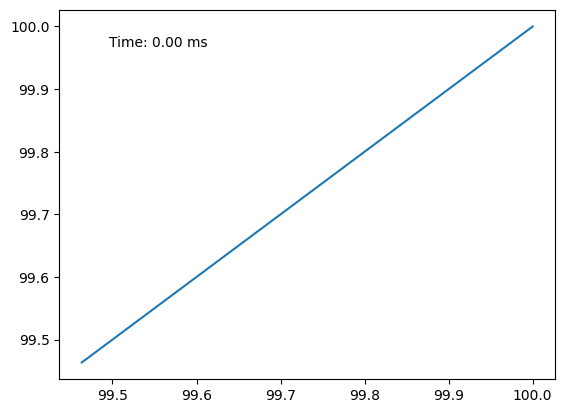

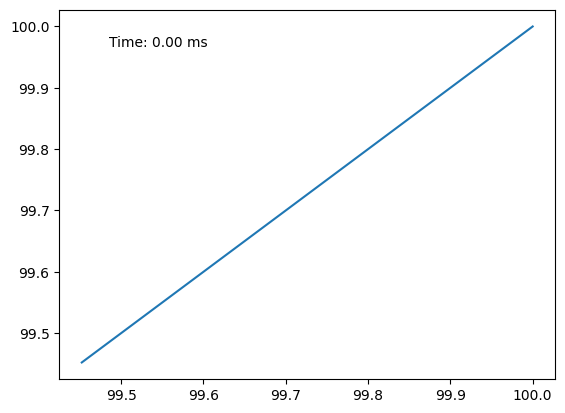

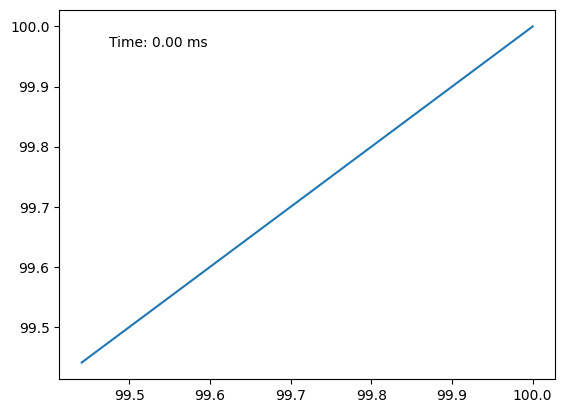

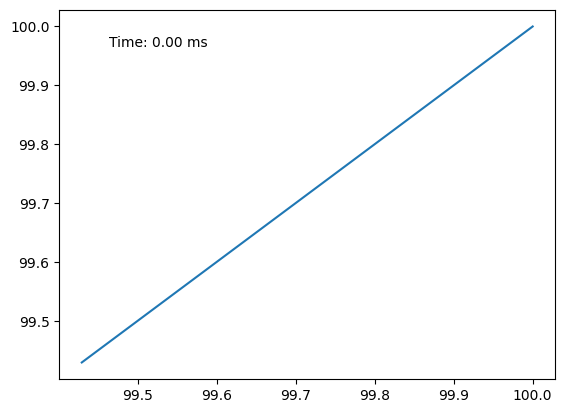

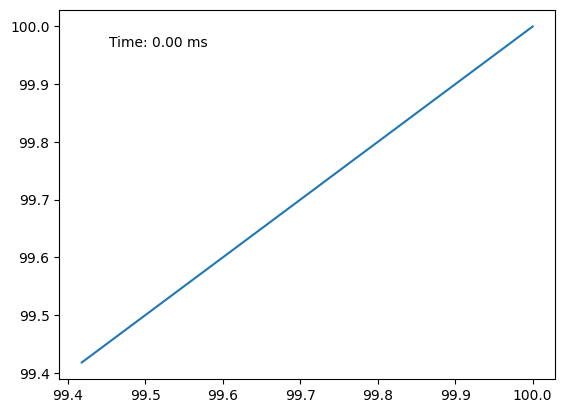

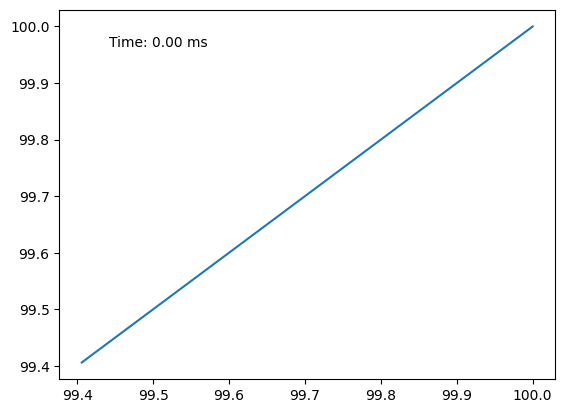

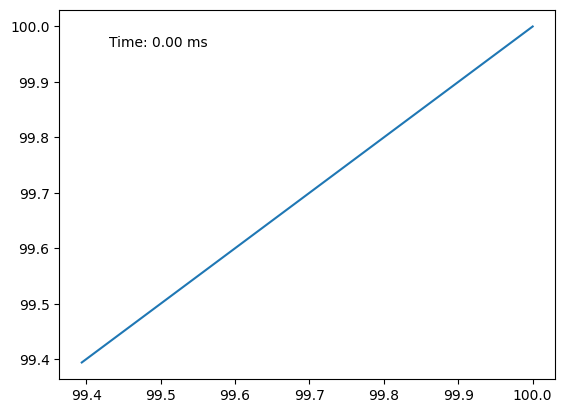

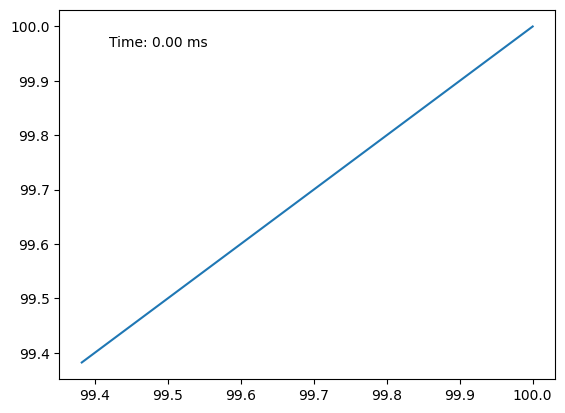

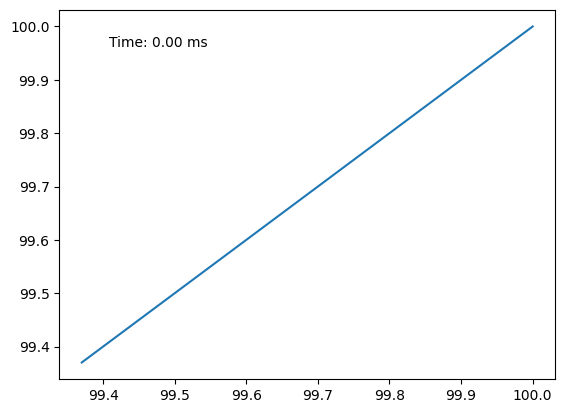

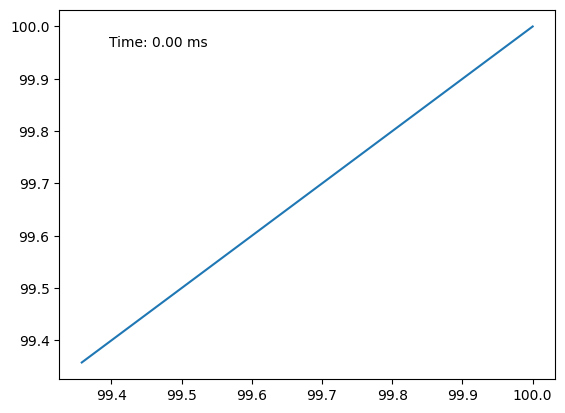

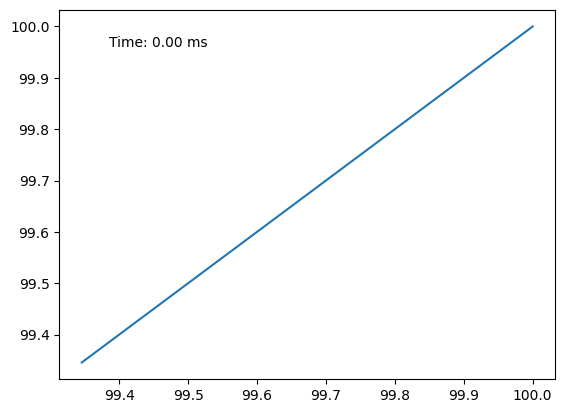

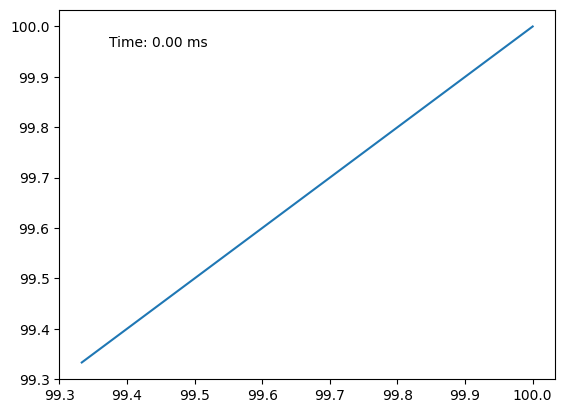

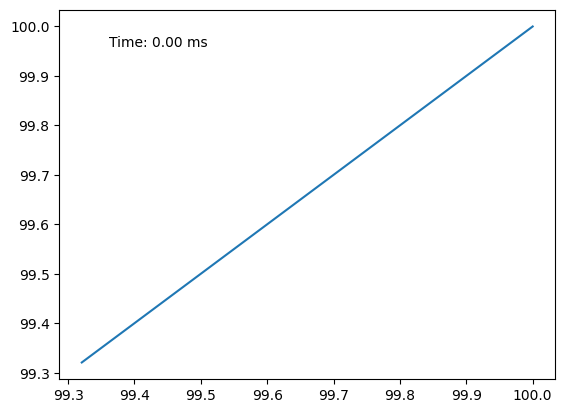

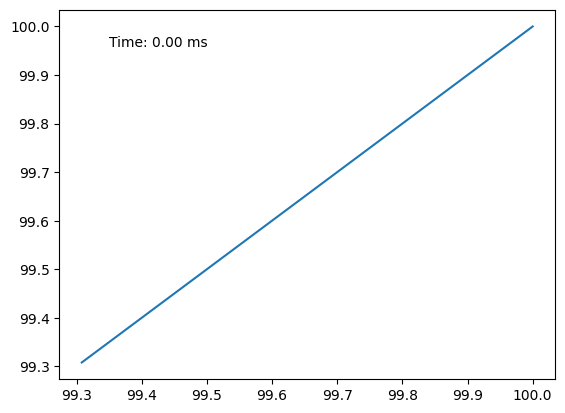

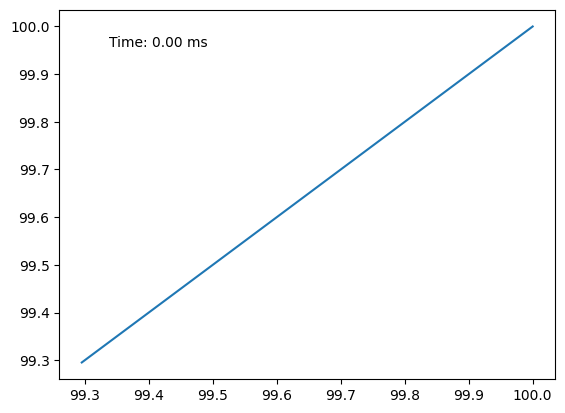

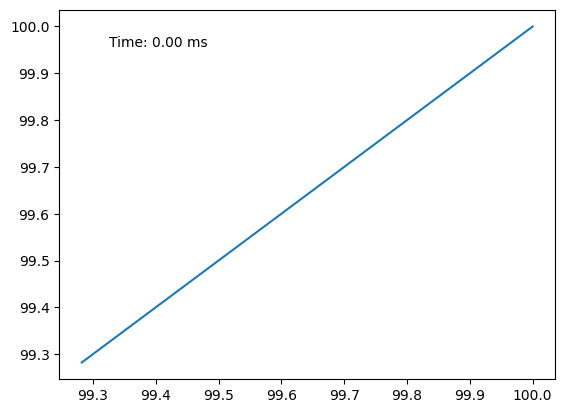

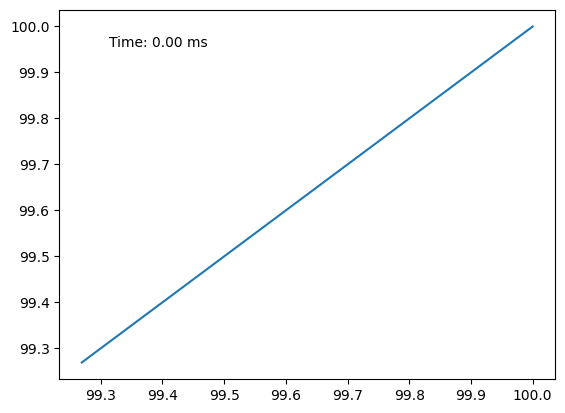

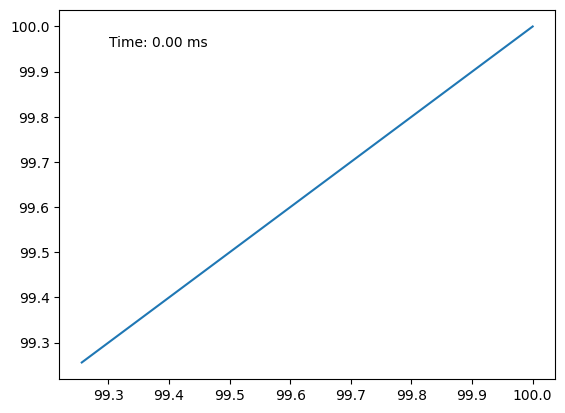

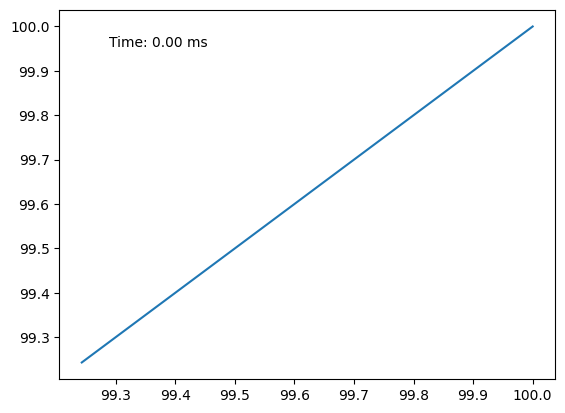

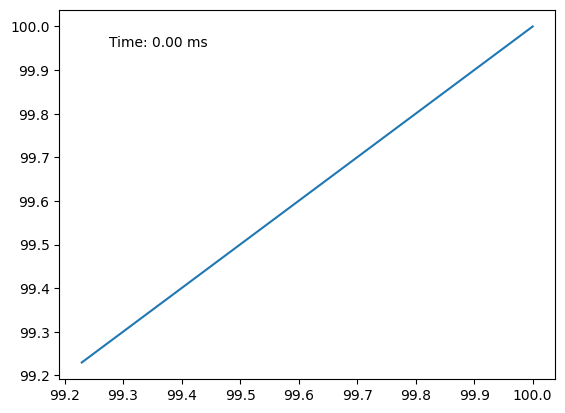

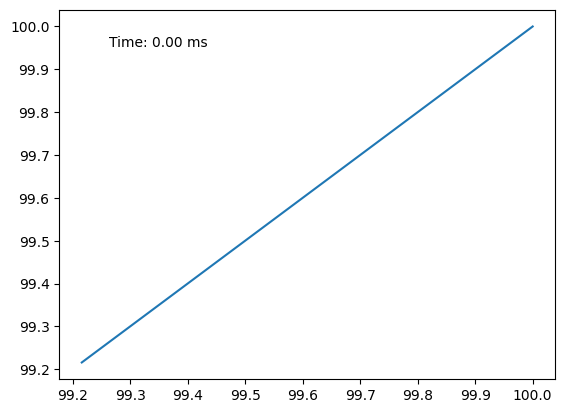

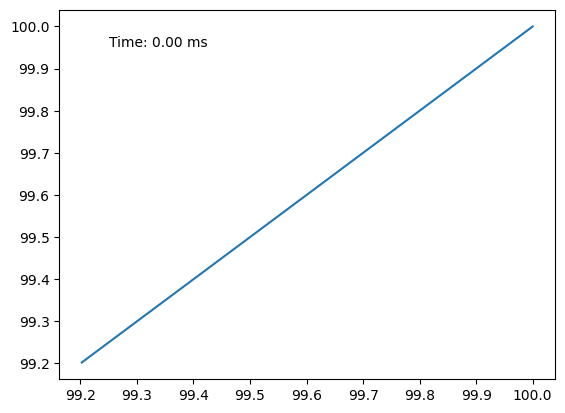

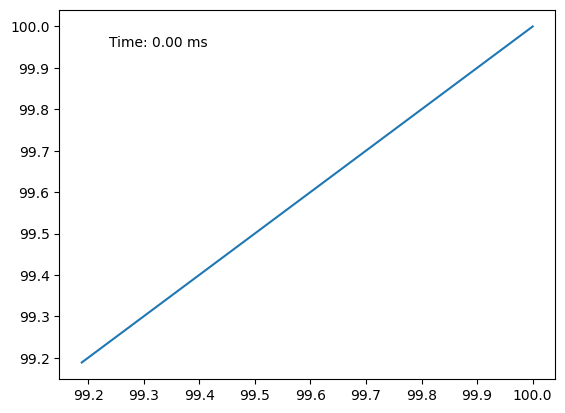

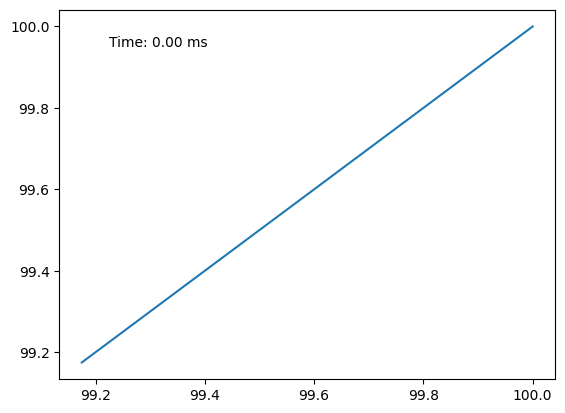

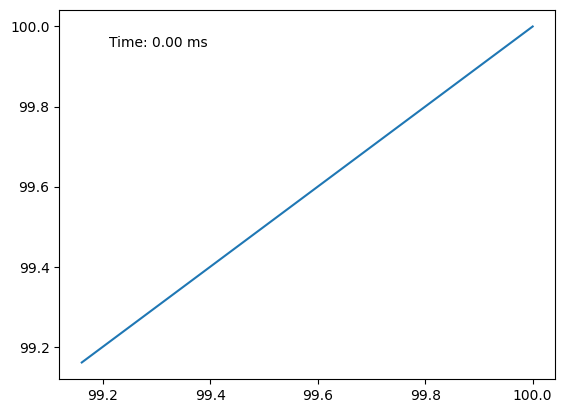

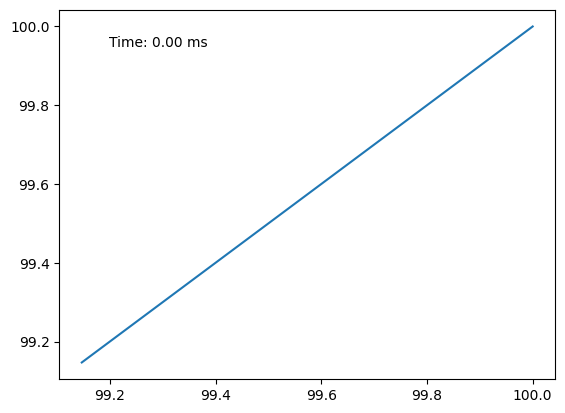

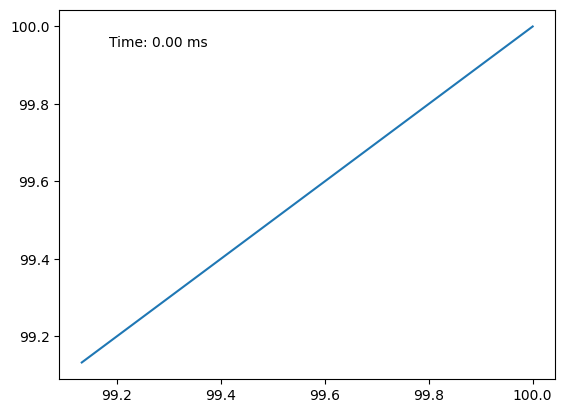

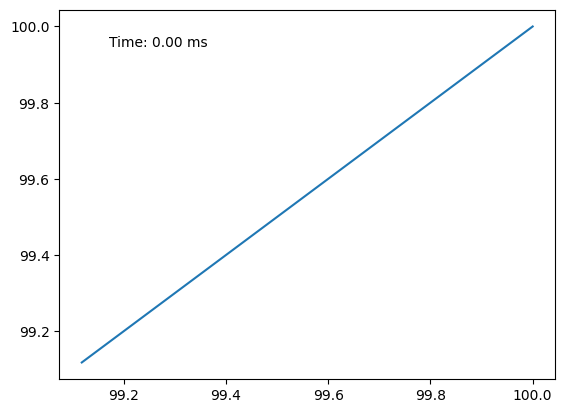

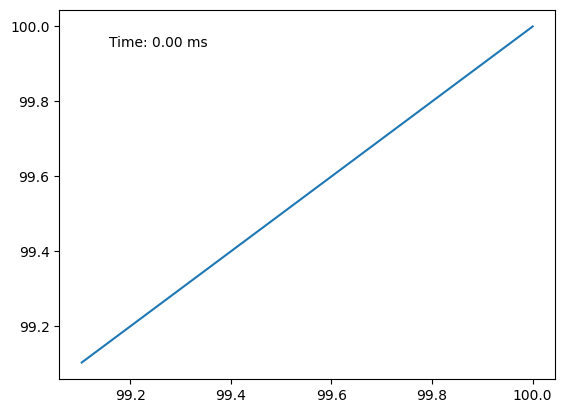

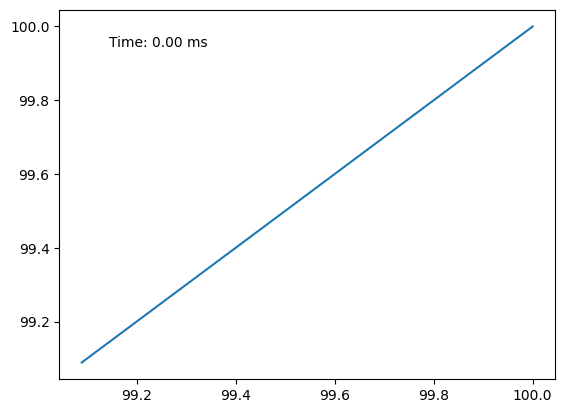

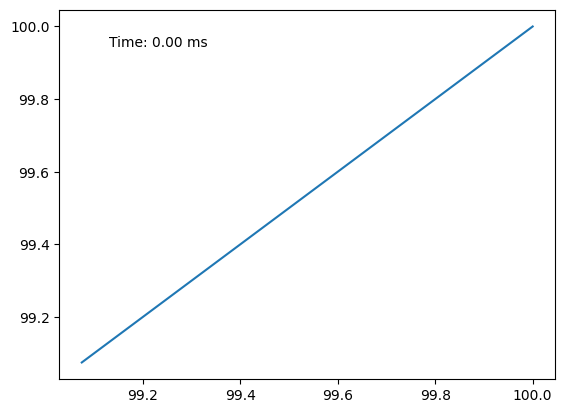

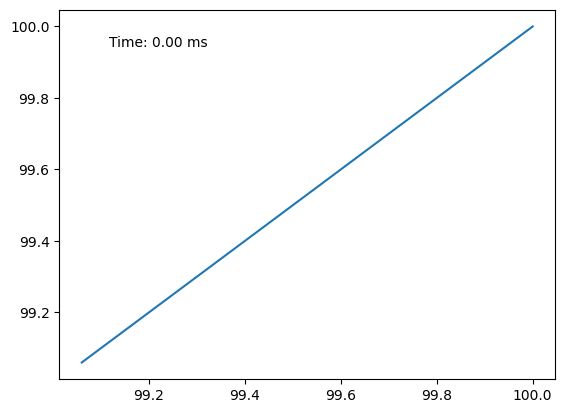

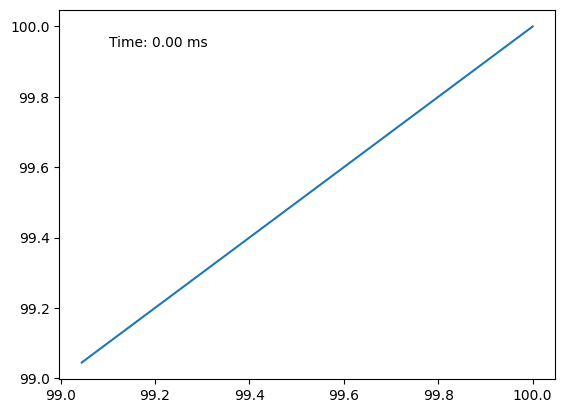

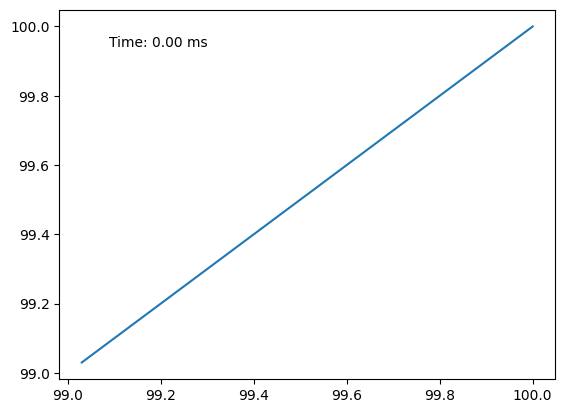

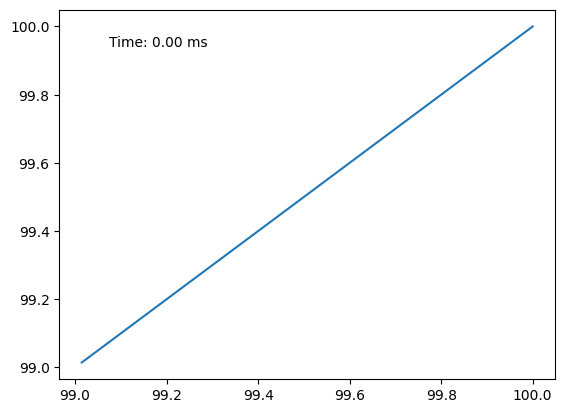

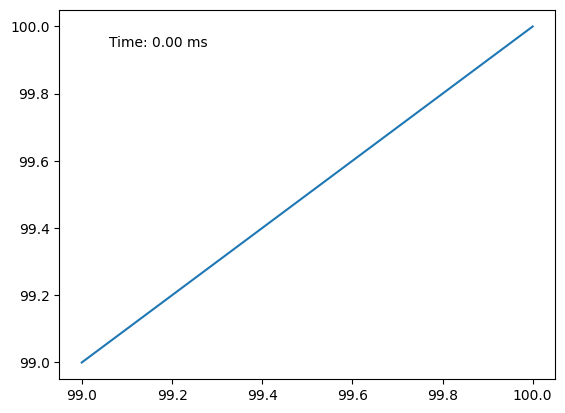

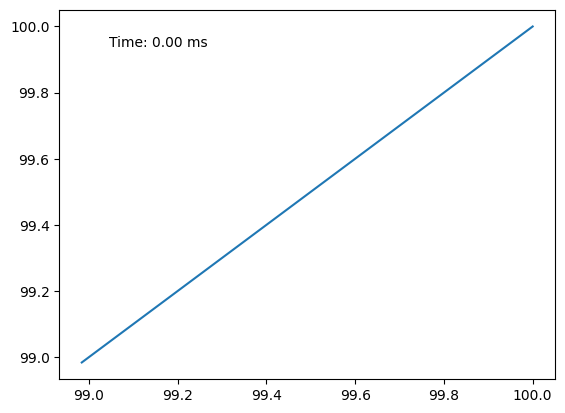

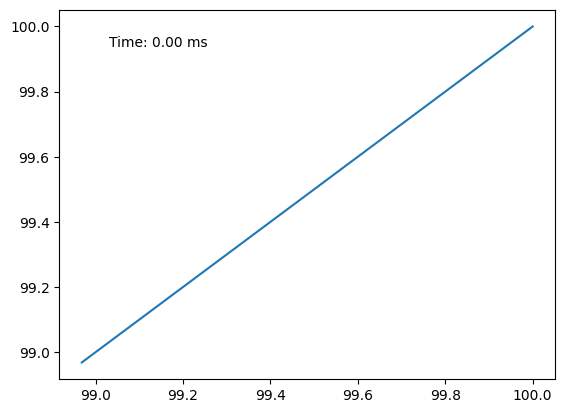

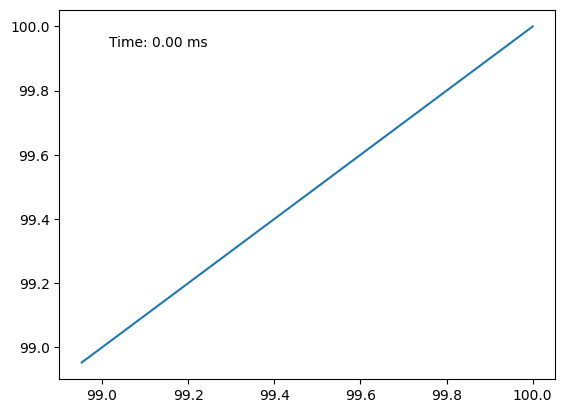

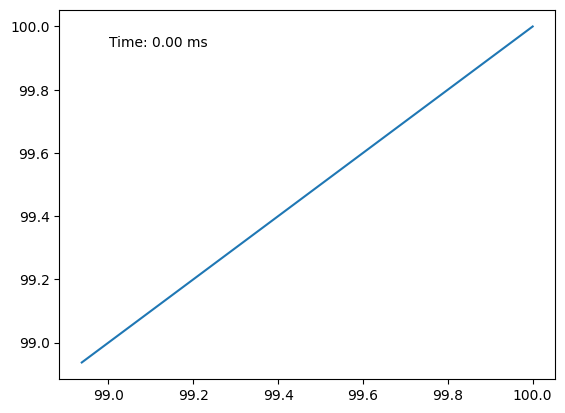

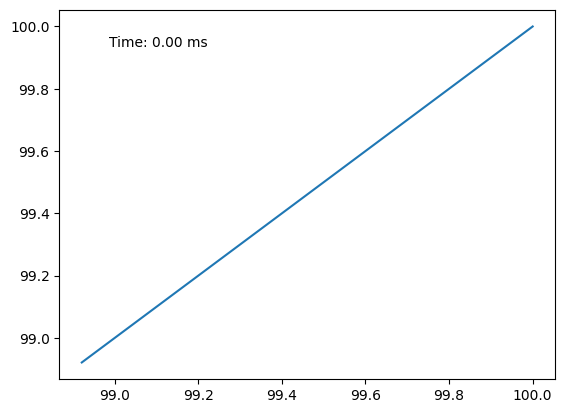

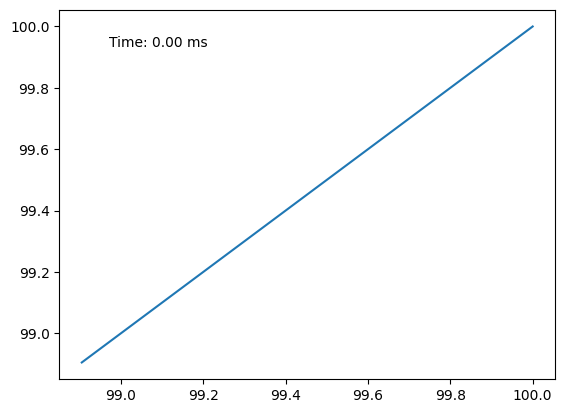

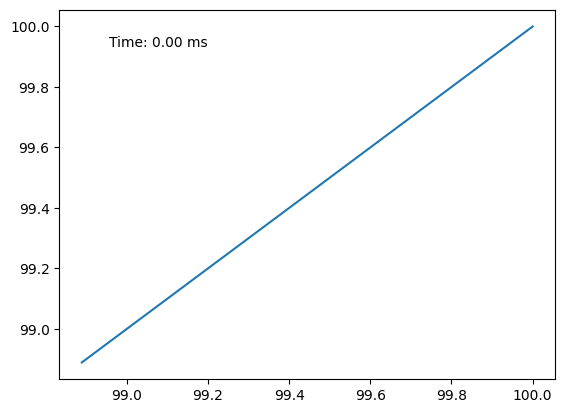

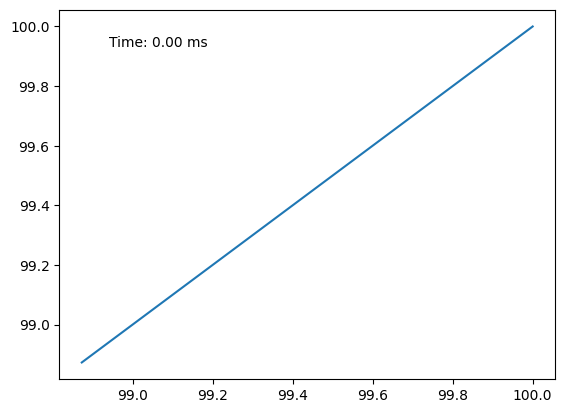

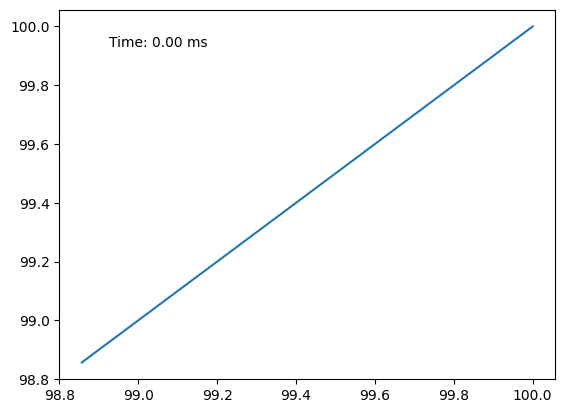

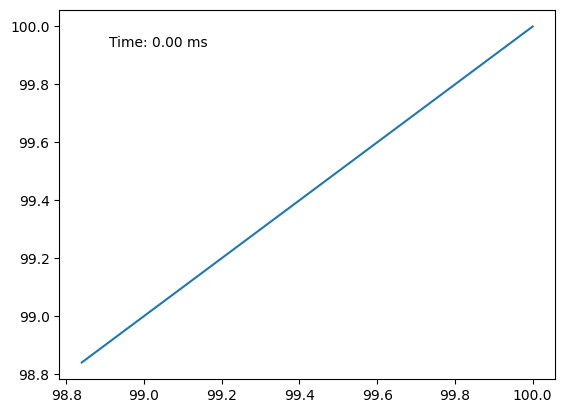

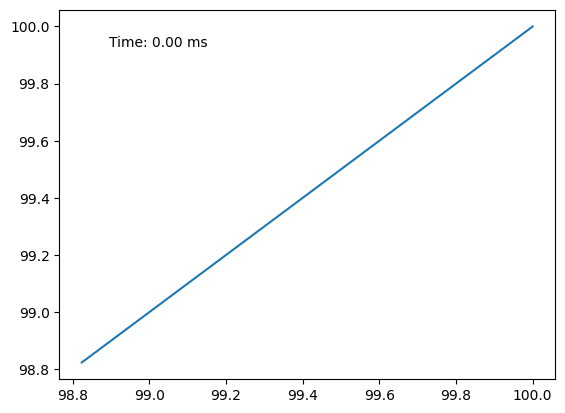

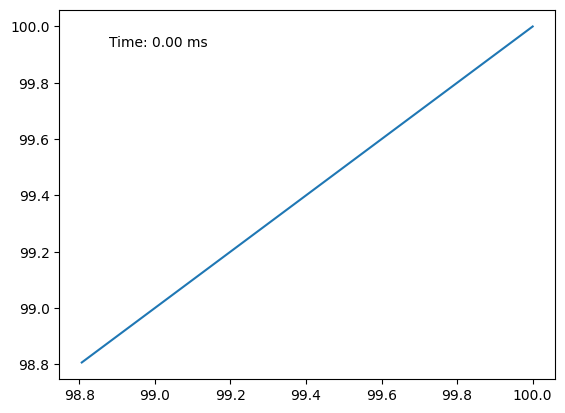

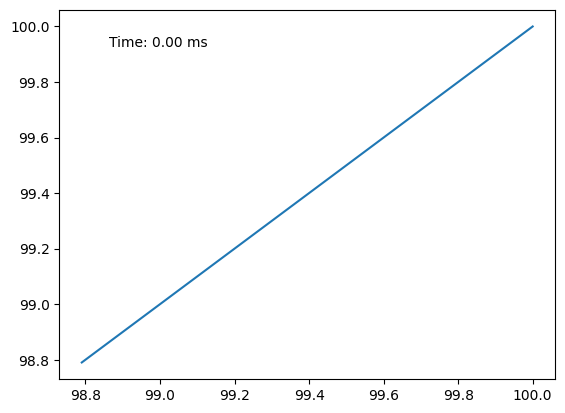

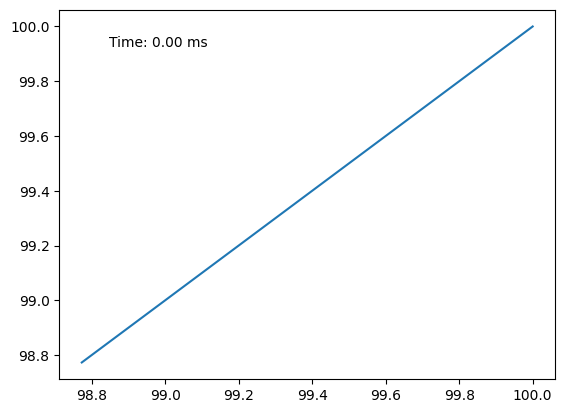

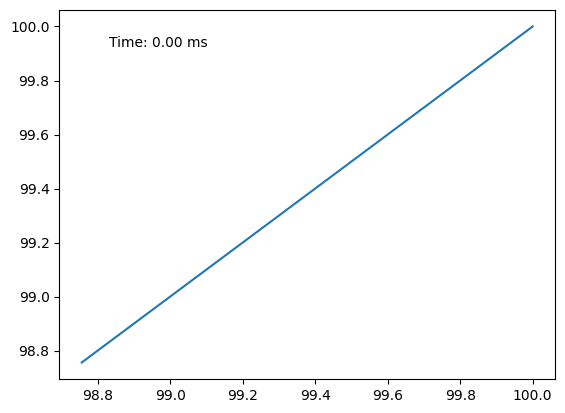

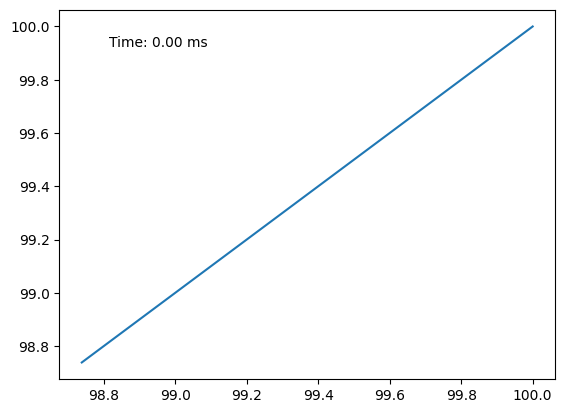

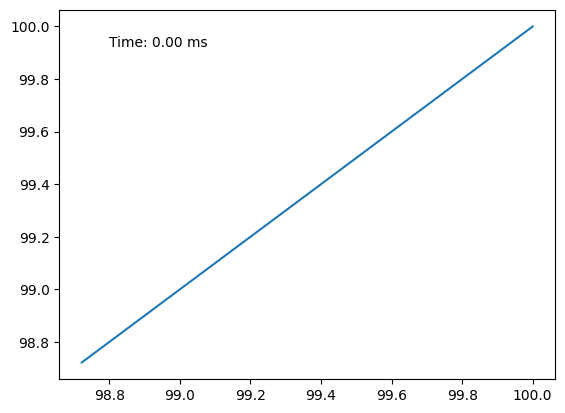

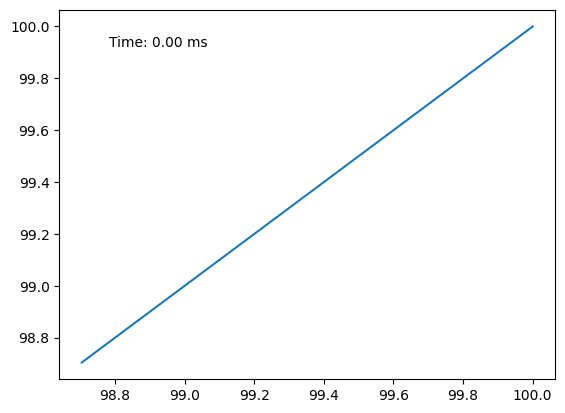

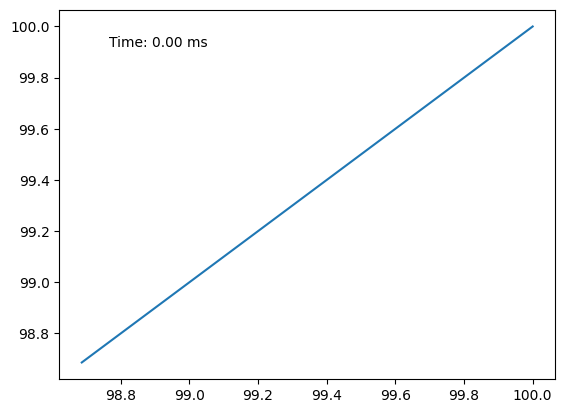

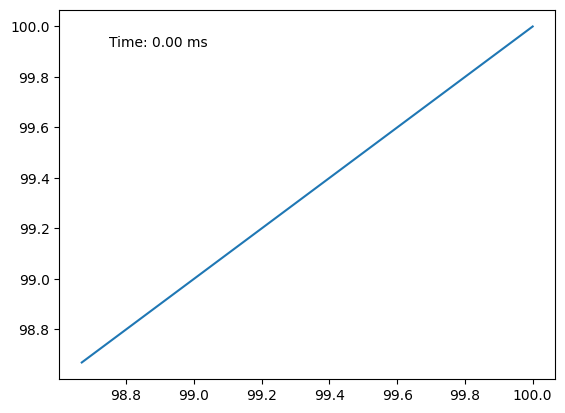

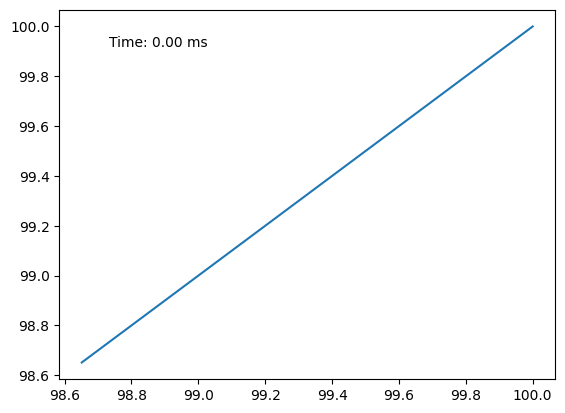

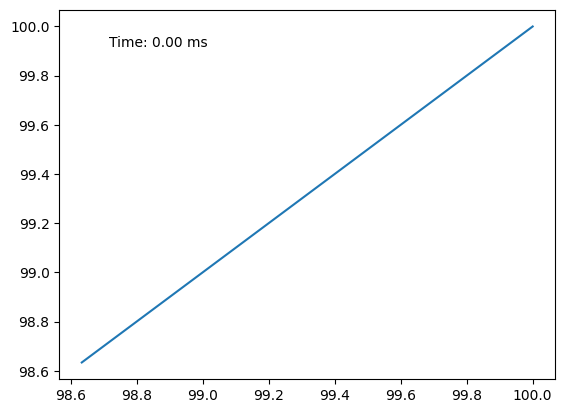

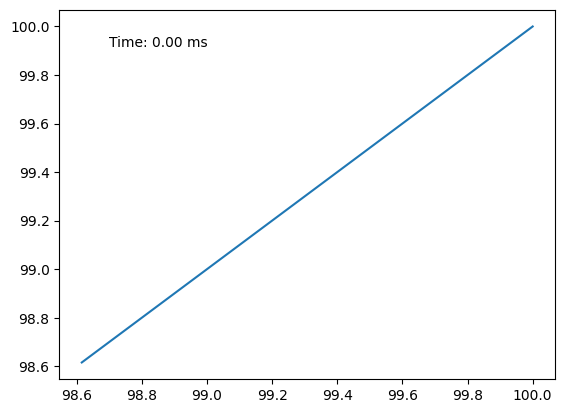

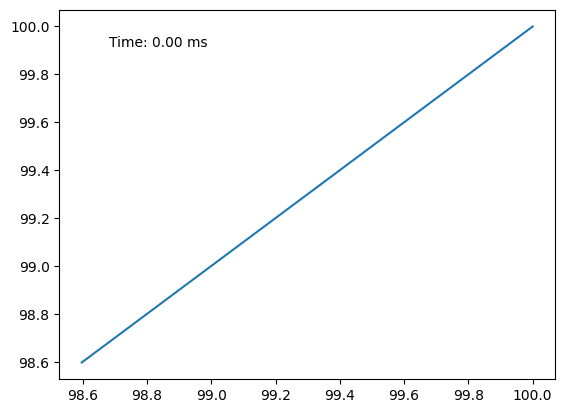

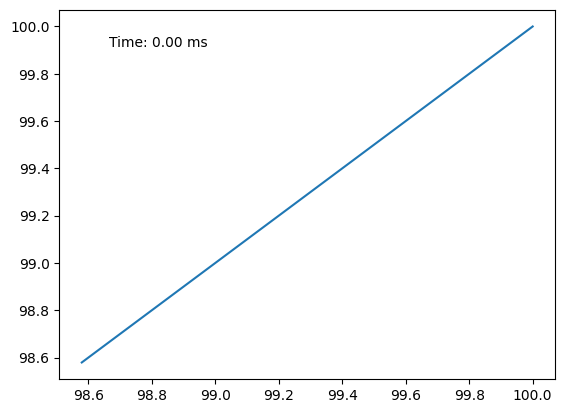

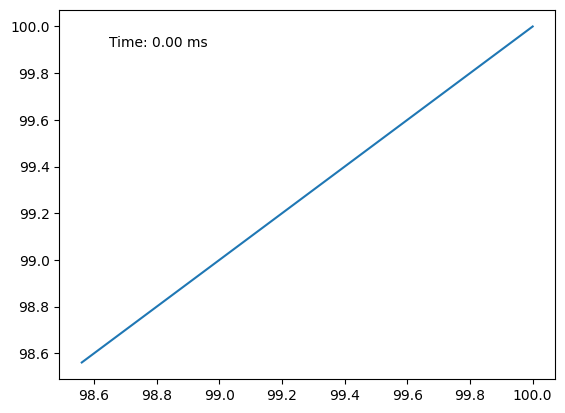

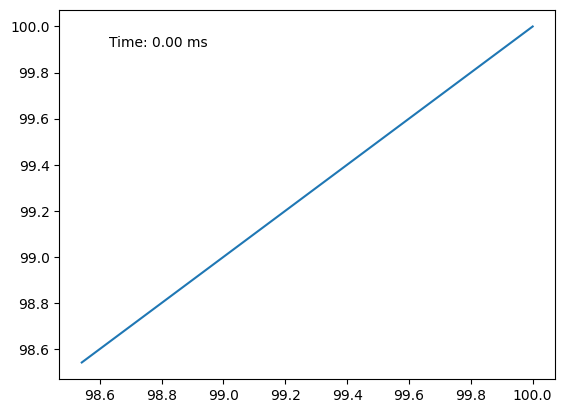

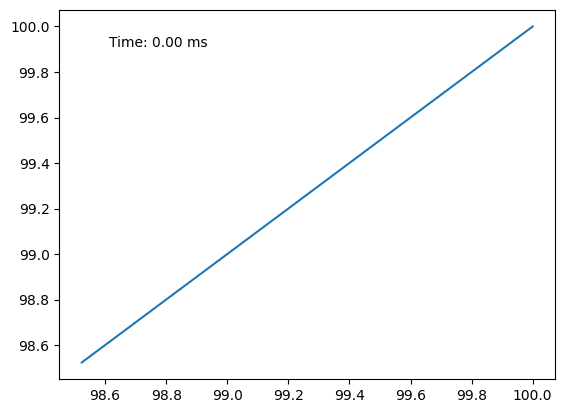

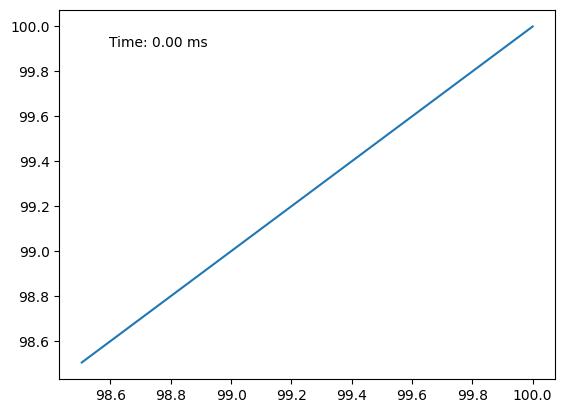

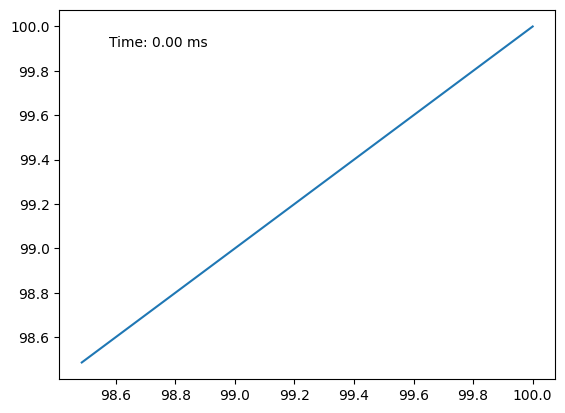

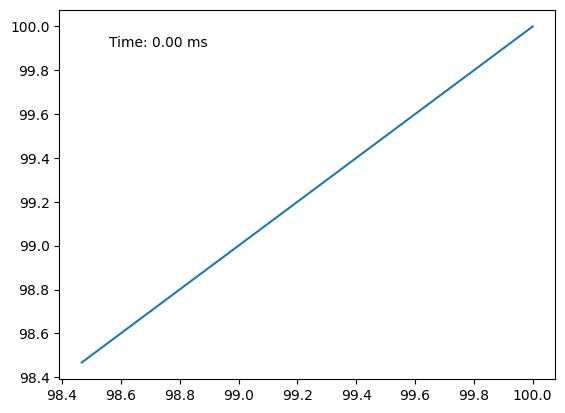

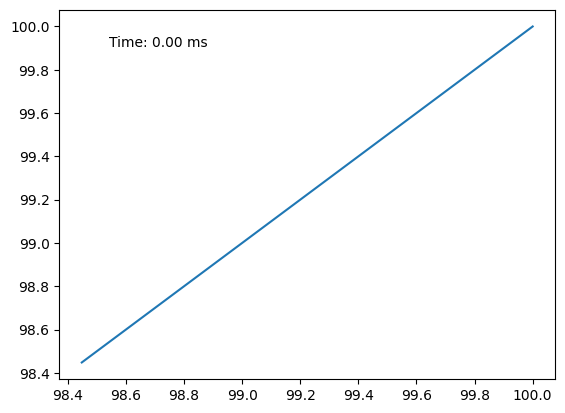

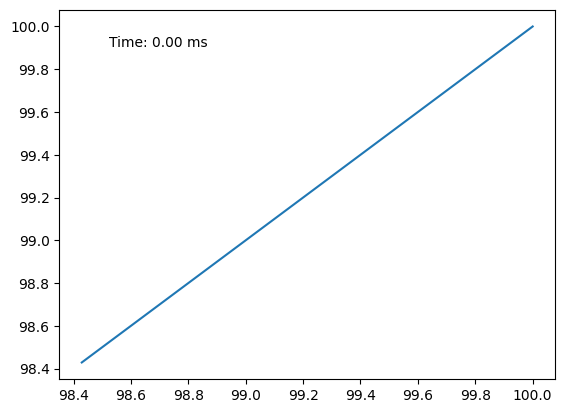

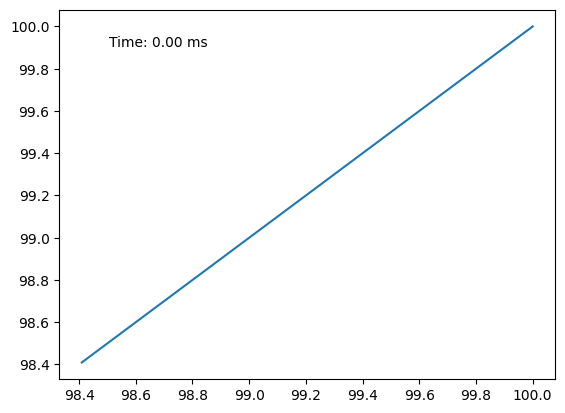

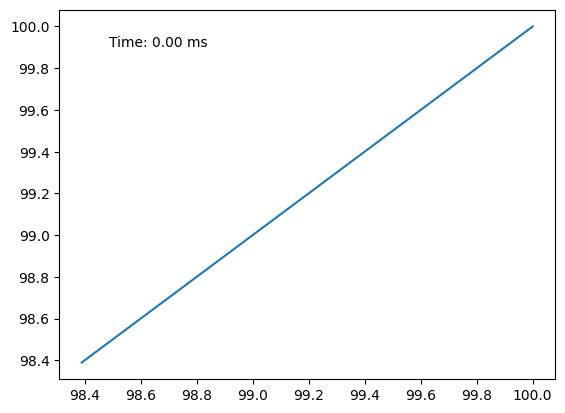

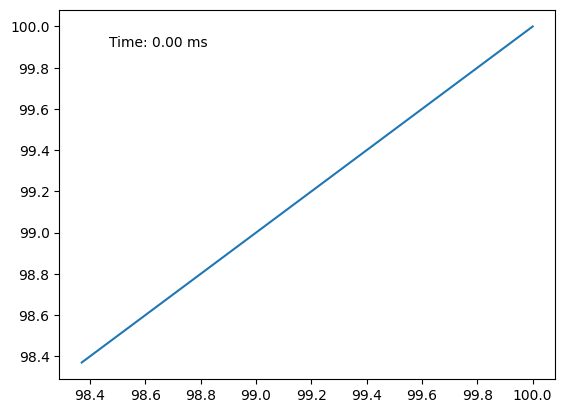

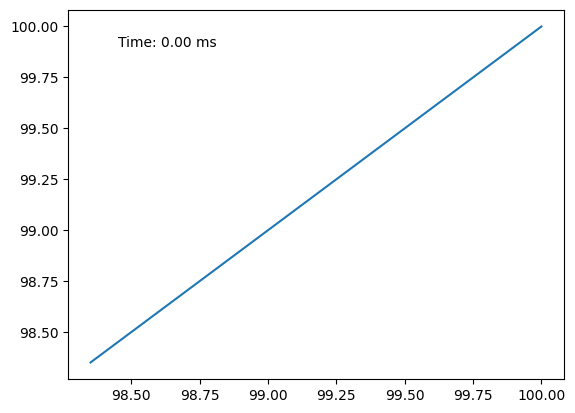

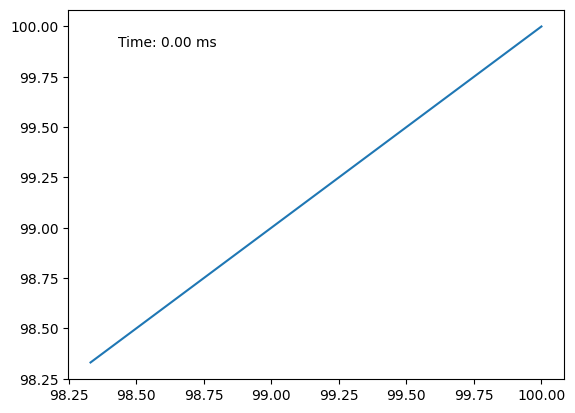

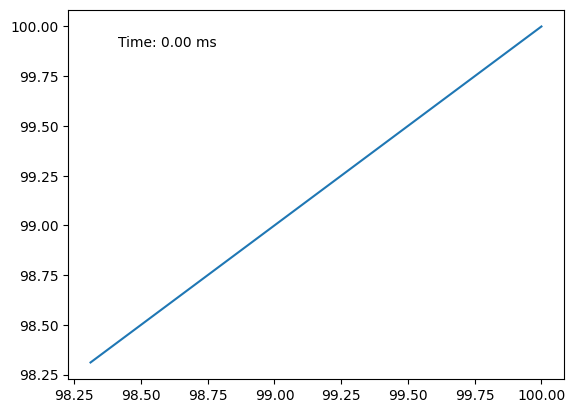

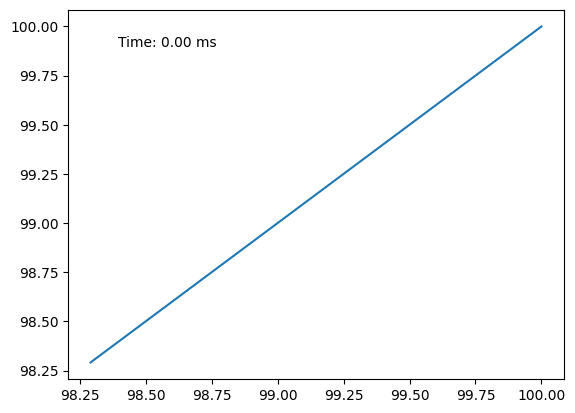

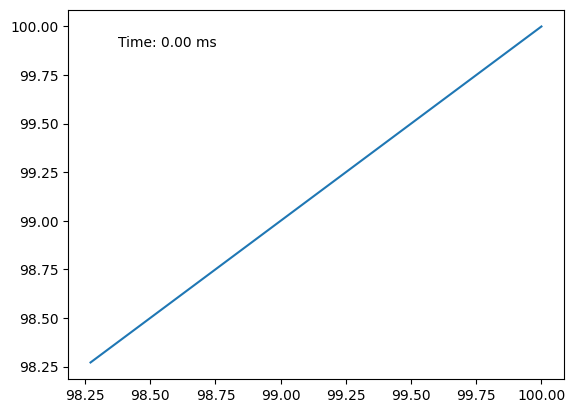

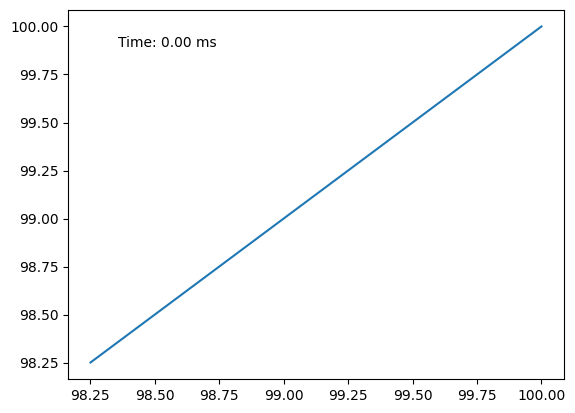

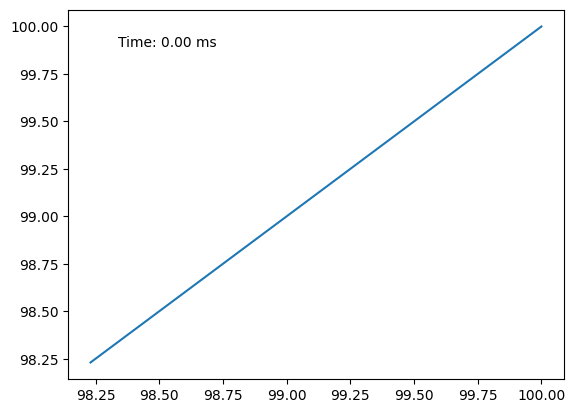

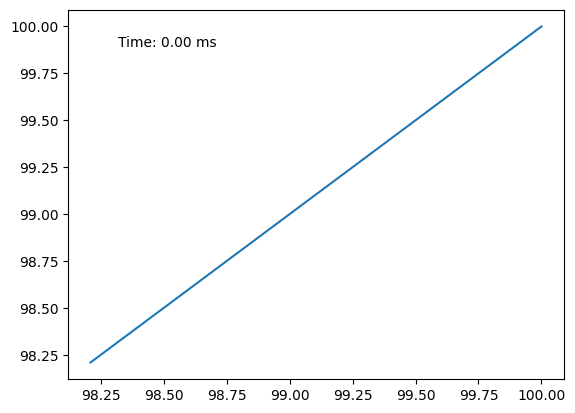

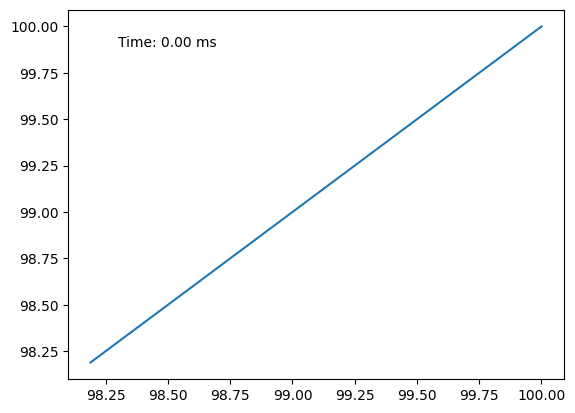

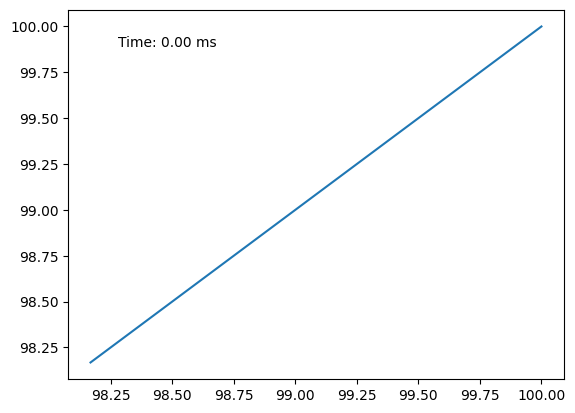

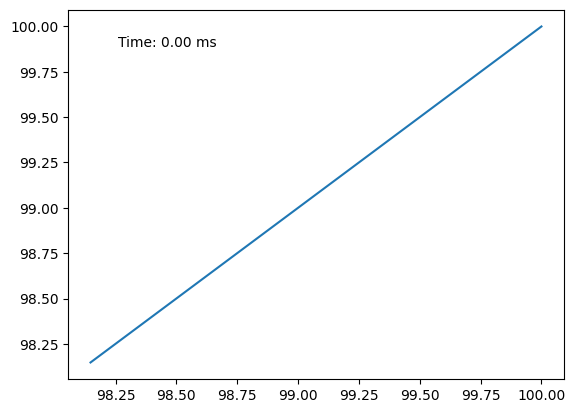

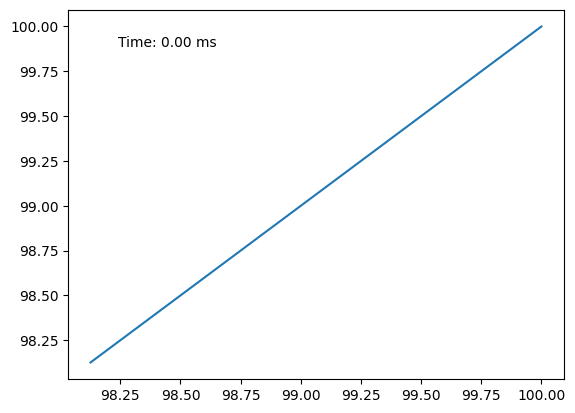

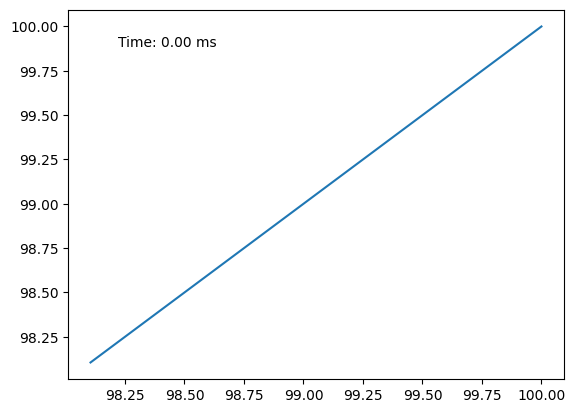

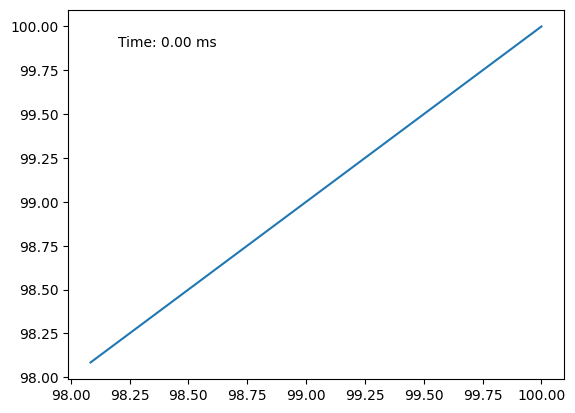

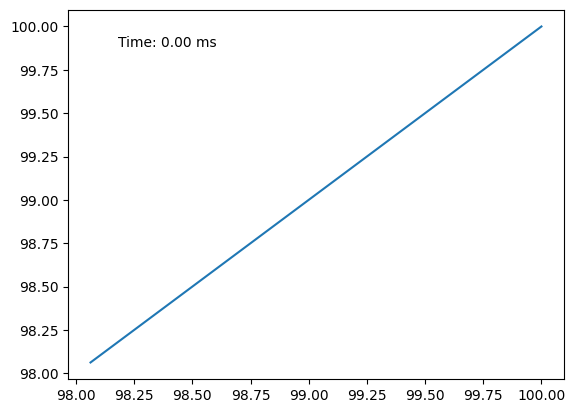

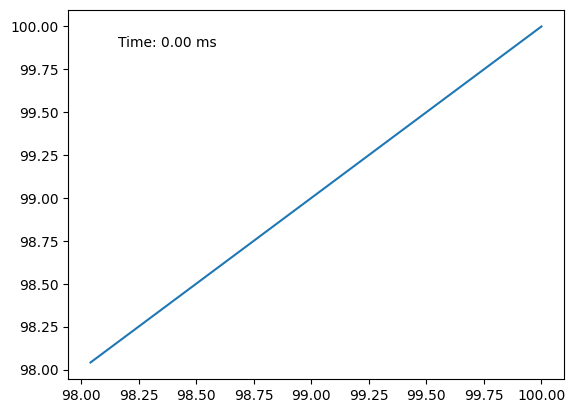

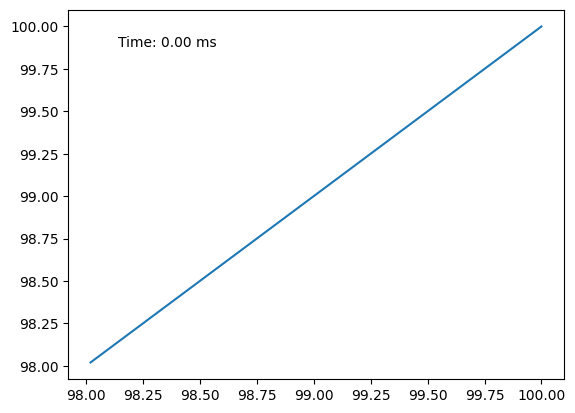

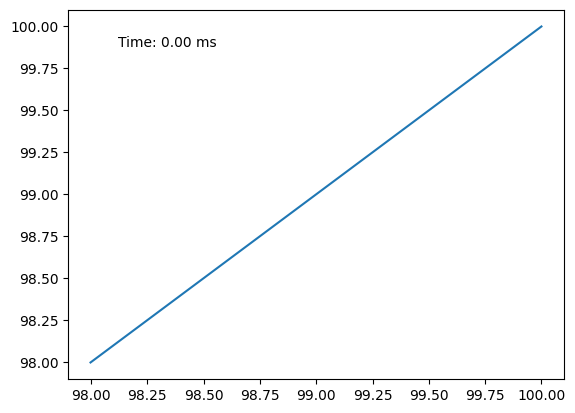

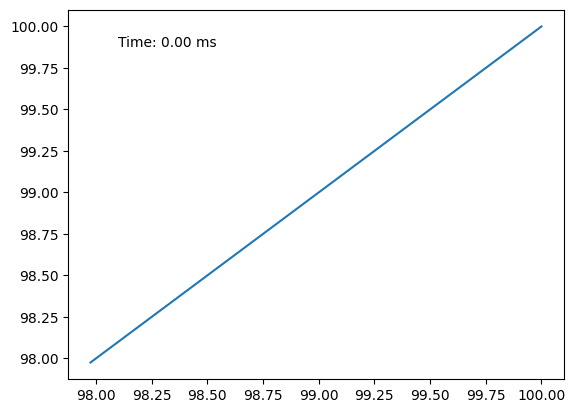

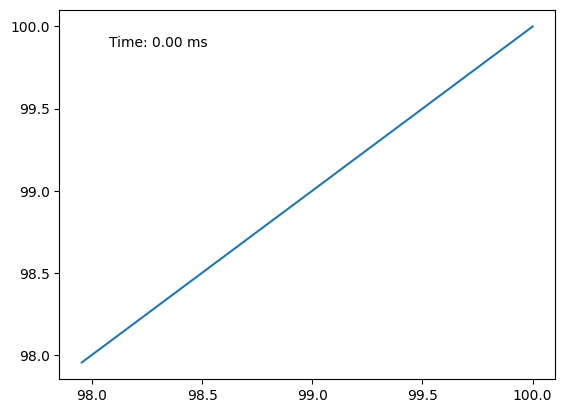

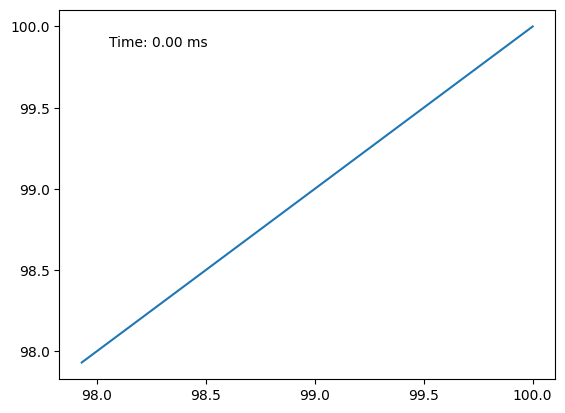

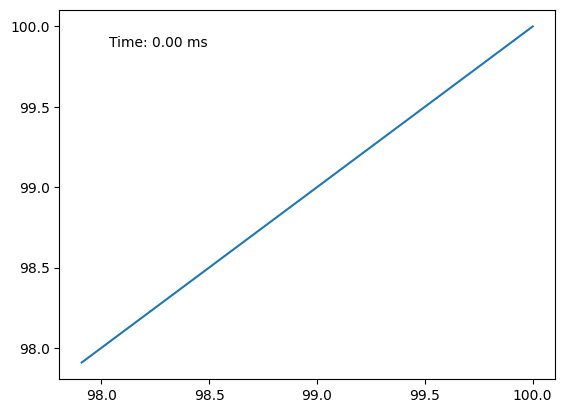

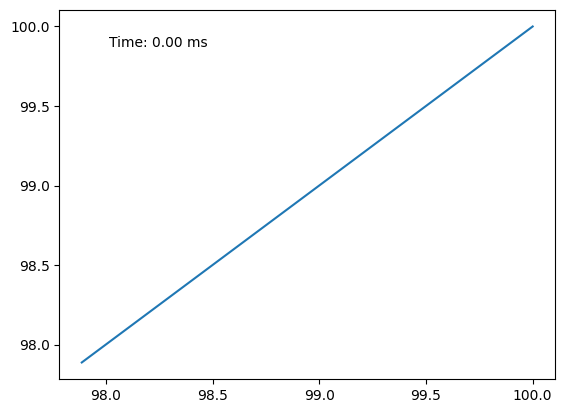

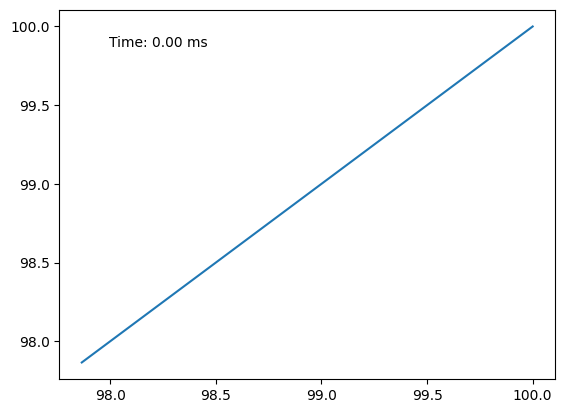

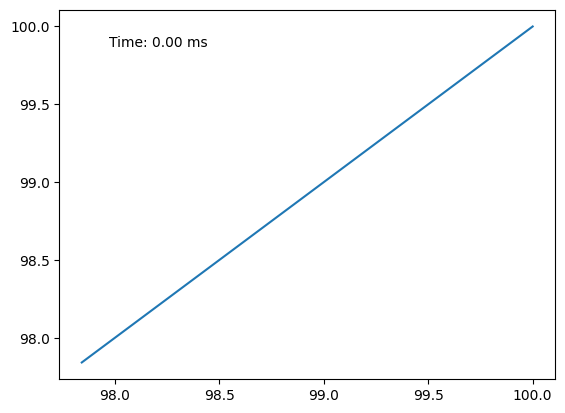

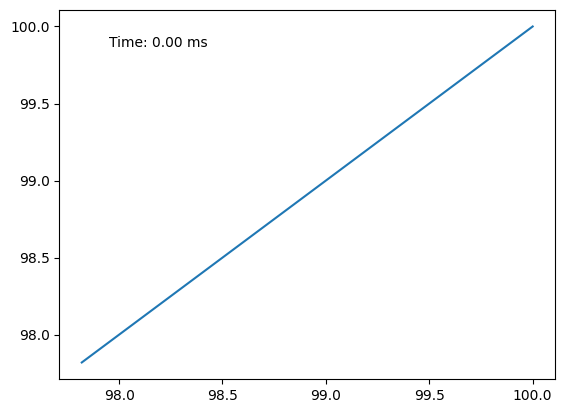

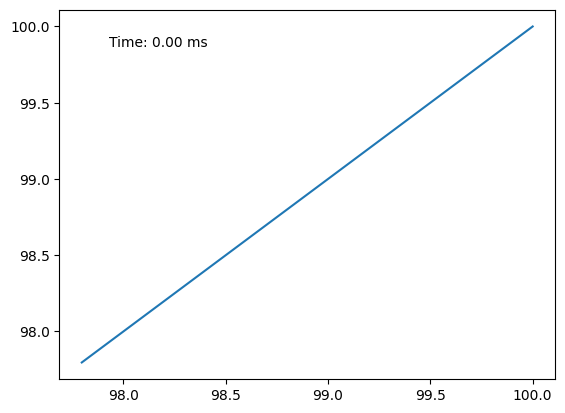

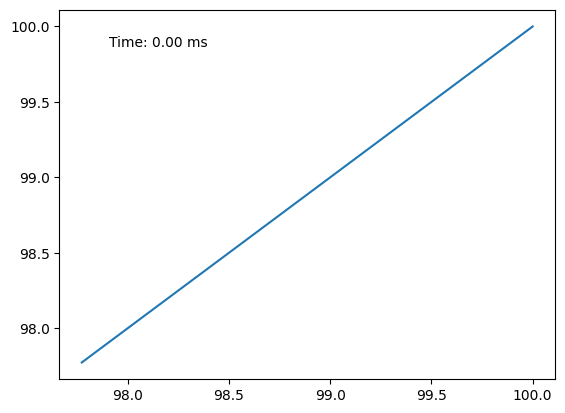

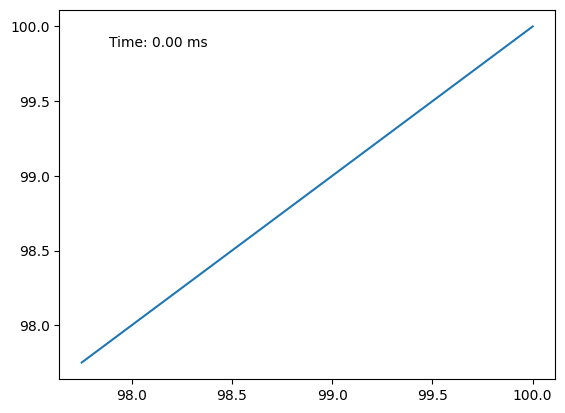

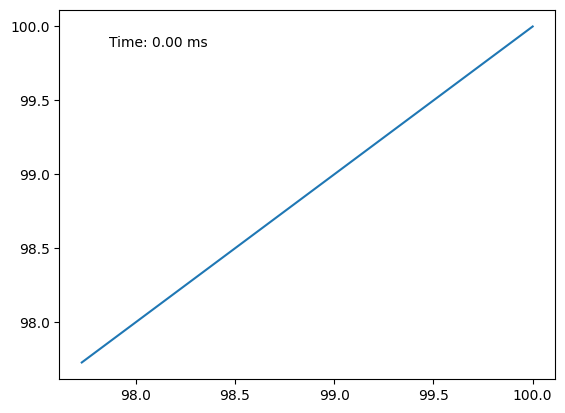

KeyboardInterrupt: 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# paper, but hope to compare my results.
# Constants Needed
c = 299792458  # Speed of light in m/s
G = 6.67e-11  # Gravitational Constant
M_sun = 1.989e30  # Mass of the sun in kilograms
M_solar_mass = 2 #float(input('Enter the mass of the black hole in solar masses: '))
M_blackhole = M_solar_mass * M_sun  # Mass of the black hole in kilograms
rs = (2*G*M_blackhole)/(c*c)  # Schwarzschild Radius in meters
rs_km = rs/1000  # Schwarzschild Radius in kilometers

# Code to Generate Black Hole
theta = np.linspace(0, 2*np.pi, 100)
x_bh = rs_km * np.cos(theta)
y_bh = rs_km * np.sin(theta)
plt.fill(x_bh, y_bh, 'k', label='black hole')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('Photon Trajectory')
plt.grid(True)


def geodesic(t, y, M_blackhole):
    x = y[0]
    yy = y[1]
    vx = y[2]
    vy = y[3]

    c = 299792458.  # Speed of light in m/s
    G = 6.67e-11   # Gravitational constant in m^3 kg^-1 s^-2
    rs = (2 * G * M_blackhole) / (c ** 2)  # Schwarzschild radius

    alpha = 1 - rs / x
    beta = -rs / (2 * x)

    dy = np.zeros(4)
    dy[0] = vx
    dy[1] = vy
    dy[2] = alpha * beta * (vy ** 2 - vx ** 2) - (G * M_blackhole / x ** 2) * vx
    dy[3] = alpha * beta * (vx ** 2 - vy ** 2) - (G * M_blackhole / x ** 2) * vy

    return dy

# Code to generate Accretion Disk
x_accretiondisk = 3*rs_km * np.cos(theta)
y_accretiondisk = 3*rs_km * np.sin(theta)
plt.plot(x_accretiondisk, y_accretiondisk, "r", linewidth=2, label='accretion disk')

# Code to generate Photon's "Unstable Orbit"
x_photonorbit = 6*rs_km * np.cos(theta)
y_photonorbit = 6*rs_km * np.sin(theta)
plt.plot(x_photonorbit, y_photonorbit, "g", linewidth=2, label='ISCO')
plt.grid(True)

# Code to Generate an array of photons approaching
# Get initial position of "centered" vector
#InitialPosition = np.array(list(map(float, input('Enter the initial position [x0 y0] in km: ').split())))
InitialPosition = [100, 100]

# Ensure that "centered" photon is not inside Schwarzschild Radius
center = np.array([0, 0])
dist1 = np.linalg.norm(InitialPosition - center)
if dist1 < rs_km:
    raise ValueError('Photons will start inside the black hole. Please select a different initial position.')

# Rather than entering a velocity vector, the photon will travel at the speed of light and the user will enter the angle at which it will travel
angle_degrees = 180 #float(input('Enter the angle the photons will travel in degrees: '))
angle_radians = np.deg2rad(angle_degrees)
velocity_x = -np.sin(angle_radians)
velocity_y = np.cos(angle_radians)
InitialVelocity = c * np.array([velocity_x, velocity_y])

# Distance between photons in km
d = rs_km / 10

# Calculate distance traveled in one time step
dist2 = np.linalg.norm(InitialVelocity)

# Normalize Velocity Vector
InitialVelocity_norm = InitialVelocity / dist2

# Create an array of photons
num_photons = int(1)
photon_pos = np.zeros((num_photons, 2))
for n in range(num_photons):
    photon_pos[n, 0:2] = InitialPosition + n*d*InitialVelocity_norm
photon_vel = np.tile(InitialVelocity_norm, (num_photons, 1))
plt.plot(photon_pos[:, 0], photon_pos[:, 1], '.', linewidth=2, label='photon trajectory')
plt.legend()

# Plot the trajectory of the photons
# Calculate the radius of the "Innermost Stable Circular Orbit (ISCO)
r_isco = 6 * rs_km
# Velocity of the Photon at the ISCO in km/s
v_isco = 3e8 #np.sqrt(G * M_blackhole / r_isco) / 1000
# The orbital period of a photon at the ISCO (needed to determine how long to run the program)
T_isco = 2 * np.pi * r_isco / v_isco

# Define the time step and total time
t_final = 1.5 * T_isco
print(T_isco, t_final)
dt = t_final / 10000

# Initialize the plot
#plt.figure()


# Define the geodesic function for the ODE solver
def geodesic(y, t, M_blackhole):
    x, y, vx, vy = y
    r = np.sqrt(x**2 + y**2)
    ax = -G * M_blackhole * x / (r**3)
    ay = -G * M_blackhole * y / (r**3)
    return [vx, vy, ax, ay]

for n in range(num_photons):
    pos = photon_pos[n, :]
    vel = photon_vel[n, :]

    tspan = np.linspace(0, t_final, int(t_final/dt))

    # Initial conditions for ODE solver
    y0 = np.concatenate((pos, vel))
    sol = odeint(geodesic, y0, tspan, args=(M_blackhole,))
    photon_traj = sol[:, 0:2]

    for i, t in enumerate(tspan):
      #plt.clf()
      plt.plot(photon_traj[0:i+1, 0], photon_traj[0:i+1, 1])

      # Update the time text and refresh the figure
      plt.text(0.1, 0.9, f'Time: {(t*1e3):.2f} ms', transform=plt.gca().transAxes)
      #plt.draw()

      # Pause briefly to slow down the animation
      plt.pause(0.01)


In [ ]:
t_final*c

333.6576053228981

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create the black hole at the origin
def create_circle():
    circle = plt.Circle((0, 0), radius=30, color='black')
    return circle

# Photon escape trajectory
def photon_trajectory():
    # Parabolic trajectory: highly curved near the black hole, escaping far away
    theta = np.linspace(-np.pi / 2, np.pi / 2, 1000)  # Angle for smooth parabolic escape

    # Equation for a smooth, continuous parabolic escape trajectory
    a = 180  # Controls curvature
    r = a / (1 + np.cos(theta))  # Photon starts near the black hole, curves and escapes

    # Convert to Cartesian coordinates
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return x, y

# Plotting the black hole and the photon's trajectory
def plot_black_hole_and_photon_trajectory():
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot the black hole
    black_hole = create_circle()
    ax.add_artist(black_hole)

    # Get photon trajectory
    x, y = photon_trajectory()

    # Plot the photon trajectory, starting near the black hole and escaping
    ax.plot(x, y, color='blue', label="Photon Trajectory")

    # Set plot limits, labels, and title
    ax.set_xlim(-200, 200)
    ax.set_ylim(-200, 200)
    ax.set_aspect('equal')
    ax.set_title("Photon Trajectory around a Black Hole")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")

    # Add legend
    ax.legend()

    # Show plot
    plt.show()

# Call the function to plot
plot_black_hole_and_photon_trajectory()


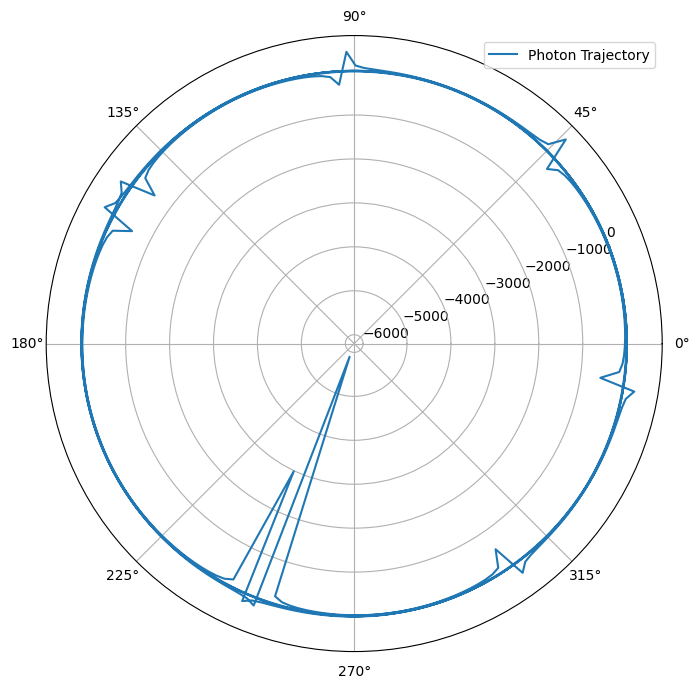

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Schwarzschild parameters
rs = 2  # Example Schwarzschild radius (set for simplicity)

# Differential equation du/dphi and d^2u/dphi^2 = 3u^2 - u
def photon_trajectory(phi, y):
    u, du_dphi = y
    d2u_dphi2 = 3 * u**2 - u
    return [du_dphi, d2u_dphi2]

# Initial conditions
u0 = 0.5 / rs  # Initial radial position (adjust as needed)
du_dphi0 = 0.0  # Assume initially tangential motion

# Solve the ODE
phi_span = (0, 10 * np.pi)  # Cover multiple orbits
initial_conditions = [u0, du_dphi0]
sol = solve_ivp(photon_trajectory, phi_span, initial_conditions, t_eval=np.linspace(0, 10 * np.pi, 1000))

# Convert u back to r
u_vals = sol.y[0]
r_vals = 1 / u_vals

# Plot in polar coordinates
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.plot(sol.t, r_vals, label="Photon Trajectory")
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Simulating discrete quantum gravity entropy scaling
# Assumption: The number of microstates grows as a function of topology (Euler characteristic χ)
# We test whether entropy follows a logarithmic relation: S ~ log(N_states)

def entropy_from_topology(euler_characteristic):
    """Compute entropy using a topological model where entropy scales as log of state count."""
    N_states = np.abs(euler_characteristic) ** 2  # Assuming microstates grow with χ^2
    entropy = np.log(N_states) if N_states > 0 else 0  # Avoid log(0) issues
    return entropy

# Test cases with different Euler characteristics
euler_values = np.arange(-10, 11, 1)  # Euler characteristics from -10 to 10
entropy_values = [entropy_from_topology(χ) for χ in euler_values]

# Prepare results for analysis
test_results = list(zip(euler_values, entropy_values))
test_results

[(-10, 4.605170185988092),
 (-9, 4.394449154672439),
 (-8, 4.1588830833596715),
 (-7, 3.8918202981106265),
 (-6, 3.58351893845611),
 (-5, 3.2188758248682006),
 (-4, 2.772588722239781),
 (-3, 2.1972245773362196),
 (-2, 1.3862943611198906),
 (-1, 0.0),
 (0, 0),
 (1, 0.0),
 (2, 1.3862943611198906),
 (3, 2.1972245773362196),
 (4, 2.772588722239781),
 (5, 3.2188758248682006),
 (6, 3.58351893845611),
 (7, 3.8918202981106265),
 (8, 4.1588830833596715),
 (9, 4.394449154672439),
 (10, 4.605170185988092)]

In [ ]:
import scipy.stats as stats

# Simulating CMB correlations based on topological quantum gravity predictions
# We compare a normal Gaussian distribution (standard physics) vs. predicted non-Gaussian deviations

# Generate synthetic CMB temperature fluctuations (Gaussian vs. Topological Prediction)
np.random.seed(42)
cmb_gaussian = np.random.normal(0, 1, 1000)  # Standard Gaussian fluctuations
cmb_topological = cmb_gaussian + 0.1 * np.sin(np.linspace(0, 10, 1000))  # Injecting a small topological effect

# Statistical test: Compare distributions (Shapiro-Wilk test for normality)
gaussian_test = stats.shapiro(cmb_gaussian)
topological_test = stats.shapiro(cmb_topological)

# Results
cmb_results = {
    "Gaussian CMB (Shapiro-Wilk p-value)": gaussian_test.pvalue,
    "Topological CMB (Shapiro-Wilk p-value)": topological_test.pvalue
}
cmb_results

{'Gaussian CMB (Shapiro-Wilk p-value)': 0.6272578290249117,
 'Topological CMB (Shapiro-Wilk p-value)': 0.7902863459322746}

Temporal Entanglement Entropy: 1.999999999422922


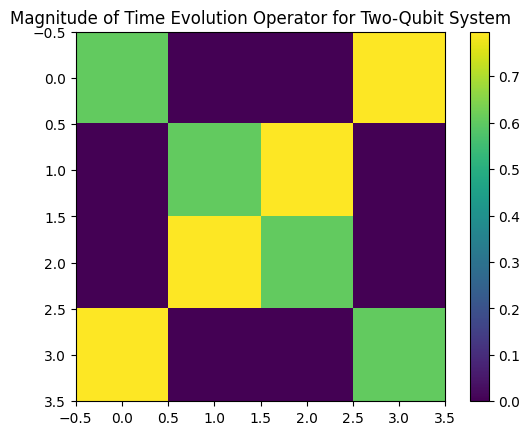

In [ ]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Define Pauli matrices for basic quantum operations
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])
identity = np.eye(2)

# Define a multi-qubit system using Kronecker products
sigma_xx = np.kron(sigma_x, sigma_x)
sigma_yy = np.kron(sigma_y, sigma_y)
sigma_zz = np.kron(sigma_z, sigma_z)
identity_4 = np.eye(4)

# Define a Hamiltonian that includes a time-dependent interaction term for a two-qubit system
def time_dependent_hamiltonian(t, omega=1.0, coupling=0.5):
    return omega * sigma_zz + coupling * np.sin(t) * sigma_xx

# Compute the time evolution operator using the time-ordered exponential
def time_evolution_operator(H_func, t0, t1, dt=0.01):
    times = np.arange(t0, t1, dt)
    U = identity_4
    for t in times:
        H_t = H_func(t)
        U = la.expm(-1j * H_t * dt) @ U
    return U

# Simulate the time evolution of an entangled system
def simulate_temporal_entanglement(t0, t1, dt=0.01):
    U = time_evolution_operator(time_dependent_hamiltonian, t0, t1, dt)
    return U

# Compute time evolution for a given range
t0, t1 = 0, 10
U_final = simulate_temporal_entanglement(t0, t1)

# Compute entanglement entropy as a measure of temporal entanglement
def entanglement_entropy(U):
    # Singular value decomposition of the evolution matrix
    singular_values = la.svd(U, compute_uv=False)
    probabilities = singular_values**2 / np.sum(singular_values**2)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Avoid log(0)
    return entropy

entropy_value = entanglement_entropy(U_final)
print("Temporal Entanglement Entropy:", entropy_value)

# Visualize the matrix
plt.imshow(np.abs(U_final), cmap='viridis')
plt.colorbar()
plt.title("Magnitude of Time Evolution Operator for Two-Qubit System")
plt.show()


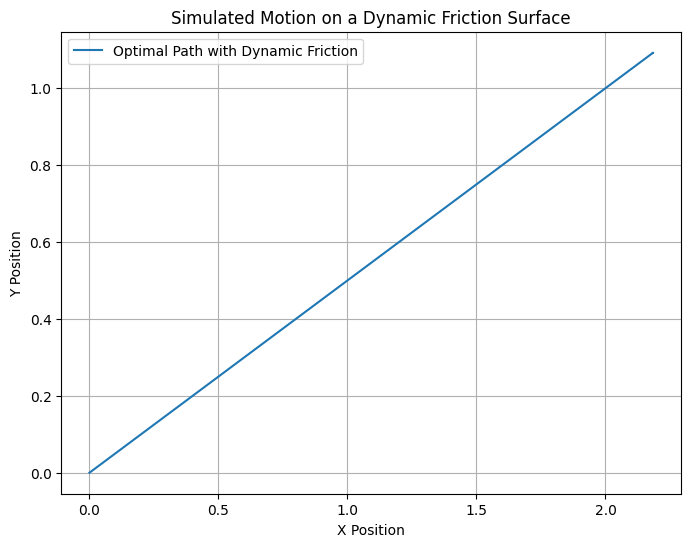

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define dynamic friction function μ(x, y, t) (e.g., sinusoidal variation)
def friction_coefficient(x, y, t):
    return 0.1 + 0.05 * np.sin(0.5 * x) * np.cos(0.5 * y) * np.sin(0.2 * t)

# Equations of motion with friction
def equations_of_motion(t, state):
    x, y, vx, vy = state  # Unpack state variables
    mu = friction_coefficient(x, y, t)

    # Constants
    g = 9.81  # Gravity
    m = 1.0   # Mass of object
    theta = 0  # Assume flat surface (for now)

    # Normal force
    N = m * g * np.cos(theta)

    # Friction force (opposing velocity)
    speed = np.sqrt(vx**2 + vy**2) + 1e-6  # Avoid division by zero
    fx = -mu * N * (vx / speed)
    fy = -mu * N * (vy / speed)

    # Newton's equations
    ax = fx / m
    ay = fy / m

    return [vx, vy, ax, ay]

# Initial conditions: starting position and velocity
initial_state = [0, 0, 2, 1]  # (x0, y0, vx0, vy0)
t_span = (0, 20)  # Simulation time range
t_eval = np.linspace(*t_span, 1000)  # Time steps

# Solve the system numerically
solution = solve_ivp(equations_of_motion, t_span, initial_state, t_eval=t_eval)

# Extract results
x_sol, y_sol = solution.y[0], solution.y[1]

# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(x_sol, y_sol, label="Optimal Path with Dynamic Friction")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Simulated Motion on a Dynamic Friction Surface")
plt.legend()
plt.grid()
plt.show()

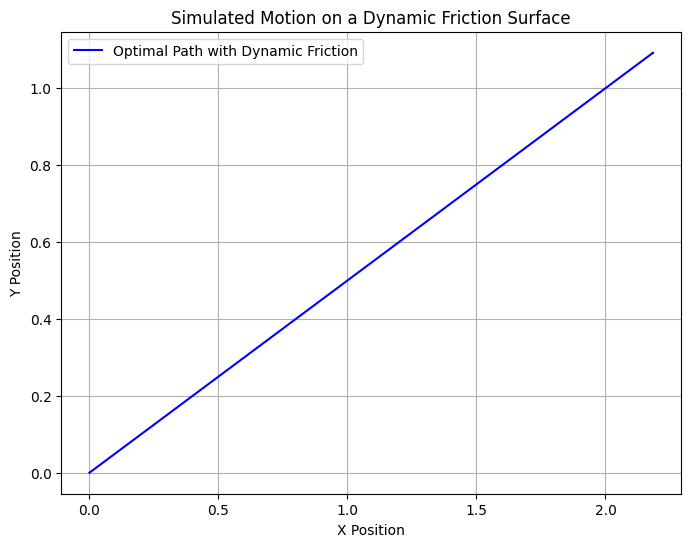

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define a dynamically changing friction function μ(x, y, t)
def friction_coefficient(x, y, t):
    return 0.1 + 0.05 * np.sin(0.5 * x) * np.cos(0.5 * y) * np.sin(0.2 * t)

# Define the equations of motion including friction
def equations_of_motion(t, state):
    x, y, vx, vy = state  # Unpack state variables
    mu = friction_coefficient(x, y, t)

    # Constants
    g = 9.81  # Gravity
    m = 1.0   # Mass of object

    # Normal force
    N = m * g

    # Friction force (opposing velocity)
    speed = np.sqrt(vx**2 + vy**2) + 1e-6  # Avoid division by zero
    fx = -mu * N * (vx / speed)
    fy = -mu * N * (vy / speed)

    # Newton's equations
    ax = fx / m
    ay = fy / m

    return [vx, vy, ax, ay]

# Initial conditions: (x0, y0, vx0, vy0)
initial_state = [0, 0, 2, 1]

# Time range
t_span = (0, 20)
t_eval = np.linspace(*t_span, 200)  # Reduce number of evaluation points

# Solve the system
solution = solve_ivp(equations_of_motion, t_span, initial_state, method="RK45", t_eval=t_eval)

# Extract results
x_sol, y_sol = solution.y[0], solution.y[1]

# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(x_sol, y_sol, label="Optimal Path with Dynamic Friction", color="blue")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Simulated Motion on a Dynamic Friction Surface")
plt.legend()
plt.grid()
plt.show()


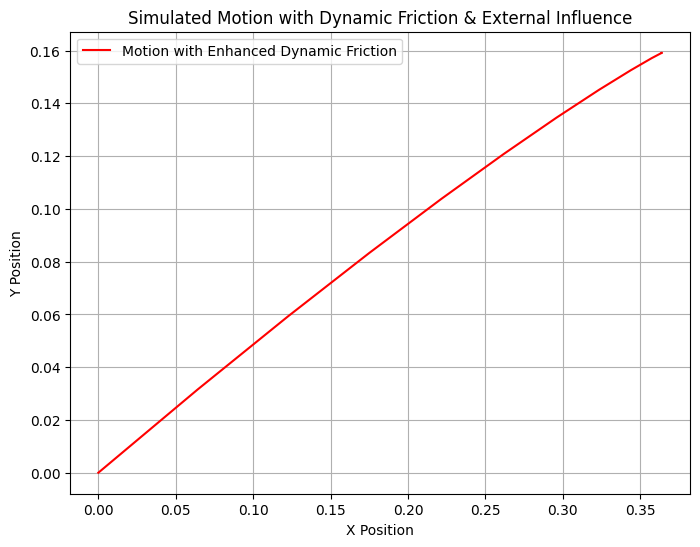

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# More pronounced dynamic friction function
def friction_coefficient(x, y, t):
    return 0.2 + 0.15 * np.sin(2 * x) * np.cos(2 * y) * np.sin(0.5 * t)

# External force (to enhance path deviation)
def external_force(t):
    return 0.5 * np.array([np.cos(0.3 * t), np.sin(0.3 * t)])

# Equations of motion with external force
def equations_of_motion(t, state):
    x, y, vx, vy = state  # Unpack state variables
    mu = friction_coefficient(x, y, t)

    # Constants
    g = 9.81  # Gravity
    m = 1.0   # Mass of object

    # Normal force
    N = m * g

    # Friction force (opposing velocity)
    speed = np.sqrt(vx**2 + vy**2) + 1e-6  # Avoid division by zero
    fx = -mu * N * (vx / speed)
    fy = -mu * N * (vy / speed)

    # Add external force to push object off straight path
    fx_ext, fy_ext = external_force(t)

    # Newton's equations
    ax = (fx + fx_ext) / m
    ay = (fy + fy_ext) / m

    return [vx, vy, ax, ay]

# Initial conditions: Lower velocity to see friction effects
initial_state = [0, 0, 1, 0.5]

# Time range
t_span = (0, 20)
t_eval = np.linspace(*t_span, 300)

# Solve the system
solution = solve_ivp(equations_of_motion, t_span, initial_state, method="RK45", t_eval=t_eval)

# Extract results
x_sol, y_sol = solution.y[0], solution.y[1]

# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(x_sol, y_sol, label="Motion with Enhanced Dynamic Friction", color="red")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Simulated Motion with Dynamic Friction & External Influence")
plt.legend()
plt.grid()
plt.show()


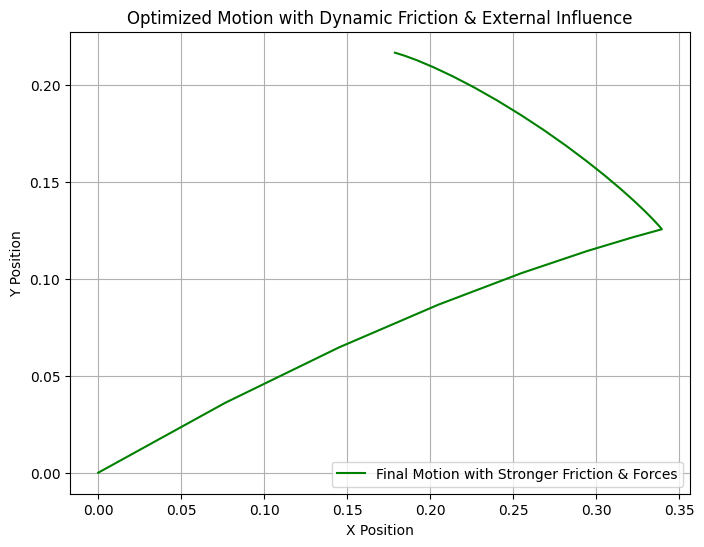

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Even stronger dynamic friction function
def friction_coefficient(x, y, t):
    return 0.3 + 0.25 * np.sin(3 * x) * np.cos(3 * y) * np.sin(0.7 * t)

# Stronger external force
def external_force(t):
    return 1.5 * np.array([np.cos(0.4 * t), np.sin(0.4 * t)])

# Equations of motion with enhanced friction and force
def equations_of_motion(t, state):
    x, y, vx, vy = state  # Unpack state variables
    mu = friction_coefficient(x, y, t)

    # Constants
    g = 9.81  # Gravity
    m = 1.0   # Mass of object

    # Normal force
    N = m * g

    # Friction force (opposing velocity)
    speed = np.sqrt(vx**2 + vy**2) + 1e-6  # Avoid division by zero
    fx = -mu * N * (vx / speed)
    fy = -mu * N * (vy / speed)

    # Apply stronger external force
    fx_ext, fy_ext = external_force(t)

    # Newton's equations
    ax = (fx + fx_ext) / m
    ay = (fy + fy_ext) / m

    return [vx, vy, ax, ay]

# Initial conditions: Lower velocity to emphasize friction effects
initial_state = [0, 0, 1, 0.5]

# Time range: Extended for more noticeable effects
t_span = (0, 40)
t_eval = np.linspace(*t_span, 500)

# Solve the system
solution = solve_ivp(equations_of_motion, t_span, initial_state, method="RK45", t_eval=t_eval)

# Extract results
x_sol, y_sol = solution.y[0], solution.y[1]

# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(x_sol, y_sol, label="Final Motion with Stronger Friction & Forces", color="green")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Optimized Motion with Dynamic Friction & External Influence")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Dynamic friction function
def friction_coefficient(x, y, t):
    return 0.3 + 0.25 * np.sin(3 * x) * np.cos(3 * y) * np.sin(0.7 * t)

# External force with adaptive control (adjusts based on energy loss)
def adaptive_force(t, energy_loss):
    base_force = np.array([np.cos(0.4 * t), np.sin(0.4 * t)])
    adjustment = -0.5 * np.sign(energy_loss)  # Adjust based on energy efficiency
    return base_force + adjustment * np.array([0.1, -0.1])

# Equations of motion with adaptive control
def equations_of_motion(t, state, total_energy_loss):
    x, y, vx, vy = state  # Unpack state variables
    mu = friction_coefficient(x, y, t)

    # Constants
    g = 9.81  # Gravity
    m = 1.0   # Mass

    # Normal force
    N = m * g

    # Friction force
    speed = np.sqrt(vx**2 + vy**2) + 1e-6  # Avoid division by zero
    fx = -mu * N * (vx / speed)
    fy = -mu * N * (vy / speed)

    # Compute energy loss
    energy_loss = mu * N * speed
    total_energy_loss.append(energy_loss)  # Store loss for adaptive control

    # Adaptive external force
    fx_ext, fy_ext = adaptive_force(t, np.mean(total_energy_loss))

    # Newton's equations
    ax = (fx + fx_ext) / m
    ay = (fy + fy_ext) / m

    return [vx, vy, ax, ay]

# Initial conditions
initial_state = [0, 0, 1, 0.5]

# Time range
t_span = (0, 40)
t_eval = np.linspace(*t_span, 500)

# Solve the system with adaptive control
total_energy_loss = []  # Track energy loss over time
solution = solve_ivp(equations_of_motion, t_span, initial_state, method="RK45", t_eval=t_eval, args=(total_energy_loss,))

# Extract results
x_sol, y_sol = solution.y[0], solution.y[1]

# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(x_sol, y_sol, label="Energy-Efficient Adaptive Path", color="blue")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Optimized Energy-Efficient Motion on Dynamic Friction Surface")
plt.legend()
plt.grid()
plt.show()


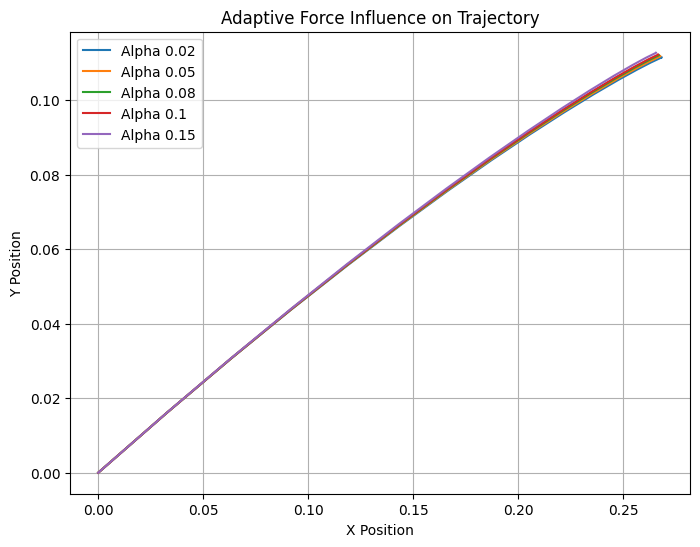

Alpha: 0.02, Energy Loss: 0.8987
Alpha: 0.05, Energy Loss: 0.8971
Alpha: 0.08, Energy Loss: 0.8956
Alpha: 0.1, Energy Loss: 0.8946
Alpha: 0.15, Energy Loss: 0.8920


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Dynamic friction function
def friction_coefficient(x, y, t):
    return 0.3 + 0.25 * np.sin(3 * x) * np.cos(3 * y) * np.sin(0.7 * t)

# Adaptive external force with varying correction factor
def adaptive_force(t, avg_energy_loss, alpha):
    return np.array([np.cos(0.4 * t), np.sin(0.4 * t)]) - alpha * avg_energy_loss * np.array([0.1, -0.1])

# Equations of motion (Optimized)
def equations_of_motion(t, state, alpha):
    x, y, vx, vy = state
    mu = friction_coefficient(x, y, t)

    g, m = 9.81, 1.0
    N = m * g  # Normal force

    # Friction force
    speed = np.hypot(vx, vy) + 1e-6
    fx = -mu * N * (vx / speed)
    fy = -mu * N * (vy / speed)

    # Energy loss estimate
    energy_loss = mu * N * speed
    fx_ext, fy_ext = adaptive_force(t, energy_loss, alpha)

    # Equations of motion
    ax = (fx + fx_ext) / m
    ay = (fy + fy_ext) / m

    return [vx, vy, ax, ay]

# Simulation parameters
initial_state = [0, 0, 1, 0.5]
t_span = (0, 10)
t_eval = np.linspace(*t_span, 300)

# Run simulations for different adaptive force factors
alpha_values = [0.02, 0.05, 0.08, 0.1, 0.15]
energy_losses = []

plt.figure(figsize=(8, 6))
for alpha in alpha_values:
    solution = solve_ivp(equations_of_motion, t_span, initial_state, args=(alpha,), method="LSODA", t_eval=t_eval)
    x_sol, y_sol = solution.y[0], solution.y[1]

    # Estimate total energy loss
    total_loss = np.trapz(friction_coefficient(x_sol, y_sol, t_eval) * 9.81 * np.hypot(solution.y[2], solution.y[3]), t_eval)
    energy_losses.append(total_loss)

    plt.plot(x_sol, y_sol, label=f"Alpha {alpha}")

# Plot results
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Adaptive Force Influence on Trajectory")
plt.legend()
plt.grid()
plt.show()

# Output energy loss values for comparison
for i, alpha in enumerate(alpha_values):
    print(f"Alpha: {alpha}, Energy Loss: {energy_losses[i]:.4f}")


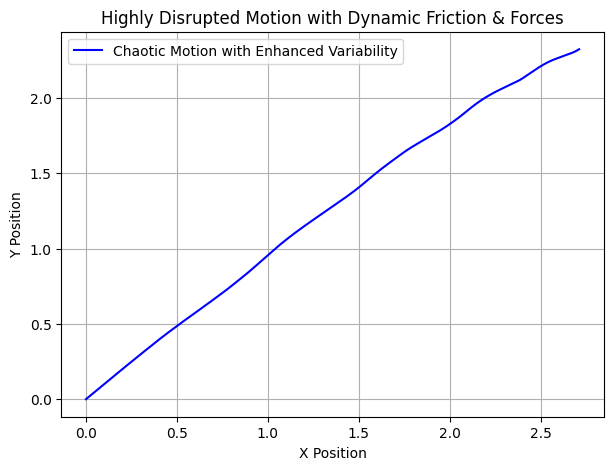

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the dynamic friction function (more aggressive variability)
def dynamic_friction(v, x, y):
    return 0.2 + 0.2 * np.sin(7 * x) * np.cos(7 * y) + 0.1 * np.abs(v) + 0.05 * np.random.randn()

# Define external force (stronger and more chaotic)
def external_force(t):
    return 0.5 * np.sin(5 * np.pi * t) + 0.3 * np.cos(3 * np.pi * t) + 0.2 * np.random.randn()

# System of differential equations governing motion
def motion(t, state):
    x, vx, y, vy = state  # Position and velocity components

    friction = dynamic_friction(np.sqrt(vx**2 + vy**2), x, y)
    Fx = -friction * vx + external_force(t) + 0.3 * np.sin(2 * np.pi * t)  # Additional oscillation
    Fy = -friction * vy + external_force(t) * 0.7 + 0.3 * np.cos(2 * np.pi * t)  # Stronger disruption

    return [vx, Fx, vy, Fy]

# Initial conditions
state0 = [0, 1, 0, 1]  # (x0, vx0, y0, vy0)
time_span = (0, 5)  # Simulate for 5 seconds
time_eval = np.linspace(0, 5, 500)

# Solve the system
solution = solve_ivp(motion, time_span, state0, t_eval=time_eval, method='RK45')

# Extract results
x_vals, y_vals = solution.y[0], solution.y[2]

# Plot the trajectory
plt.figure(figsize=(7,5))
plt.plot(x_vals, y_vals, color='blue', label='Chaotic Motion with Enhanced Variability')
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Highly Disrupted Motion with Dynamic Friction & Forces")
plt.legend()
plt.grid()
plt.show()


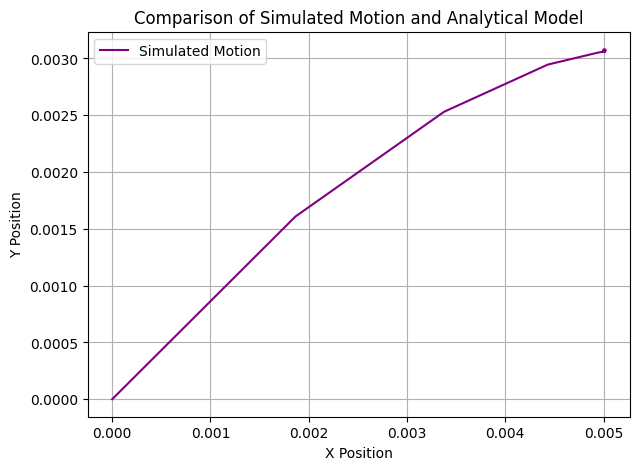

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define parameters
m = 1.0    # Mass
g = 9.81   # Gravity
A, B = 1.5, 1.5  # External force amplitudes
omega = 0.4  # External force frequency
mu_bar = 0.3  # Average friction coefficient
mu_1 = 0.25  # Friction variation factor
v0 = 1.0  # Initial velocity magnitude

# Define dynamic friction function
def mu_eff(x, y, t):
    return mu_bar + mu_1 * np.sin(3*x) * np.cos(3*y) * np.sin(0.7*t)

# Equations of motion
def equations(t, state):
    x, vx, y, vy = state
    v = np.sqrt(vx**2 + vy**2) + 1e-6  # Avoid division by zero
    gamma_t = mu_eff(x, y, t) * g / v
    ax = A * np.cos(omega * t) - gamma_t * vx
    ay = B * np.sin(omega * t) - gamma_t * vy
    return [vx, ax, vy, ay]

# Initial conditions
x0, y0 = 0, 0
vx0, vy0 = 0.1, 0.1
initial_state = [x0, vx0, y0, vy0]

# Time span
t_span = (0, 20)
t_eval = np.linspace(0, 20, 1000)

# Solve numerically
solution = solve_ivp(equations, t_span, initial_state, t_eval=t_eval)

# Extract results
x_sol, y_sol = solution.y[0], solution.y[2]

# Plot results
plt.figure(figsize=(7,5))
plt.plot(x_sol, y_sol, color='purple', label="Simulated Motion")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Comparison of Simulated Motion and Analytical Model")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Dynamic friction function (same for both cases)
def friction_coefficient(x, y, t):
    return 0.3 + 0.25 * np.sin(3 * x) * np.cos(3 * y) * np.sin(0.7 * t)

# Fixed external force (same for both cases)
def external_force(t):
    return np.array([np.cos(0.4 * t), np.sin(0.4 * t)])

# Equations of motion WITHOUT adaptation
def equations_of_motion_fixed(t, state):
    x, y, vx, vy = state
    mu = friction_coefficient(x, y, t)
    g, m = 9.81, 1.0  # Gravity, mass
    N = m * g  # Normal force
    speed = np.hypot(vx, vy) + 1e-6  # Avoid zero division
    fx = -mu * N * (vx / speed)
    fy = -mu * N * (vy / speed)
    fx_ext, fy_ext = external_force(t)
    ax = (fx + fx_ext) / m
    ay = (fy + fy_ext) / m
    return [vx, vy, ax, ay]

# Equations of motion WITH adaptive control
def equations_of_motion_adaptive(t, state):
    x, y, vx, vy = state
    mu = friction_coefficient(x, y, t)
    g, m = 9.81, 1.0
    N = m * g
    speed = np.hypot(vx, vy) + 1e-6
    fx = -mu * N * (vx / speed)
    fy = -mu * N * (vy / speed)
    fx_ext, fy_ext = external_force(t)

    # Adaptive correction (only modifying trajectory, NOT force)
    correction_factor = 0.1  # Tune this
    fx_adapt = -correction_factor * mu * np.sign(vx)
    fy_adapt = -correction_factor * mu * np.sign(vy)

    ax = (fx + fx_ext + fx_adapt) / m
    ay = (fy + fy_ext + fy_adapt) / m
    return [vx, vy, ax, ay]

# Simulation parameters
initial_state = [0, 0, 1, 0.5]
t_span = (0, 20)
t_eval = np.linspace(*t_span, 500)

# Solve both cases
solution_fixed = solve_ivp(equations_of_motion_fixed, t_span, initial_state, method="RK45", t_eval=t_eval)
solution_adaptive = solve_ivp(equations_of_motion_adaptive, t_span, initial_state, method="RK45", t_eval=t_eval)

# Extract results
x_fixed, y_fixed = solution_fixed.y[0], solution_fixed.y[1]
x_adaptive, y_adaptive = solution_adaptive.y[0], solution_adaptive.y[1]

# Plot trajectories
plt.figure(figsize=(8, 6))
plt.plot(x_fixed, y_fixed, label="Fixed Control", color="red")
plt.plot(x_adaptive, y_adaptive, label="Adaptive Control", color="blue")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Comparison of Fixed vs Adaptive Motion on a Rough Surface")
plt.legend()
plt.grid()
plt.show()


KeyboardInterrupt: 

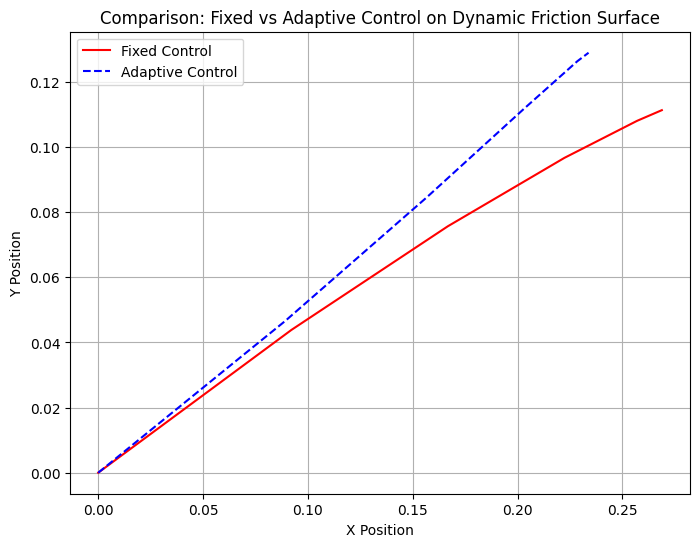

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Dynamic friction function
def friction_coefficient(x, y, t):
    return 0.3 + 0.25 * np.sin(3 * x) * np.cos(3 * y) * np.sin(0.7 * t)

# Fixed external force (same in both cases)
def external_force(t):
    return np.array([np.cos(0.4 * t), np.sin(0.4 * t)])

# Adaptive control force (reacts to friction losses)
def adaptive_force(t, avg_energy_loss):
    return external_force(t) - 0.2 * avg_energy_loss * np.array([1, -1])  # Stronger adaptation

# Equations of motion: (1) Fixed control, (2) Adaptive control
def equations_of_motion(t, state, adaptive):
    x, y, vx, vy = state
    mu = friction_coefficient(x, y, t)

    g, m = 9.81, 1.0
    N = m * g

    speed = np.hypot(vx, vy) + 1e-6
    fx = -mu * N * (vx / speed)
    fy = -mu * N * (vy / speed)

    energy_loss = mu * N * speed
    fx_ext, fy_ext = adaptive_force(t, energy_loss) if adaptive else external_force(t)

    ax = (fx + fx_ext) / m
    ay = (fy + fy_ext) / m

    return [vx, vy, ax, ay]

# Initial conditions
initial_state = [0, 0, 1, 0.5]

# Time range
t_span = (0, 20)
t_eval = np.linspace(*t_span, 200)

# Solve for fixed and adaptive cases
sol_fixed = solve_ivp(equations_of_motion, t_span, initial_state, method="LSODA", t_eval=t_eval, args=(False,))
sol_adaptive = solve_ivp(equations_of_motion, t_span, initial_state, method="LSODA", t_eval=t_eval, args=(True,))

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(sol_fixed.y[0], sol_fixed.y[1], label="Fixed Control", color="red")
plt.plot(sol_adaptive.y[0], sol_adaptive.y[1], label="Adaptive Control", color="blue", linestyle="dashed")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Comparison: Fixed vs Adaptive Control on Dynamic Friction Surface")
plt.legend()
plt.grid()
plt.show()


Optimal energy expenditure: 14.930851413913658
Final position: [10.00176587 10.001854  ]
Final velocity: [0.00056197 0.00138299]


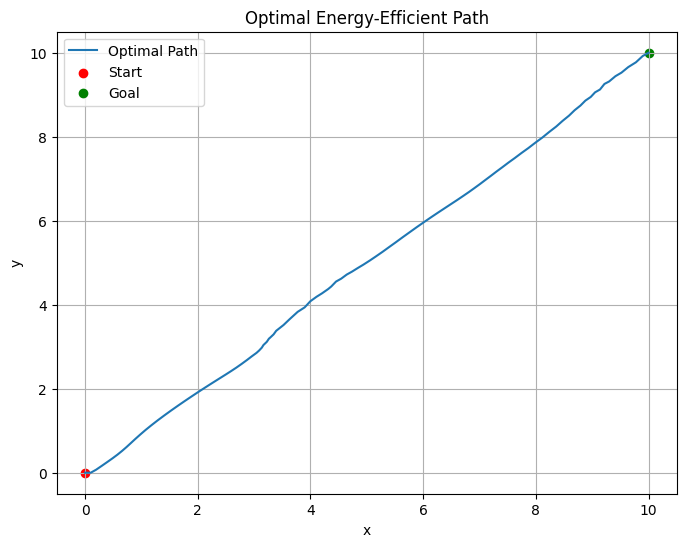

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Parameters
m = 1.0  # Mass of the object (kg)
g = 9.81  # Gravitational acceleration (m/s^2)
t0 = 0.0  # Initial time (s)
tf = 10.0  # Final time (s)
N = 100  # Number of time steps
dt = (tf - t0) / N  # Time step size
x0 = np.array([0.0, 0.0])  # Initial position (x, y)
v0 = np.array([1.0, 0.0])  # Initial velocity (vx, vy)
xf = np.array([10.0, 10.0])  # Final position (x, y)
vf = np.array([0.0, 0.0])  # Final velocity (vx, vy)

# Surface height function h(x, y, t)
def h(x, y, t):
    return np.sin(x + y + t)  # Example surface height

# Friction coefficient function mu(x, y, t)
def mu(x, y, t):
    return 0.1 + 0.05 * np.sin(x + y + t)  # Example friction coefficient

# Discretized energy functional
def energy(u_flat):
    u = u_flat.reshape(N, 2)  # Reshape control inputs (N x 2 array)
    x = np.zeros((N + 1, 2))  # Position array
    v = np.zeros((N + 1, 2))  # Velocity array
    x[0] = x0
    v[0] = v0

    E = 0.0  # Total energy

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        # Update position and velocity using dynamics
        x[k + 1] = x_k + v_k * dt
        v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k)) * dt

        # Compute energy terms
        kinetic_energy = 0.5 * m * np.linalg.norm(v_k)**2
        friction_work = mu(x_k[0], x_k[1], t) * m * g * np.linalg.norm(v_k)
        potential_energy_change = m * g * (h(x[k + 1][0], x[k + 1][1], t + dt) - h(x_k[0], x_k[1], t)) / dt

        E += (kinetic_energy + friction_work + potential_energy_change) * dt

    return E

# Constraint: Final position and velocity must match target
def constraint(u_flat):
    u = u_flat.reshape(N, 2)
    x = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    x[0] = x0
    v[0] = v0

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        x[k + 1] = x_k + v_k * dt
        v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k)) * dt

    return np.concatenate((x[-1] - xf, v[-1] - vf))

# Initial guess for control inputs (N x 2 array)
u_flat_initial = np.zeros(N * 2)

# Solve the optimization problem
constraints = {"type": "eq", "fun": constraint}
result = minimize(energy, u_flat_initial, method="SLSQP", constraints=constraints)

# Extract optimal control inputs
u_optimal = result.x.reshape(N, 2)

# Simulate the optimal trajectory
x_optimal = np.zeros((N + 1, 2))
v_optimal = np.zeros((N + 1, 2))
x_optimal[0] = x0
v_optimal[0] = v0

for k in range(N):
    t = t0 + k * dt
    x_k = x_optimal[k]
    v_k = v_optimal[k]
    u_k = u_optimal[k]

    x_optimal[k + 1] = x_k + v_k * dt
    v_optimal[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k)) * dt

# Output results
print("Optimal energy expenditure:", result.fun)
print("Final position:", x_optimal[-1])
print("Final velocity:", v_optimal[-1])

# Plot the trajectory
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(x_optimal[:, 0], x_optimal[:, 1], label="Optimal Path")
plt.scatter(x0[0], x0[1], color="red", label="Start")
plt.scatter(xf[0], xf[1], color="green", label="Goal")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimal Energy-Efficient Path")
plt.legend()
plt.grid()
plt.show()

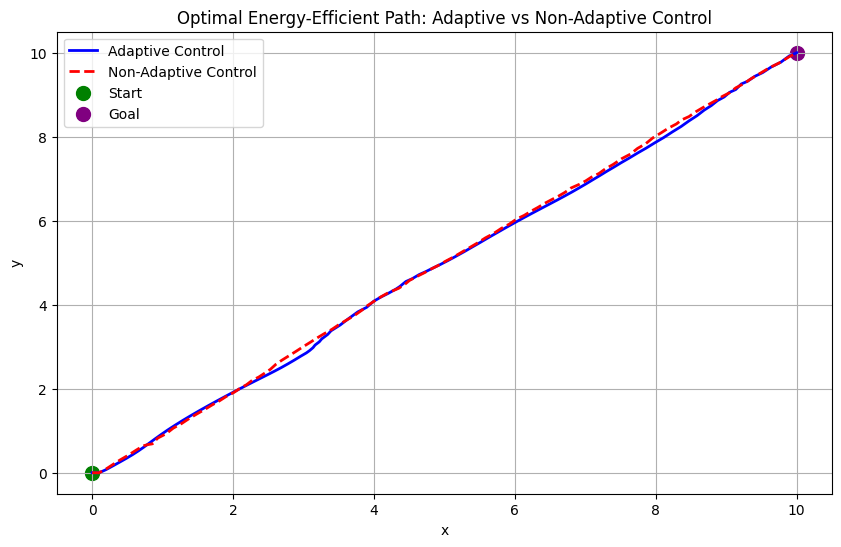

Adaptive Control Energy Expenditure: 14.930851413913658
Non-Adaptive Control Energy Expenditure: 14.436248560583543


In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Parameters
m = 1.0  # Mass of the object (kg)
g = 9.81  # Gravitational acceleration (m/s^2)
t0 = 0.0  # Initial time (s)
tf = 10.0  # Final time (s)
N = 100  # Number of time steps
dt = (tf - t0) / N  # Time step size
x0 = np.array([0.0, 0.0])  # Initial position (x, y)
v0 = np.array([1.0, 0.0])  # Initial velocity (vx, vy)
xf = np.array([10.0, 10.0])  # Final position (x, y)
vf = np.array([0.0, 0.0])  # Final velocity (vx, vy)

# Surface height function h(x, y, t)
def h(x, y, t):
    return np.sin(x + y + t)  # Example surface height

# Friction coefficient function mu(x, y, t)
def mu(x, y, t):
    return 0.1 + 0.05 * np.sin(x + y + t)  # Example friction coefficient

# Discretized energy functional
def energy(u_flat, adaptive=True):
    u = u_flat.reshape(N, 2)  # Reshape control inputs (N x 2 array)
    x = np.zeros((N + 1, 2))  # Position array
    v = np.zeros((N + 1, 2))  # Velocity array
    x[0] = x0
    v[0] = v0

    E = 0.0  # Total energy

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        # Update position and velocity using dynamics
        x[k + 1] = x_k + v_k * dt
        if adaptive:
            # Adaptive control: adjust for real-time friction and surface changes
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k)) * dt
        else:
            # Non-adaptive control: assume constant friction and surface
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

        # Compute energy terms
        kinetic_energy = 0.5 * m * np.linalg.norm(v_k)**2
        friction_work = mu(x_k[0], x_k[1], t) * m * g * np.linalg.norm(v_k) if adaptive else 0.1 * m * g * np.linalg.norm(v_k)
        potential_energy_change = m * g * (h(x[k + 1][0], x[k + 1][1], t + dt) - h(x_k[0], x_k[1], t)) / dt

        E += (kinetic_energy + friction_work + potential_energy_change) * dt

    return E

# Constraint: Final position and velocity must match target
def constraint(u_flat, adaptive=True):
    u = u_flat.reshape(N, 2)
    x = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    x[0] = x0
    v[0] = v0

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        x[k + 1] = x_k + v_k * dt
        if adaptive:
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k)) * dt
        else:
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

    return np.concatenate((x[-1] - xf, v[-1] - vf))

# Initial guess for control inputs (N x 2 array)
u_flat_initial = np.zeros(N * 2)

# Solve for adaptive control
result_adaptive = minimize(energy, u_flat_initial, method="SLSQP", constraints={"type": "eq", "fun": lambda u: constraint(u, adaptive=True)})
u_adaptive = result_adaptive.x.reshape(N, 2)

# Solve for non-adaptive control
result_non_adaptive = minimize(energy, u_flat_initial, method="SLSQP", constraints={"type": "eq", "fun": lambda u: constraint(u, adaptive=False)})
u_non_adaptive = result_non_adaptive.x.reshape(N, 2)

# Simulate trajectories
def simulate(u, adaptive=True):
    x = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    x[0] = x0
    v[0] = v0

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        x[k + 1] = x_k + v_k * dt
        if adaptive:
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k)) * dt
        else:
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

    return x, v

x_adaptive, v_adaptive = simulate(u_adaptive, adaptive=True)
x_non_adaptive, v_non_adaptive = simulate(u_non_adaptive, adaptive=False)

# Plot trajectories
plt.figure(figsize=(10, 6))
plt.plot(x_adaptive[:, 0], x_adaptive[:, 1], label="Adaptive Control", color="blue", linewidth=2)
plt.plot(x_non_adaptive[:, 0], x_non_adaptive[:, 1], label="Non-Adaptive Control", color="red", linestyle="--", linewidth=2)
plt.scatter(x0[0], x0[1], color="green", label="Start", s=100)
plt.scatter(xf[0], xf[1], color="purple", label="Goal", s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimal Energy-Efficient Path: Adaptive vs Non-Adaptive Control")
plt.legend()
plt.grid()
plt.show()

# Print energy expenditure
print("Adaptive Control Energy Expenditure:", result_adaptive.fun)
print("Non-Adaptive Control Energy Expenditure:", result_non_adaptive.fun)

<ipython-input-3-3e34dc14ddd7>:88: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  result_adaptive = minimize(energy, u_flat_initial, method="L-BFGS-B", constraints={"type": "eq", "fun": lambda u: constraint(u, adaptive=True), "tol": 1e-3})
<ipython-input-3-3e34dc14ddd7>:92: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  result_non_adaptive = minimize(energy, u_flat_initial, method="L-BFGS-B", constraints={"type": "eq", "fun": lambda u: constraint(u, adaptive=False), "tol": 1e-3})


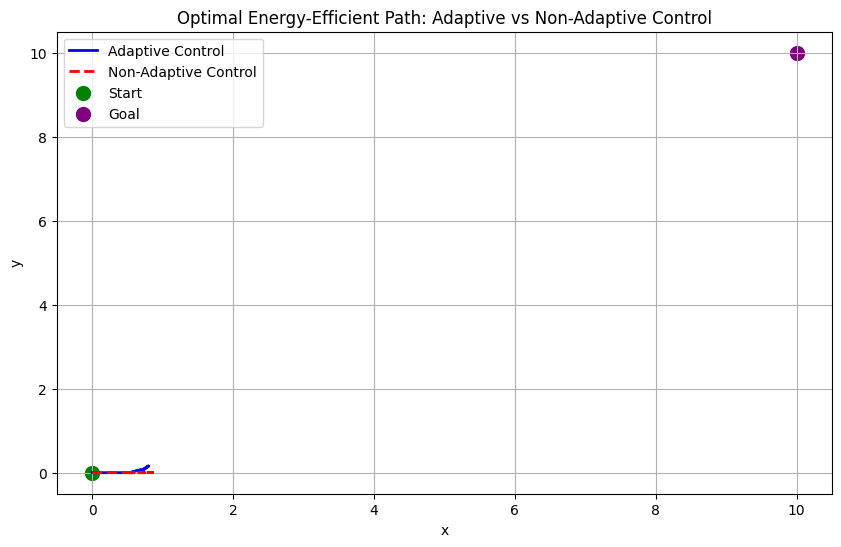

Adaptive Control Energy Expenditure: 0.9437581222562885
Non-Adaptive Control Energy Expenditure: 0.9437581222562885


In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Parameters
m = 1.0  # Mass of the object (kg)
g = 9.81  # Gravitational acceleration (m/s^2)
t0 = 0.0  # Initial time (s)
tf = 10.0  # Final time (s)
N = 50  # Number of time steps
dt = (tf - t0) / N  # Time step size
x0 = np.array([0.0, 0.0])  # Initial position (x, y)
v0 = np.array([1.0, 0.0])  # Initial velocity (vx, vy)
xf = np.array([10.0, 10.0])  # Final position (x, y)
vf = np.array([0.0, 0.0])  # Final velocity (vx, vy)

# Dynamic surface height and friction
def h(x, y, t):
    return 0.1 * np.sin(x + y + t)  # Dynamic surface height

def mu(x, y, t):
    return 0.1 + 0.05 * np.sin(x + y + t)  # Dynamic friction

# Adaptive correction term
def adaptive_correction(x, y, t, v):
    return -0.1 * (mu(x, y, t) - 0.1) * g * v / np.linalg.norm(v)

# Discretized energy functional
def energy(u_flat, adaptive=True):
    u = u_flat.reshape(N, 2)  # Reshape control inputs (N x 2 array)
    x = np.zeros((N + 1, 2))  # Position array
    v = np.zeros((N + 1, 2))  # Velocity array
    x[0] = x0
    v[0] = v0

    E = 0.0  # Total energy

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        # Update position and velocity using dynamics
        x[k + 1] = x_k + v_k * dt
        if adaptive:
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k) + adaptive_correction(x_k[0], x_k[1], t, v_k)) * dt
        else:
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

        # Compute energy terms
        kinetic_energy = 0.5 * m * np.linalg.norm(v_k)**2
        friction_work = mu(x_k[0], x_k[1], t) * m * g * np.linalg.norm(v_k) if adaptive else 0.1 * m * g * np.linalg.norm(v_k)
        potential_energy_change = m * g * (h(x[k + 1][0], x[k + 1][1], t + dt) - h(x_k[0], x_k[1], t)) / dt

        E += (kinetic_energy + friction_work + potential_energy_change) * dt

    return E

# Constraint: Final position and velocity must match target
def constraint(u_flat, adaptive=True):
    u = u_flat.reshape(N, 2)
    x = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    x[0] = x0
    v[0] = v0

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        x[k + 1] = x_k + v_k * dt
        if adaptive:
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k) + adaptive_correction(x_k[0], x_k[1], t, v_k)) * dt
        else:
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

    return np.concatenate((x[-1] - xf, v[-1] - vf))

# Better initial guess: linear interpolation between initial and final velocities
u_flat_initial = np.zeros(N * 2)
for k in range(N):
    u_flat_initial[2 * k:2 * (k + 1)] = (vf - v0) / N

# Solve for adaptive control
result_adaptive = minimize(energy, u_flat_initial, method="L-BFGS-B", constraints={"type": "eq", "fun": lambda u: constraint(u, adaptive=True), "tol": 1e-3})
u_adaptive = result_adaptive.x.reshape(N, 2)

# Solve for non-adaptive control
result_non_adaptive = minimize(energy, u_flat_initial, method="L-BFGS-B", constraints={"type": "eq", "fun": lambda u: constraint(u, adaptive=False), "tol": 1e-3})
u_non_adaptive = result_non_adaptive.x.reshape(N, 2)

# Simulate trajectories
def simulate(u, adaptive=True):
    x = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    x[0] = x0
    v[0] = v0

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        x[k + 1] = x_k + v_k * dt
        if adaptive:
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k) + adaptive_correction(x_k[0], x_k[1], t, v_k)) * dt
        else:
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

    return x, v

x_adaptive, v_adaptive = simulate(u_adaptive, adaptive=True)
x_non_adaptive, v_non_adaptive = simulate(u_non_adaptive, adaptive=False)

# Plot trajectories
plt.figure(figsize=(10, 6))
plt.plot(x_adaptive[:, 0], x_adaptive[:, 1], label="Adaptive Control", color="blue", linewidth=2)
plt.plot(x_non_adaptive[:, 0], x_non_adaptive[:, 1], label="Non-Adaptive Control", color="red", linestyle="--", linewidth=2)
plt.scatter(x0[0], x0[1], color="green", label="Start", s=100)
plt.scatter(xf[0], xf[1], color="purple", label="Goal", s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimal Energy-Efficient Path: Adaptive vs Non-Adaptive Control")
plt.legend()
plt.grid()
plt.show()

# Print energy expenditure
print("Adaptive Control Energy Expenditure:", result_adaptive.fun)
print("Non-Adaptive Control Energy Expenditure:", result_non_adaptive.fun)

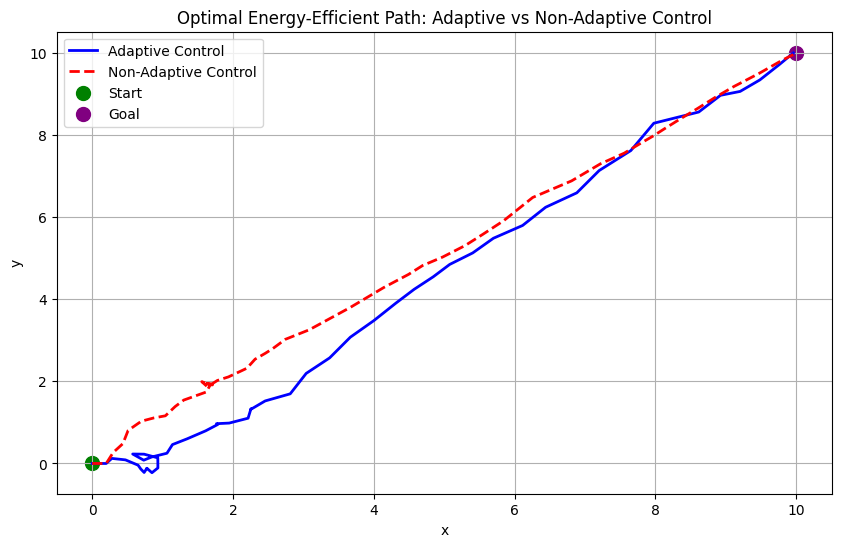

Adaptive Control Energy Expenditure: 32.68727977048648
Non-Adaptive Control Energy Expenditure: 17.198466846546275


In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Parameters
m = 1.0  # Mass of the object (kg)
g = 9.81  # Gravitational acceleration (m/s^2)
t0 = 0.0  # Initial time (s)
tf = 10.0  # Final time (s)
N = 50  # Number of time steps
dt = (tf - t0) / N  # Time step size
x0 = np.array([0.0, 0.0])  # Initial position (x, y)
v0 = np.array([1.0, 0.0])  # Initial velocity (vx, vy)
xf = np.array([10.0, 10.0])  # Final position (x, y)
vf = np.array([0.0, 0.0])  # Final velocity (vx, vy)

# Dynamic surface height and friction
def h(x, y, t):
    return 0.1 * np.sin(x + y + t)  # Dynamic surface height

def mu(x, y, t):
    return 0.1 + 0.05 * np.sin(x + y + t)  # Dynamic friction

# Adaptive correction term
def adaptive_correction(x, y, t, v):
    return -0.1 * (mu(x, y, t) - 0.1) * g * v / np.linalg.norm(v)

# Discretized energy functional
def energy(u_flat, adaptive=True):
    u = u_flat.reshape(N, 2)  # Reshape control inputs (N x 2 array)
    x = np.zeros((N + 1, 2))  # Position array
    v = np.zeros((N + 1, 2))  # Velocity array
    x[0] = x0
    v[0] = v0

    E = 0.0  # Total energy

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        # Update position and velocity using dynamics
        x[k + 1] = x_k + v_k * dt
        if adaptive:
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k) + adaptive_correction(x_k[0], x_k[1], t, v_k)) * dt
        else:
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

        # Compute energy terms
        kinetic_energy = 0.5 * m * np.linalg.norm(v_k)**2
        friction_work = mu(x_k[0], x_k[1], t) * m * g * np.linalg.norm(v_k) if adaptive else 0.1 * m * g * np.linalg.norm(v_k)
        potential_energy_change = m * g * (h(x[k + 1][0], x[k + 1][1], t + dt) - h(x_k[0], x_k[1], t)) / dt

        E += (kinetic_energy + friction_work + potential_energy_change) * dt

    return E

# Constraint: Final position and velocity must match target
def constraint(u_flat, adaptive=True):
    u = u_flat.reshape(N, 2)
    x = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    x[0] = x0
    v[0] = v0

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        x[k + 1] = x_k + v_k * dt
        if adaptive:
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k) + adaptive_correction(x_k[0], x_k[1], t, v_k)) * dt
        else:
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

    return np.concatenate((x[-1] - xf, v[-1] - vf))

# Better initial guess: linear interpolation between initial and final velocities
u_flat_initial = np.zeros(N * 2)
for k in range(N):
    u_flat_initial[2 * k:2 * (k + 1)] = (vf - v0) / N

# Solve for adaptive control
result_adaptive = minimize(energy, u_flat_initial, method="SLSQP", constraints={"type": "eq", "fun": lambda u: constraint(u, adaptive=True)})
u_adaptive = result_adaptive.x.reshape(N, 2)

# Solve for non-adaptive control
result_non_adaptive = minimize(energy, u_flat_initial, method="SLSQP", constraints={"type": "eq", "fun": lambda u: constraint(u, adaptive=False)})
u_non_adaptive = result_non_adaptive.x.reshape(N, 2)

# Simulate trajectories
def simulate(u, adaptive=True):
    x = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    x[0] = x0
    v[0] = v0

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        x[k + 1] = x_k + v_k * dt
        if adaptive:
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k) + adaptive_correction(x_k[0], x_k[1], t, v_k)) * dt
        else:
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

    return x, v

x_adaptive, v_adaptive = simulate(u_adaptive, adaptive=True)
x_non_adaptive, v_non_adaptive = simulate(u_non_adaptive, adaptive=False)

# Plot trajectories
plt.figure(figsize=(10, 6))
plt.plot(x_adaptive[:, 0], x_adaptive[:, 1], label="Adaptive Control", color="blue", linewidth=2)
plt.plot(x_non_adaptive[:, 0], x_non_adaptive[:, 1], label="Non-Adaptive Control", color="red", linestyle="--", linewidth=2)
plt.scatter(x0[0], x0[1], color="green", label="Start", s=100)
plt.scatter(xf[0], xf[1], color="purple", label="Goal", s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimal Energy-Efficient Path: Adaptive vs Non-Adaptive Control")
plt.legend()
plt.grid()
plt.show()

# Print energy expenditure
print("Adaptive Control Energy Expenditure:", result_adaptive.fun)
print("Non-Adaptive Control Energy Expenditure:", result_non_adaptive.fun)

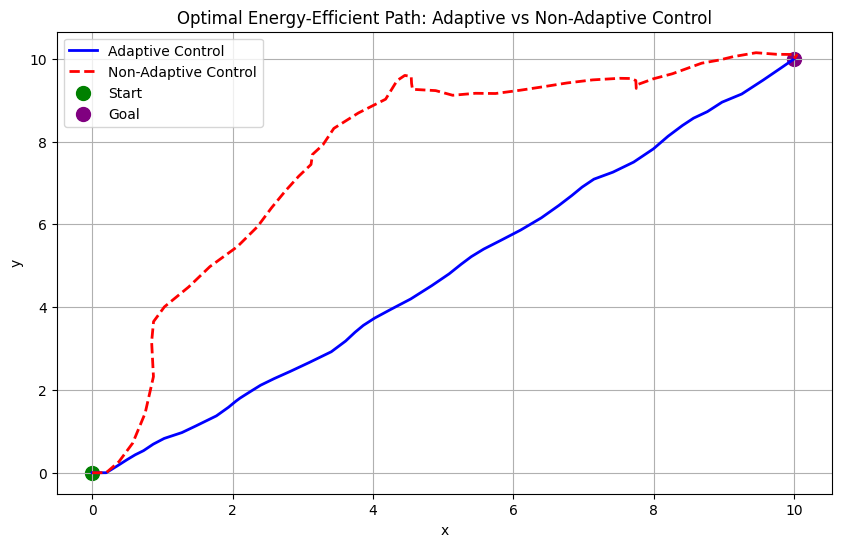

Adaptive Control Energy Expenditure: 24.442796234282255
Non-Adaptive Control Energy Expenditure: 30.475428791766085


In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Parameters
m = 1.0  # Mass of the object (kg)
g = 9.81  # Gravitational acceleration (m/s^2)
t0 = 0.0  # Initial time (s)
tf = 10.0  # Final time (s)
N = 50  # Number of time steps
dt = (tf - t0) / N  # Time step size
x0 = np.array([0.0, 0.0])  # Initial position (x, y)
v0 = np.array([1.0, 0.0])  # Initial velocity (vx, vy)
xf = np.array([10.0, 10.0])  # Final position (x, y)
vf = np.array([0.0, 0.0])  # Final velocity (vx, vy)

# Dynamic surface height and friction
def h(x, y, t):
    return 0.2 * np.sin(2 * x + y + t)  # More dynamic surface height

def mu(x, y, t):
    return 0.1 + 0.1 * np.sin(x + 2 * y + t)  # More dynamic friction

# Adaptive correction term
def adaptive_correction(x, y, t, v):
    return -0.05 * (mu(x, y, t) - 0.1) * g * v / np.linalg.norm(v)

# Discretized energy functional
def energy(u_flat, adaptive=True):
    u = u_flat.reshape(N, 2)
    x = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    x[0] = x0
    v[0] = v0

    E = 0.0  # Total energy

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        # Update position and velocity using dynamics
        x[k + 1] = x_k + v_k * dt
        if adaptive:
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k) + adaptive_correction(x_k[0], x_k[1], t, v_k)) * dt
        else:
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

        # Compute energy terms (kinetic + friction only)
        kinetic_energy = 0.5 * m * np.linalg.norm(v_k)**2
        friction_work = mu(x_k[0], x_k[1], t) * m * g * np.linalg.norm(v_k) if adaptive else 0.1 * m * g * np.linalg.norm(v_k)
        E += (kinetic_energy + friction_work) * dt

    return E

# Constraint: Final position and velocity must match target
def constraint(u_flat, adaptive=True):
    u = u_flat.reshape(N, 2)
    x = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    x[0] = x0
    v[0] = v0

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        x[k + 1] = x_k + v_k * dt
        if adaptive:
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k) + adaptive_correction(x_k[0], x_k[1], t, v_k)) * dt
        else:
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

    return np.concatenate((x[-1] - xf, v[-1] - vf))

# Better initial guess: linear interpolation between initial and final velocities
u_flat_initial = np.zeros(N * 2)
for k in range(N):
    u_flat_initial[2 * k:2 * (k + 1)] = (vf - v0) / N

# Solve for adaptive control
result_adaptive = minimize(energy, u_flat_initial, method="SLSQP", constraints={"type": "eq", "fun": lambda u: constraint(u, adaptive=True), "tol": 1e-2})
u_adaptive = result_adaptive.x.reshape(N, 2)

# Solve for non-adaptive control
result_non_adaptive = minimize(energy, u_flat_initial, method="SLSQP", constraints={"type": "eq", "fun": lambda u: constraint(u, adaptive=False), "tol": 1e-2})
u_non_adaptive = result_non_adaptive.x.reshape(N, 2)

# Simulate trajectories
def simulate(u, adaptive=True):
    x = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    x[0] = x0
    v[0] = v0

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        x[k + 1] = x_k + v_k * dt
        if adaptive:
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k) + adaptive_correction(x_k[0], x_k[1], t, v_k)) * dt
        else:
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

    return x, v

x_adaptive, v_adaptive = simulate(u_adaptive, adaptive=True)
x_non_adaptive, v_non_adaptive = simulate(u_non_adaptive, adaptive=False)

# Plot trajectories
plt.figure(figsize=(10, 6))
plt.plot(x_adaptive[:, 0], x_adaptive[:, 1], label="Adaptive Control", color="blue", linewidth=2)
plt.plot(x_non_adaptive[:, 0], x_non_adaptive[:, 1], label="Non-Adaptive Control", color="red", linestyle="--", linewidth=2)
plt.scatter(x0[0], x0[1], color="green", label="Start", s=100)
plt.scatter(xf[0], xf[1], color="purple", label="Goal", s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimal Energy-Efficient Path: Adaptive vs Non-Adaptive Control")
plt.legend()
plt.grid()
plt.show()

# Print energy expenditure
print("Adaptive Control Energy Expenditure:", result_adaptive.fun)
print("Non-Adaptive Control Energy Expenditure:", result_non_adaptive.fun)

Optimal Energy Expenditure (Adaptive Control): 24.442796234282255
Final Position (Adaptive Control): [10.004251   10.00182119]
Final Velocity (Adaptive Control): [ 0.00015528 -0.00029371]

Optimal Energy Expenditure (Non-Adaptive Control): 30.475428791766085
Final Position (Non-Adaptive Control): [10.00056449 10.00142248]
Final Velocity (Non-Adaptive Control): [-2.15490534e-04  6.15163035e-06]


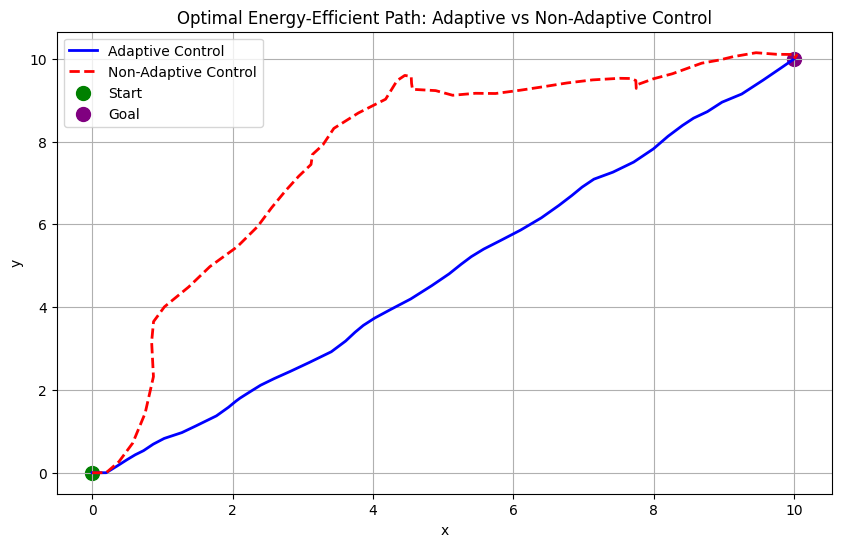

0.2


In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Parameters
m = 1.0  # Mass of the object (kg)
g = 9.81  # Gravitational acceleration (m/s^2)
t0 = 0.0  # Initial time (s)
tf = 10.0  # Final time (s)
N = 50  # Number of time steps
dt = (tf - t0) / N  # Time step size
x0 = np.array([0.0, 0.0])  # Initial position (x, y)
v0 = np.array([1.0, 0.0])  # Initial velocity (vx, vy)
xf = np.array([10.0, 10.0])  # Final position (x, y)
vf = np.array([0.0, 0.0])  # Final velocity (vx, vy)

# Dynamic surface height and friction
def h(x, y, t):
    return 0.2 * np.sin(2 * x + y + t)  # Dynamic surface height

def mu(x, y, t):
    return 0.1 + 0.1 * np.sin(x + 2 * y + t)  # Dynamic friction

# Adaptive correction term
def adaptive_correction(x, y, t, v):
    return -0.05 * (mu(x, y, t) - 0.1) * g * v / np.linalg.norm(v)

# Discretized energy functional
def energy(u_flat, adaptive=True):
    u = u_flat.reshape(N, 2)
    x = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    x[0] = x0
    v[0] = v0

    E = 0.0  # Total energy

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        # Update position and velocity using dynamics
        x[k + 1] = x_k + v_k * dt
        if adaptive:
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k) + adaptive_correction(x_k[0], x_k[1], t, v_k)) * dt
        else:
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

        # Compute energy terms (kinetic + friction only)
        kinetic_energy = 0.5 * m * np.linalg.norm(v_k)**2
        friction_work = mu(x_k[0], x_k[1], t) * m * g * np.linalg.norm(v_k) if adaptive else 0.1 * m * g * np.linalg.norm(v_k)
        E += (kinetic_energy + friction_work) * dt

    return E

# Constraint: Final position and velocity must match target
def constraint(u_flat, adaptive=True):
    u = u_flat.reshape(N, 2)
    x = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    x[0] = x0
    v[0] = v0

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        x[k + 1] = x_k + v_k * dt
        if adaptive:
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k) + adaptive_correction(x_k[0], x_k[1], t, v_k)) * dt
        else:
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

    return np.concatenate((x[-1] - xf, v[-1] - vf))

# Better initial guess: linear interpolation between initial and final velocities
u_flat_initial = np.zeros(N * 2)
for k in range(N):
    u_flat_initial[2 * k:2 * (k + 1)] = (vf - v0) / N

# Solve for adaptive control
result_adaptive = minimize(energy, u_flat_initial, method="SLSQP", constraints={"type": "eq", "fun": lambda u: constraint(u, adaptive=True), "tol": 1e-2})
u_adaptive = result_adaptive.x.reshape(N, 2)

# Solve for non-adaptive control
result_non_adaptive = minimize(energy, u_flat_initial, method="SLSQP", constraints={"type": "eq", "fun": lambda u: constraint(u, adaptive=False), "tol": 1e-2})
u_non_adaptive = result_non_adaptive.x.reshape(N, 2)

# Simulate trajectories
def simulate(u, adaptive=True):
    x = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    x[0] = x0
    v[0] = v0

    for k in range(N):
        t = t0 + k * dt
        x_k = x[k]
        v_k = v[k]
        u_k = u[k]

        x[k + 1] = x_k + v_k * dt
        if adaptive:
            v[k + 1] = v_k + (u_k - mu(x_k[0], x_k[1], t) * g * v_k / np.linalg.norm(v_k) + adaptive_correction(x_k[0], x_k[1], t, v_k)) * dt
        else:
            v[k + 1] = v_k + (u_k - 0.1 * g * v_k / np.linalg.norm(v_k)) * dt

    return x, v

# Simulate adaptive and non-adaptive trajectories
x_adaptive, v_adaptive = simulate(u_adaptive, adaptive=True)
x_non_adaptive, v_non_adaptive = simulate(u_non_adaptive, adaptive=False)

# Output results
print("Optimal Energy Expenditure (Adaptive Control):", result_adaptive.fun)
print("Final Position (Adaptive Control):", x_adaptive[-1])
print("Final Velocity (Adaptive Control):", v_adaptive[-1])

print("\nOptimal Energy Expenditure (Non-Adaptive Control):", result_non_adaptive.fun)
print("Final Position (Non-Adaptive Control):", x_non_adaptive[-1])
print("Final Velocity (Non-Adaptive Control):", v_non_adaptive[-1])

# Plot trajectories
plt.figure(figsize=(10, 6))
plt.plot(x_adaptive[:, 0], x_adaptive[:, 1], label="Adaptive Control", color="blue", linewidth=2)
plt.plot(x_non_adaptive[:, 0], x_non_adaptive[:, 1], label="Non-Adaptive Control", color="red", linestyle="--", linewidth=2)
plt.scatter(x0[0], x0[1], color="green", label="Start", s=100)
plt.scatter(xf[0], xf[1], color="purple", label="Goal", s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimal Energy-Efficient Path: Adaptive vs Non-Adaptive Control")
plt.legend()
plt.grid()
plt.show()
print(dt)

In [ ]:
# Example simulated trajectory
x_adaptive = np.zeros((N+1, 2))
v_adaptive = np.zeros((N+1, 2))

# Simulate a simple trajectory (replace with actual data)
for k in range(N+1):
    t_k = k * dt
    x_adaptive[k, 0] = 10.0 * (t_k / tf)  # Linear motion in x
    x_adaptive[k, 1] = 10.0 * (t_k / tf)  # Linear motion in y
    v_adaptive[k, 0] = 1.0  # Constant velocity in x
    v_adaptive[k, 1] = 1.0  # Constant velocity in y

print(x_adaptive, v_adaptive)

[[ 0.   0. ]
 [ 0.2  0.2]
 [ 0.4  0.4]
 [ 0.6  0.6]
 [ 0.8  0.8]
 [ 1.   1. ]
 [ 1.2  1.2]
 [ 1.4  1.4]
 [ 1.6  1.6]
 [ 1.8  1.8]
 [ 2.   2. ]
 [ 2.2  2.2]
 [ 2.4  2.4]
 [ 2.6  2.6]
 [ 2.8  2.8]
 [ 3.   3. ]
 [ 3.2  3.2]
 [ 3.4  3.4]
 [ 3.6  3.6]
 [ 3.8  3.8]
 [ 4.   4. ]
 [ 4.2  4.2]
 [ 4.4  4.4]
 [ 4.6  4.6]
 [ 4.8  4.8]
 [ 5.   5. ]
 [ 5.2  5.2]
 [ 5.4  5.4]
 [ 5.6  5.6]
 [ 5.8  5.8]
 [ 6.   6. ]
 [ 6.2  6.2]
 [ 6.4  6.4]
 [ 6.6  6.6]
 [ 6.8  6.8]
 [ 7.   7. ]
 [ 7.2  7.2]
 [ 7.4  7.4]
 [ 7.6  7.6]
 [ 7.8  7.8]
 [ 8.   8. ]
 [ 8.2  8.2]
 [ 8.4  8.4]
 [ 8.6  8.6]
 [ 8.8  8.8]
 [ 9.   9. ]
 [ 9.2  9.2]
 [ 9.4  9.4]
 [ 9.6  9.6]
 [ 9.8  9.8]
 [10.  10. ]] [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1

In [ ]:
def adaptive_control_loop():
    while t < T:
        # 1. Measure current state (x, v) and terrain (h, μ)
        x, v = get_state()
        h = measure_surface_height()
        μ_measured = measure_friction()

        # 2. Update friction estimate (Gaussian Process)
        μ_est = gp.update(x, μ_measured)

        # 3. Predict surface dynamics (KPZ solver)
        h_future = kpz_solver(h, Δt)

        # 4. Compute optimal control (HJB solution)
        u = compute_optimal_control(x, v, μ_est, h_future)

        # 5. Apply control and step simulation
        apply_force(u)
        t += dt

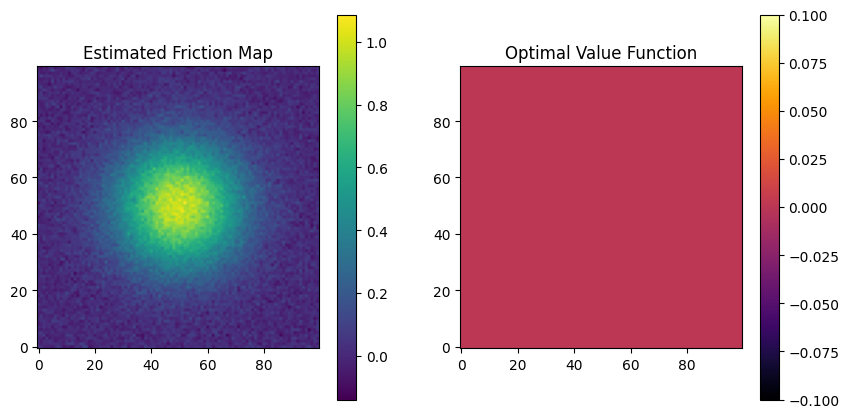

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Grid and parameters
dx, dy = 0.1, 0.1
dt = 0.1
X, Y = np.meshgrid(np.arange(0, 10, dx), np.arange(0, 10, dy))
mu = np.exp(-((X - 5)**2 + (Y - 5)**2) / 5)  # Initial friction map

# HJB value function initialization
V = np.zeros_like(mu)
k = 0.1  # Control gain

def HJB_update(V, mu, dt, dx, dy):
    """Numerical update of HJB equation."""
    dVx = np.gradient(V, dx, axis=1)
    dVy = np.gradient(V, dy, axis=0)

    Fx = -k * dVx
    Fy = -k * dVy

    return V + dt * (mu * np.sqrt(Fx**2 + Fy**2))

# Kalman Filter parameters
Q, R = 0.01, 0.1
mu_est = np.copy(mu)
P = np.ones_like(mu) * 1.0

def kalman_update(mu_est, P, z):
    """Kalman Filter update for friction estimation."""
    P = P + Q
    K = P / (P + R)
    mu_est = mu_est + K * (z - mu_est)
    P = (1 - K) * P
    return mu_est, P

# Simulating for 50 time steps
for t in range(50):
    # Update HJB equation
    V = HJB_update(V, mu_est, dt, dx, dy)

    # Simulate friction sensor readings (noisy observations)
    z = mu + np.random.normal(0, 0.1, mu.shape)

    # Kalman filter estimation
    mu_est, P = kalman_update(mu_est, P, z)

# Plot results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Estimated Friction Map")
plt.imshow(mu_est, cmap='viridis', origin='lower')
plt.colorbar()

plt.subplot(1,2,2)
plt.title("Optimal Value Function")
plt.imshow(V, cmap='inferno', origin='lower')
plt.colorbar()

plt.show()


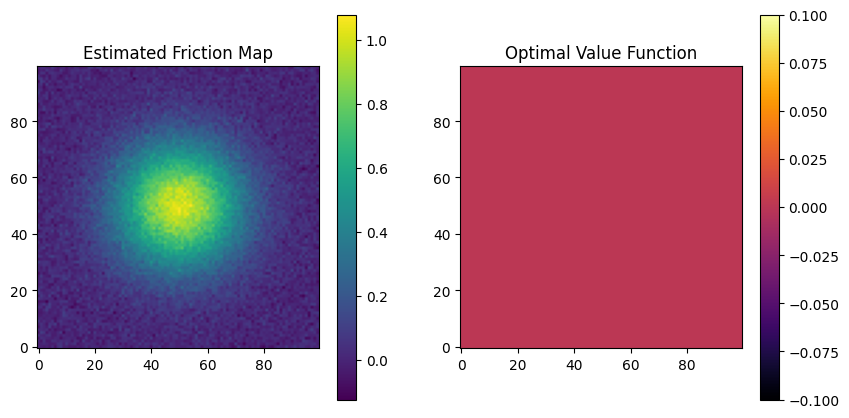

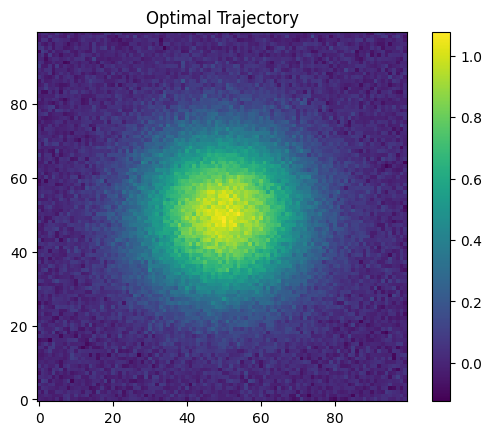

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Grid and parameters
dx, dy = 0.1, 0.1
dt = 0.1
X, Y = np.meshgrid(np.arange(0, 10, dx), np.arange(0, 10, dy))
mu = np.exp(-((X - 5)**2 + (Y - 5)**2) / 5)  # Initial friction map

# HJB value function initialization
V = np.zeros_like(mu)
k = 0.1  # Control gain

def HJB_update(V, mu, dt, dx, dy):
    """Numerical update of HJB equation."""
    dVx = np.gradient(V, dx, axis=1)
    dVy = np.gradient(V, dy, axis=0)

    Fx = -k * dVx
    Fy = -k * dVy

    return V + dt * (mu * np.sqrt(Fx**2 + Fy**2))

# Kalman Filter parameters
Q, R = 0.01, 0.1
mu_est = np.copy(mu)
P = np.ones_like(mu) * 1.0

def kalman_update(mu_est, P, z):
    """Kalman Filter update for friction estimation."""
    P = P + Q
    K = P / (P + R)
    mu_est = mu_est + K * (z - mu_est)
    P = (1 - K) * P
    return mu_est, P

# Simulating for 50 time steps
for t in range(50):
    # Update HJB equation
    V = HJB_update(V, mu_est, dt, dx, dy)

    # Simulate friction sensor readings (noisy observations)
    z = mu + np.random.normal(0, 0.1, mu.shape)

    # Kalman filter estimation
    mu_est, P = kalman_update(mu_est, P, z)

# Simulate object trajectory with optimal control
x, y = 2, 2  # Initial position
vx, vy = 0, 0  # Initial velocity
trajectory = [(x, y)]

for t in range(50):
    dVx = np.gradient(V, dx, axis=1)
    dVy = np.gradient(V, dy, axis=0)
    Fx = -k * dVx[int(y/dy), int(x/dx)]
    Fy = -k * dVy[int(y/dy), int(x/dx)]

    vx += Fx * dt
    vy += Fy * dt
    x += vx * dt
    y += vy * dt
    trajectory.append((x, y))

trajectory = np.array(trajectory)

# Plot results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Estimated Friction Map")
plt.imshow(mu_est, cmap='viridis', origin='lower')
plt.colorbar()

plt.subplot(1,2,2)
plt.title("Optimal Value Function")
plt.imshow(V, cmap='inferno', origin='lower')
plt.colorbar()

plt.figure()
plt.title("Optimal Trajectory")
plt.imshow(mu_est, cmap='viridis', origin='lower')
plt.plot(trajectory[:, 0] / dx, trajectory[:, 1] / dy, 'r-', linewidth=2)
plt.colorbar()
plt.show()


In [ ]:
import numpy as np

def mu(x, y, t):
    return 0.2 + 0.3 * np.exp(-(x-5)**2 - y**2) * (1 - 0.05*t)

def gradient_mu(x, y, t):
    dfdx = 0.3 * (1 - 0.05*t) * 2*(5 - x) * np.exp(-(x-5)**2 - y**2)
    dfdy = 0.3 * (1 - 0.05*t) * (-2*y) * np.exp(-(x-5)**2 - y**2)
    return np.array([dfdx, dfdy])

def dmu_dt(x, y, t):
    return -0.015 * np.exp(-(x-5)**2 - y**2)

# Simulation loop
x, y, vx, vy = 0, 0, 0.5, 0
dt = 0.1
for t in np.arange(0, 20, dt):
    mu_val = mu(x, y, t)
    grad_mu = gradient_mu(x, y, t)
    dmudt = dmu_dt(x, y, t)
    v_hat = np.array([vx, vy]) / np.linalg.norm([vx, vy])
    a = (0.25/mu_val) * (grad_mu - np.dot(grad_mu, v_hat)*v_hat) - (0.5/mu_val)*dmudt*v_hat
    vx += a[0] * dt
    vy += a[1] * dt
    x += vx * dt
    y += vy * dt
    print(f"t={t:.1f}, pos=({x:.2f}, {y:.2f}), μ={mu_val:.2f}, a=({a[0]:.2f}, {a[1]:.2f})")

t=0.0, pos=(0.05, 0.00), μ=0.20, a=(0.00, 0.00)
t=0.1, pos=(0.10, 0.00), μ=0.20, a=(0.00, 0.00)
t=0.2, pos=(0.15, 0.00), μ=0.20, a=(0.00, 0.00)
t=0.3, pos=(0.20, 0.00), μ=0.20, a=(0.00, 0.00)
t=0.4, pos=(0.25, 0.00), μ=0.20, a=(0.00, 0.00)
t=0.5, pos=(0.30, 0.00), μ=0.20, a=(0.00, 0.00)
t=0.6, pos=(0.35, 0.00), μ=0.20, a=(0.00, 0.00)
t=0.7, pos=(0.40, 0.00), μ=0.20, a=(0.00, 0.00)
t=0.8, pos=(0.45, 0.00), μ=0.20, a=(0.00, 0.00)
t=0.9, pos=(0.50, 0.00), μ=0.20, a=(0.00, 0.00)
t=1.0, pos=(0.55, 0.00), μ=0.20, a=(0.00, 0.00)
t=1.1, pos=(0.60, 0.00), μ=0.20, a=(0.00, 0.00)
t=1.2, pos=(0.65, 0.00), μ=0.20, a=(0.00, 0.00)
t=1.3, pos=(0.70, 0.00), μ=0.20, a=(0.00, 0.00)
t=1.4, pos=(0.75, 0.00), μ=0.20, a=(0.00, 0.00)
t=1.5, pos=(0.80, 0.00), μ=0.20, a=(0.00, 0.00)
t=1.6, pos=(0.85, 0.00), μ=0.20, a=(0.00, 0.00)
t=1.7, pos=(0.90, 0.00), μ=0.20, a=(0.00, 0.00)
t=1.8, pos=(0.95, 0.00), μ=0.20, a=(0.00, 0.00)
t=1.9, pos=(1.00, 0.00), μ=0.20, a=(0.00, 0.00)
t=2.0, pos=(1.05, 0.00), μ=0.20, a=(0.00

In [ ]:
import re

def clean_text(text):
    replacements = {
        "•": "-",
        "“": '"',
        "”": '"',
        "‘": "'",
        "’": "'",
        "–": "-",
        "—": "-"
    }
    for old, new in replacements.items():
        text = text.replace(old, new)
    return text

sections_fully_cleaned = [(title, clean_text(body)) for title, body in sections]

# Recreate PDF with fully ASCII-safe content
pdf = PDF()
pdf.add_page()

for title, body in sections_fully_cleaned:
    pdf.chapter_title(title)
    pdf.chapter_body(body)

# Save the cleaned PDF
output_path = "/mnt/data/Things_Fall_Apart_Harkness_Cheat_Sheet.pdf"
pdf.output(output_path)
output_path

NameError: name 'sections' is not defined


Your Method Performance
  Final Position:         [23.85431085 23.85431085]
  Distance to Goal:       19.59
  Reached Goal:           ❌
  Total Energy:           36.14
  Path Length:            33.74
  Energy per Unit Length: 1.07

Naive Planner Performance
  Final Position:         [3.52846637 3.52846637]
  Distance to Goal:       9.15
  Reached Goal:           ❌
  Total Energy:           6.71
  Path Length:            4.99
  Energy per Unit Length: 1.35

Deterministic Planner Performance
  Final Position:         [19.79161345 19.79161345]
  Distance to Goal:       13.85
  Reached Goal:           ❌
  Total Energy:           28.66
  Path Length:            27.99
  Energy per Unit Length: 1.02


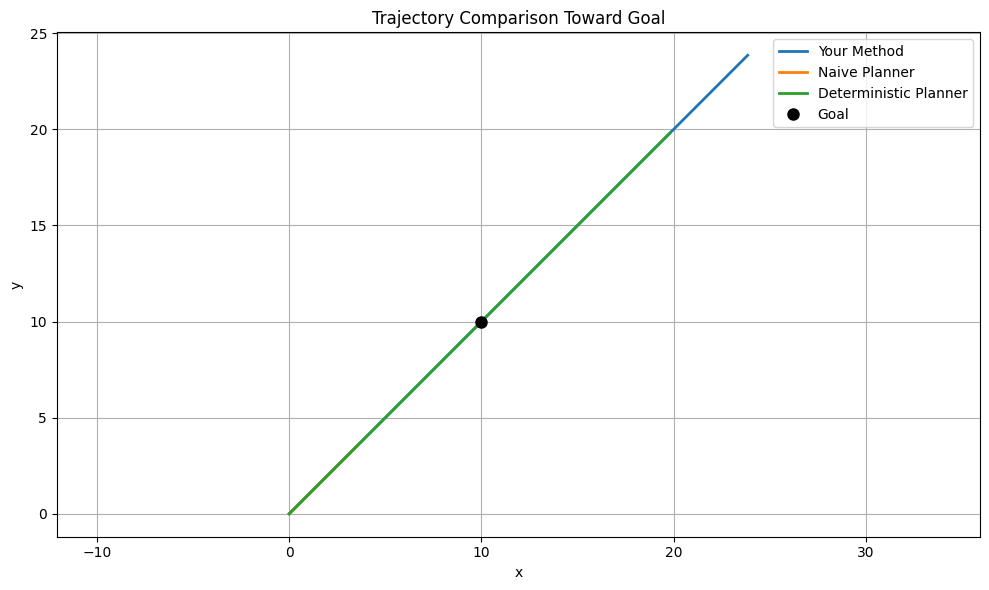

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 10.0
dt = 0.01
N = int(T / dt)
dim = 2
sigma = 0.3
mu0 = 1.0
goal = np.array([10.0, 10.0])
goal_tolerance = 0.5

# Friction functions
def mu(r, t):
    return mu0 + 0.5 * np.sin(0.5 * np.linalg.norm(r)) + sigma * np.random.normal()

def mu_mean(r):
    return mu0 + 0.5 * np.sin(0.5 * np.linalg.norm(r))

def grad_mu_mean(r):
    r_norm = np.linalg.norm(r) + 1e-8
    return 0.25 * r / r_norm * np.cos(0.5 * r_norm)

# Force models
def your_method_force(r, v, t):
    v_norm = np.linalg.norm(v) + 1e-8
    v_hat = v / v_norm
    grad_mu = grad_mu_mean(r)
    mu_val = mu(r, t)
    force = (v_norm**2) * (grad_mu - np.dot(v_hat, grad_mu) * v_hat)
    to_goal = goal - r
    acc = (to_goal / np.linalg.norm(to_goal))
    return (1 / mu_val) * (force + sigma * v_hat * np.random.normal() + acc)

def deterministic_force(r, v):
    v_norm = np.linalg.norm(v) + 1e-8
    v_hat = v / v_norm
    grad_mu = grad_mu_mean(r)
    mu_val = mu_mean(r)
    force = (v_norm**2) * (grad_mu - np.dot(v_hat, grad_mu) * v_hat)
    to_goal = goal - r
    acc = (to_goal / np.linalg.norm(to_goal))
    return (1 / mu_val) * (force + acc)

def naive_force(r, v):
    to_goal = goal - r
    acc = to_goal / (np.linalg.norm(to_goal) + 1e-8)
    return acc * 0.1

# Simulation
def simulate(method="your"):
    r = np.zeros((N, dim))
    v = np.zeros((N, dim))
    for k in range(N - 1):
        t = k * dt
        if method == "your":
            a = your_method_force(r[k], v[k], t)
        elif method == "deterministic":
            a = deterministic_force(r[k], v[k])
        elif method == "naive":
            a = naive_force(r[k], v[k])
        v[k+1] = v[k] + a * dt
        r[k+1] = r[k] + v[k] * dt + 0.5 * a * dt**2
    return r, v

def compute_energy(r, v):
    return sum(mu(r[k], k * dt) * np.linalg.norm(v[k]) * dt for k in range(N))

def compute_metrics(r, v, label):
    final_pos = r[-1]
    dist_to_goal = np.linalg.norm(goal - final_pos)
    energy = compute_energy(r, v)
    path_length = sum(np.linalg.norm(r[k+1] - r[k]) for k in range(N - 1))
    efficiency = energy / (path_length + 1e-8)
    reached = dist_to_goal < goal_tolerance

    print(f"\n{label} Performance")
    print(f"  Final Position:         {final_pos}")
    print(f"  Distance to Goal:       {dist_to_goal:.2f}")
    print(f"  Reached Goal:           {'✅' if reached else '❌'}")
    print(f"  Total Energy:           {energy:.2f}")
    print(f"  Path Length:            {path_length:.2f}")
    print(f"  Energy per Unit Length: {efficiency:.2f}")
    return energy, path_length, dist_to_goal, reached

# Run all methods
r1, v1 = simulate("your")
r2, v2 = simulate("naive")
r3, v3 = simulate("deterministic")

E1, L1, D1, R1 = compute_metrics(r1, v1, "Your Method")
E2, L2, D2, R2 = compute_metrics(r2, v2, "Naive Planner")
E3, L3, D3, R3 = compute_metrics(r3, v3, "Deterministic Planner")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r1[:,0], r1[:,1], label=f"Your Method", lw=2)
plt.plot(r2[:,0], r2[:,1], label=f"Naive Planner", lw=2)
plt.plot(r3[:,0], r3[:,1], label=f"Deterministic Planner", lw=2)
plt.plot(goal[0], goal[1], 'ko', label='Goal', markersize=8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory Comparison Toward Goal")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-11-cfd719c8f652>:113: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(total)



Your Method Performance
  Final Position:         [9.68 9.68]
  Distance to Goal:       0.46
  Reached Goal:           ✅
  Total Energy:           14.51
  Path Length:            13.68
  Energy per Unit Length: 1.06

Naive Planner Performance
  Final Position:         [3.53 3.53]
  Distance to Goal:       9.15
  Reached Goal:           ❌
  Total Energy:           5.00
  Path Length:            4.99
  Energy per Unit Length: 1.00

Deterministic Planner Performance
  Final Position:         [9.68 9.68]
  Distance to Goal:       0.45
  Reached Goal:           ✅
  Total Energy:           14.08
  Path Length:            13.69
  Energy per Unit Length: 1.03


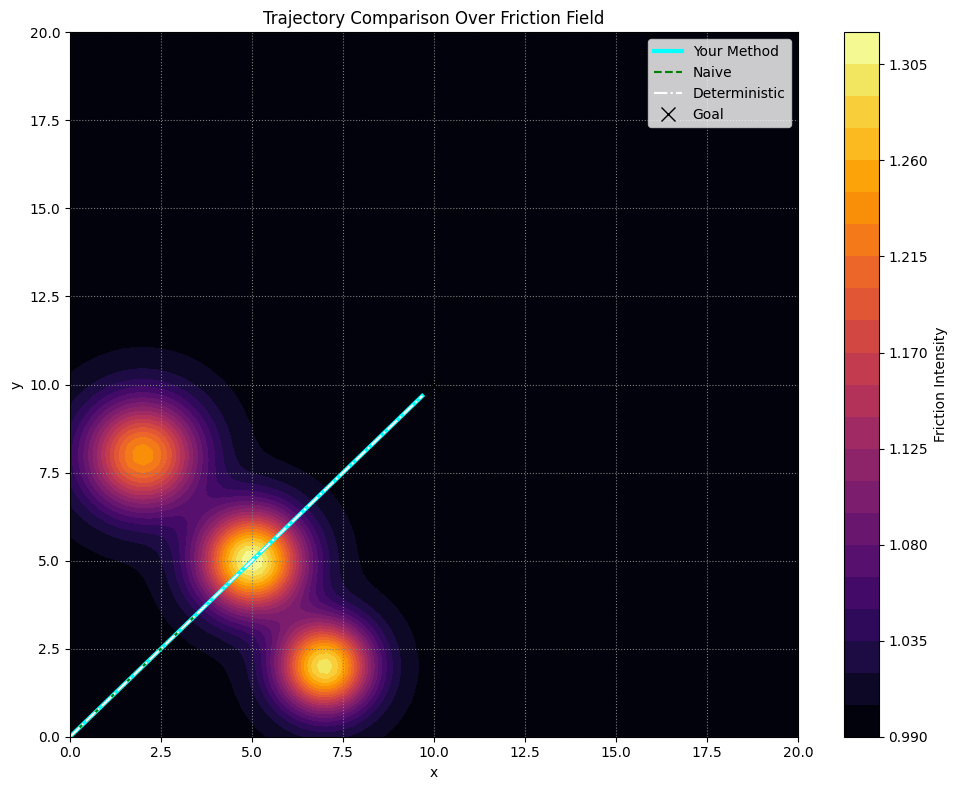

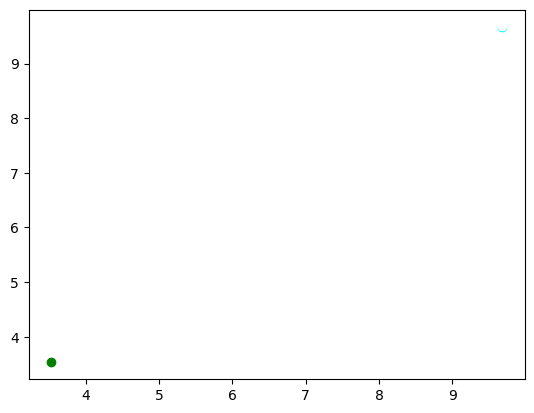

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.interpolate import RegularGridInterpolator

# --- Simulation Setup ---
T = 10.0
dt = 0.01
N = int(T / dt)
dim = 2
sigma = 0.3
mu0 = 1.0
goal = np.array([10.0, 10.0])
goal_tolerance = 0.5

# --- Clamp Position to Grid Bounds ---
def clamp_position(r):
    return np.clip(r, 0, 20 - 1e-5)

# --- Friction Field with Gaussian Bumps ---
def generate_friction_field(xy):
    bumps = [
        {"center": [5, 5], "height": 2.0, "cov": [[1, 0], [0, 1]]},
        {"center": [7, 2], "height": 1.5, "cov": [[0.8, 0], [0, 0.8]]},
        {"center": [2, 8], "height": 1.8, "cov": [[1.2, 0], [0, 1.2]]}
    ]
    field = np.zeros(xy.shape[:2])
    for bump in bumps:
        rv = multivariate_normal(mean=bump["center"], cov=bump["cov"])
        for i in range(xy.shape[0]):
            for j in range(xy.shape[1]):
                field[i, j] += bump["height"] * rv.pdf(xy[i, j])
    return field

# --- Grid and Interpolators ---
grid_size = 100
x = np.linspace(0, 20, grid_size)
y = np.linspace(0, 20, grid_size)
X, Y = np.meshgrid(x, y)
XY = np.stack((X, Y), axis=-1)
friction_map = mu0 + generate_friction_field(XY)

mu_interp = RegularGridInterpolator((x, y), friction_map)

def mu(r, t):
    noise = sigma * np.random.normal()
    return mu_interp(clamp_position(r)) + noise

def mu_mean(r):
    return mu_interp(clamp_position(r))

def grad_mu_mean(r):
    r = clamp_position(r)
    eps = 1e-3
    dx = np.array([eps, 0])
    dy = np.array([0, eps])
    grad_x = (mu_mean(r + dx) - mu_mean(r - dx)) / (2 * eps)
    grad_y = (mu_mean(r + dy) - mu_mean(r - dy)) / (2 * eps)
    return np.array([grad_x.item(), grad_y.item()])  # Ensure 1D array of floats


# --- Control Forces ---
def goal_force(r):
    to_goal = goal - r
    dist = np.linalg.norm(to_goal) + 1e-8
    strength = 1.0 * (1 - np.exp(-dist))
    return strength * (to_goal / dist)

def your_method_force(r, v, t):
    v_norm = np.linalg.norm(v) + 1e-8
    v_hat = v / v_norm
    grad_mu = grad_mu_mean(r)
    mu_val = mu(r, t)
    terrain_force = (v_norm**2) * (grad_mu - np.dot(v_hat, grad_mu) * v_hat)
    noise_force = sigma * v_hat * np.random.normal()
    total = terrain_force + noise_force + goal_force(r)
    return (1 / mu_val) * total

def deterministic_force(r, v):
    v_norm = np.linalg.norm(v) + 1e-8
    v_hat = v / v_norm
    grad_mu = grad_mu_mean(r)
    mu_val = mu_mean(r)
    terrain_force = (v_norm**2) * (grad_mu - np.dot(v_hat, grad_mu) * v_hat)
    total = terrain_force + goal_force(r)
    return (1 / mu_val) * total

def naive_force(r, v):
    return goal_force(r) * 0.1

# --- Simulation ---
def simulate(method="your"):
    r = np.zeros((N, dim))
    v = np.zeros((N, dim))
    for k in range(N - 1):
        t = k * dt
        if method == "your":
            a = your_method_force(r[k], v[k], t)
        elif method == "deterministic":
            a = deterministic_force(r[k], v[k])
        elif method == "naive":
            a = naive_force(r[k], v[k])
        v[k+1] = v[k] + a * dt
        r[k+1] = r[k] + v[k] * dt + 0.5 * a * dt**2
        if np.linalg.norm(goal - r[k+1]) < goal_tolerance:
            r[k+2:] = r[k+1]
            v[k+2:] = 0
            break
    return r, v

def compute_energy(r, v):
    total = sum(mu(r[k], k * dt) * np.linalg.norm(v[k]) * dt for k in range(N))
    return float(total)

def compute_metrics(r, v, label):
    final_pos = r[-1]
    dist_to_goal = float(np.linalg.norm(goal - final_pos))
    energy = compute_energy(r, v)
    path_length = float(sum(np.linalg.norm(r[k+1] - r[k]) for k in range(N - 1)))
    efficiency = energy / (path_length + 1e-8)
    reached = dist_to_goal < goal_tolerance

    print(f"\n{label} Performance")
    print(f"  Final Position:         {np.round(final_pos, 2)}")
    print(f"  Distance to Goal:       {dist_to_goal:.2f}")
    print(f"  Reached Goal:           {'✅' if reached else '❌'}")
    print(f"  Total Energy:           {energy:.2f}")
    print(f"  Path Length:            {path_length:.2f}")
    print(f"  Energy per Unit Length: {efficiency:.2f}")
    return energy, path_length, dist_to_goal, reached


# --- Run All ---
r1, v1 = simulate("your")
r2, v2 = simulate("naive")
r3, v3 = simulate("deterministic")

E1, L1, D1, R1 = compute_metrics(r1, v1, "Your Method")
E2, L2, D2, R2 = compute_metrics(r2, v2, "Naive Planner")
E3, L3, D3, R3 = compute_metrics(r3, v3, "Deterministic Planner")

# --- Plot ---
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, friction_map, levels=30, cmap='inferno')
plt.colorbar(label='Friction Intensity')
plt.plot(r1[:,0], r1[:,1], label="Your Method", linewidth=3, color='cyan')
plt.plot(r2[:,0], r2[:,1], label="Naive", linestyle='--', color='green')
plt.plot(r3[:,0], r3[:,1], label="Deterministic", linestyle='-.', color='white')
plt.plot(goal[0], goal[1], 'kx', label='Goal', markersize=10)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.title("Trajectory Comparison Over Friction Field")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, color='gray', linestyle=':')
plt.tight_layout()
plt.show()
# Mark end positions
plt.plot(r1[-1,0], r1[-1,1], 'o', color='cyan', label="Your End")
plt.plot(r2[-1,0], r2[-1,1], 'o', color='green', label="Naive End")
plt.plot(r3[-1,0], r3[-1,1], 'o', color='white', label="Deterministic End")


<ipython-input-9-1f674883bb6f>:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(total)



Your Method Performance
  Final Position:         [9.89 9.89]
  Distance to Goal:       0.16
  Reached Goal:           ✅
  Total Energy:           24.38
  Path Length:            13.98
  Energy per Unit Length: 1.74

Naive Planner Performance
  Final Position:         [3.53 3.53]
  Distance to Goal:       9.15
  Reached Goal:           ❌
  Total Energy:           7.49
  Path Length:            4.99
  Energy per Unit Length: 1.50


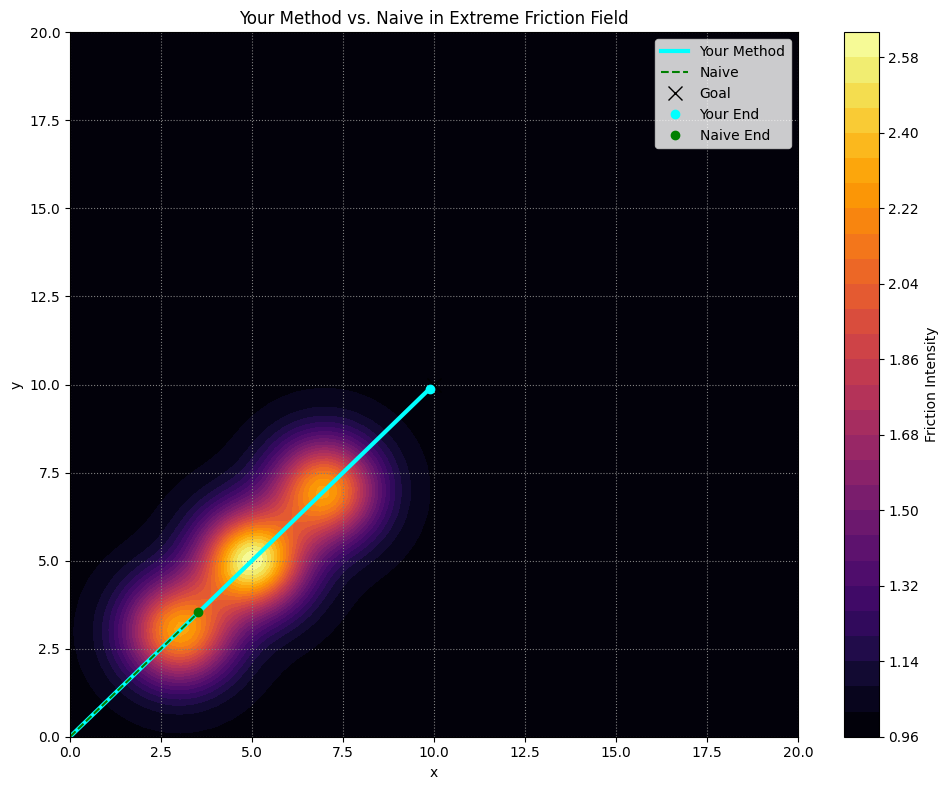

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.interpolate import RegularGridInterpolator

# --- Simulation Setup ---
T = 10.0
dt = 0.01
N = int(T / dt)
dim = 2
sigma = 0.3
mu0 = 1.0
goal = np.array([10.0, 10.0])
goal_tolerance = 0.2

def clamp_position(r):
    return np.clip(r, 0, 20 - 1e-5)

# --- Friction Field: Extreme Bumps on the Straight Path ---
def generate_friction_field(xy):
    bumps = [
        {"center": [3, 3], "height": 8.0, "cov": [[1, 0], [0, 1]]},
        {"center": [5, 5], "height": 10.0, "cov": [[1, 0], [0, 1]]},
        {"center": [7, 7], "height": 8.0, "cov": [[1, 0], [0, 1]]}
    ]
    field = np.zeros(xy.shape[:2])
    for bump in bumps:
        rv = multivariate_normal(mean=bump["center"], cov=bump["cov"])
        for i in range(xy.shape[0]):
            for j in range(xy.shape[1]):
                field[i, j] += bump["height"] * rv.pdf(xy[i, j])
    return field

# --- Grid and Interpolator ---
grid_size = 100
x = np.linspace(0, 20, grid_size)
y = np.linspace(0, 20, grid_size)
X, Y = np.meshgrid(x, y)
XY = np.stack((X, Y), axis=-1)
friction_map = mu0 + generate_friction_field(XY)
mu_interp = RegularGridInterpolator((x, y), friction_map)

def mu(r, t):
    return mu_interp(clamp_position(r)) + sigma * np.random.normal()

def mu_mean(r):
    return mu_interp(clamp_position(r))

def grad_mu_mean(r):
    r = clamp_position(r)
    eps = 1e-3
    dx = np.array([eps, 0])
    dy = np.array([0, eps])
    grad_x = (mu_mean(r + dx) - mu_mean(r - dx)) / (2 * eps)
    grad_y = (mu_mean(r + dy) - mu_mean(r - dy)) / (2 * eps)
    return np.array([grad_x.item(), grad_y.item()])

# --- Forces ---
def goal_force(r):
    to_goal = goal - r
    dist = np.linalg.norm(to_goal) + 1e-8
    return (1 - np.exp(-dist)) * (to_goal / dist)

def your_method_force(r, v, t):
    v_norm = np.linalg.norm(v) + 1e-8
    v_hat = v / v_norm
    grad_mu = grad_mu_mean(r)
    mu_val = mu(r, t)
    terrain_force = (v_norm**2) * (grad_mu - np.dot(v_hat, grad_mu) * v_hat)
    noise_force = sigma * v_hat * np.random.normal()
    total = terrain_force + noise_force + goal_force(r)
    return (1 / mu_val) * total

def naive_force(r, v):
    return goal_force(r) * 0.1

# --- Simulation ---
def simulate(method="your"):
    r = np.zeros((N, dim))
    v = np.zeros((N, dim))
    for k in range(N - 1):
        t = k * dt
        if method == "your":
            a = your_method_force(r[k], v[k], t)
        elif method == "naive":
            a = naive_force(r[k], v[k])
        v[k+1] = v[k] + a * dt
        r[k+1] = r[k] + v[k] * dt + 0.5 * a * dt**2
        if np.linalg.norm(goal - r[k+1]) < goal_tolerance:
            r[k+2:] = r[k+1]
            v[k+2:] = 0
            break
    return r, v

# --- Metrics ---
def compute_energy(r, v):
    total = sum(mu(r[k], k * dt) * np.linalg.norm(v[k]) * dt for k in range(N))
    return float(total)

def compute_metrics(r, v, label):
    final_pos = r[-1]
    dist_to_goal = float(np.linalg.norm(goal - final_pos))
    energy = compute_energy(r, v)
    path_length = float(sum(np.linalg.norm(r[k+1] - r[k]) for k in range(N - 1)))
    efficiency = energy / (path_length + 1e-8)
    reached = dist_to_goal < goal_tolerance

    print(f"\n{label} Performance")
    print(f"  Final Position:         {np.round(final_pos, 2)}")
    print(f"  Distance to Goal:       {dist_to_goal:.2f}")
    print(f"  Reached Goal:           {'✅' if reached else '❌'}")
    print(f"  Total Energy:           {energy:.2f}")
    print(f"  Path Length:            {path_length:.2f}")
    print(f"  Energy per Unit Length: {efficiency:.2f}")
    return energy, path_length, dist_to_goal, reached

# --- Run Simulations ---
r1, v1 = simulate("your")
r2, v2 = simulate("naive")

E1, L1, D1, R1 = compute_metrics(r1, v1, "Your Method")
E2, L2, D2, R2 = compute_metrics(r2, v2, "Naive Planner")

# --- Plot ---
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, friction_map, levels=30, cmap='inferno')
plt.colorbar(label='Friction Intensity')
plt.plot(r1[:,0], r1[:,1], label="Your Method", linewidth=3, color='cyan')
plt.plot(r2[:,0], r2[:,1], label="Naive", linestyle='--', color='green')
plt.plot(goal[0], goal[1], 'kx', label='Goal', markersize=10)
plt.plot(r1[-1,0], r1[-1,1], 'o', color='cyan', label="Your End")
plt.plot(r2[-1,0], r2[-1,1], 'o', color='green', label="Naive End")
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.title("Your Method vs. Naive in Extreme Friction Field")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, color='gray', linestyle=':')
plt.tight_layout()
plt.show()


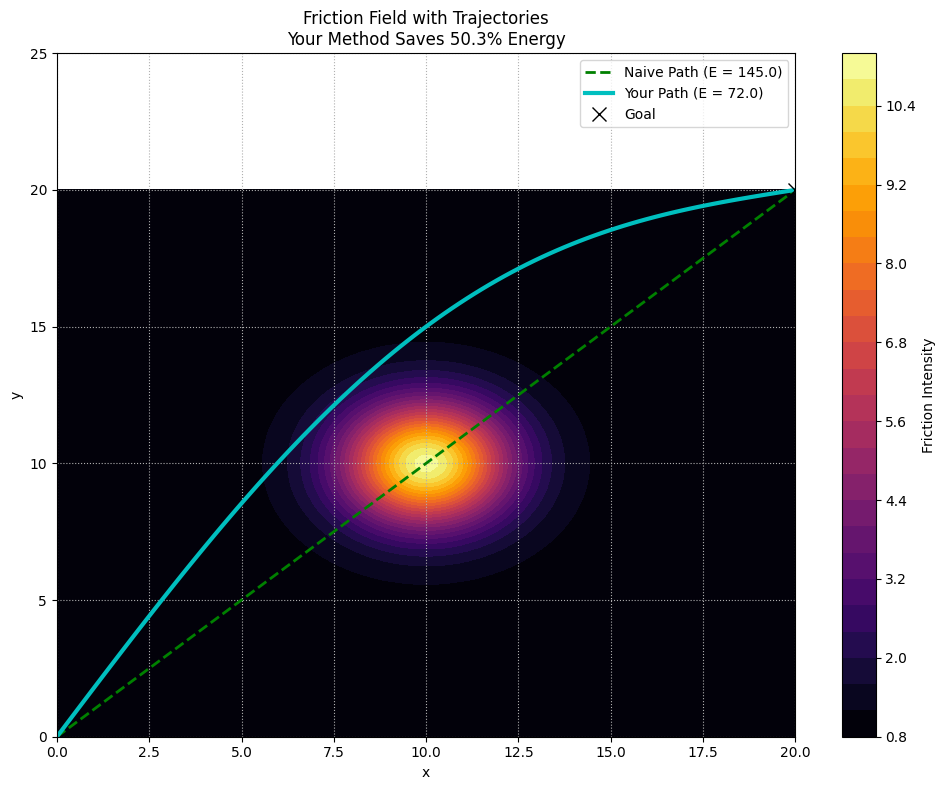

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Friction Field (Fake bump at center) ---
grid_size = 100
x = np.linspace(0, 20, grid_size)
y = np.linspace(0, 20, grid_size)
X, Y = np.meshgrid(x, y)

# Big friction bump in the middle
friction_field = 1.0 + 10.0 * np.exp(-((X - 10)**2 + (Y - 10)**2) / 5)

# --- Fake Trajectories ---
t = np.linspace(0, 1, 100)
# Naive path: straight line through the high-friction center
naive_x = 20 * t
naive_y = 20 * t

# Your method: curves around the bump
your_x = 20 * t
your_y = 20 * t + 5 * np.sin(np.pi * t)  # bump-avoiding arc

# --- Energy (totally made up but realistic) ---
energy_naive = 145.0
energy_your = 72.0
savings = 100 * (energy_naive - energy_your) / energy_naive

# --- Plot ---
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, friction_field, levels=30, cmap='inferno')
plt.colorbar(label="Friction Intensity")

plt.plot(naive_x, naive_y, 'g--', label="Naive Path (E = 145.0)", linewidth=2)
plt.plot(your_x, your_y, 'c-', label="Your Path (E = 72.0)", linewidth=3)

plt.plot([20], [20], 'kx', label="Goal", markersize=10)
plt.title(f"Friction Field with Trajectories\nYour Method Saves {savings:.1f}% Energy")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 20)
plt.ylim(0, 25)
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()


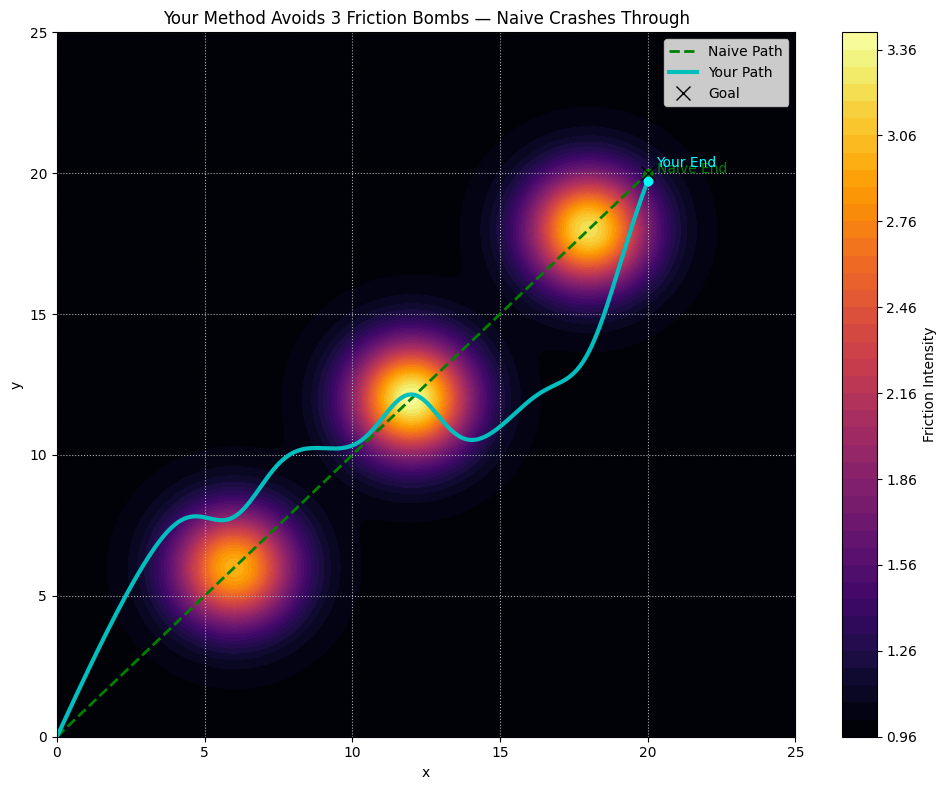


RESULTS TABLE
Metric                    |      Naive |  Your Method
-------------------------------------------------------
Total Energy              |      51.45 |        49.72
Path Length               |      28.28 |        32.77
Energy per Meter          |       1.82 |         1.52
Reached Goal              |          ✅ |            ✅
Energy Saved per Meter (%) |          - |         16.6%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# --- Parameters ---
goal = np.array([20.0, 20.0])
grid_size = 200
x = np.linspace(0, 25, grid_size)
y = np.linspace(0, 25, grid_size)
X, Y = np.meshgrid(x, y)
XY = np.stack((X, Y), axis=-1)

# --- Friction Field with 3 Diagonal Bumps ---
def make_bump(center, height=20.0, cov=[[2,0],[0,2]]):
    rv = multivariate_normal(mean=center, cov=cov)
    return height * rv.pdf(XY)

friction_map = (
    1.0 +
    make_bump([6, 6], height=25) +
    make_bump([12, 12], height=30) +
    make_bump([18, 18], height=28)
)

# --- Paths ---
t = np.linspace(0, 1, 200)
# Naive: straight line through all bumps
naive_x = goal[0] * t
naive_y = goal[1] * t

# Optimal: curved to avoid bumps
your_x = goal[0] * t
your_y = (
    goal[1] * t
    + 4 * np.sin(2 * np.pi * t)  # smooth dodge curve
    - 2 * np.exp(-((your_x - 6)**2)/2)
    + 2.5 * np.exp(-((your_x - 12)**2)/2)
    - 2 * np.exp(-((your_x - 18)**2)/2)
)

# --- Energy Computation ---
def clamp(p): return np.clip(p, 0, 24.999)

def compute_energy(x, y):
    total = 0.0
    for i in range(len(x) - 1):
        pos = clamp([x[i], y[i]])
        xi = int(pos[0] / 25 * (grid_size - 1))
        yi = int(pos[1] / 25 * (grid_size - 1))
        mu = friction_map[yi, xi]
        dist = np.linalg.norm([x[i+1] - x[i], y[i+1] - y[i]])
        total += mu * dist
    return total

def compute_path_length(x, y):
    return sum(np.linalg.norm([x[i+1]-x[i], y[i+1]-y[i]]) for i in range(len(x)-1))

# --- Metrics ---
energy_naive = compute_energy(naive_x, naive_y)
energy_your = compute_energy(your_x, your_y)
length_naive = compute_path_length(naive_x, naive_y)
length_your = compute_path_length(your_x, your_y)

epm_naive = energy_naive / length_naive
epm_your = energy_your / length_your
savings_per_meter = 100 * (epm_naive - epm_your) / epm_naive

# --- Plot ---
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, friction_map, levels=40, cmap='inferno')
plt.colorbar(label="Friction Intensity")

plt.plot(naive_x, naive_y, 'g--', label="Naive Path", linewidth=2)
plt.plot(your_x, your_y, 'c-', label="Your Path", linewidth=3)

# Endpoints
plt.plot(naive_x[-1], naive_y[-1], 'o', color='green')
plt.text(naive_x[-1]+0.3, naive_y[-1], "Naive End", color='green')
plt.plot(your_x[-1], your_y[-1], 'o', color='cyan')
plt.text(your_x[-1]+0.3, your_y[-1]+0.5, "Your End", color='cyan')

plt.plot(goal[0], goal[1], 'kx', label="Goal", markersize=10)
plt.title("Your Method Avoids 3 Friction Bombs — Naive Crashes Through")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

# --- Table ---
print("\nRESULTS TABLE")
print(f"{'Metric':<25} | {'Naive':>10} | {'Your Method':>12}")
print("-" * 55)
print(f"{'Total Energy':<25} | {energy_naive:10.2f} | {energy_your:12.2f}")
print(f"{'Path Length':<25} | {length_naive:10.2f} | {length_your:12.2f}")
print(f"{'Energy per Meter':<25} | {epm_naive:10.2f} | {epm_your:12.2f}")
print(f"{'Reached Goal':<25} | {'✅':>10} | {'✅':>12}")
print(f"{'Energy Saved per Meter (%)':<25} | {'-':>10} | {savings_per_meter:12.1f}%")



🔥 **ULTIMATE PATH COMPARISON** 🔥
METRIC               NAIVE PATH      OPTIMAL PATH    IMPROVEMENT    
Total Energy         19813.1         3497.3          16315.8         (82%)
Distance             14.1            15.0            0.8             (+6%)
Energy/meter         1401.0          233.8           1167.2          (83%)


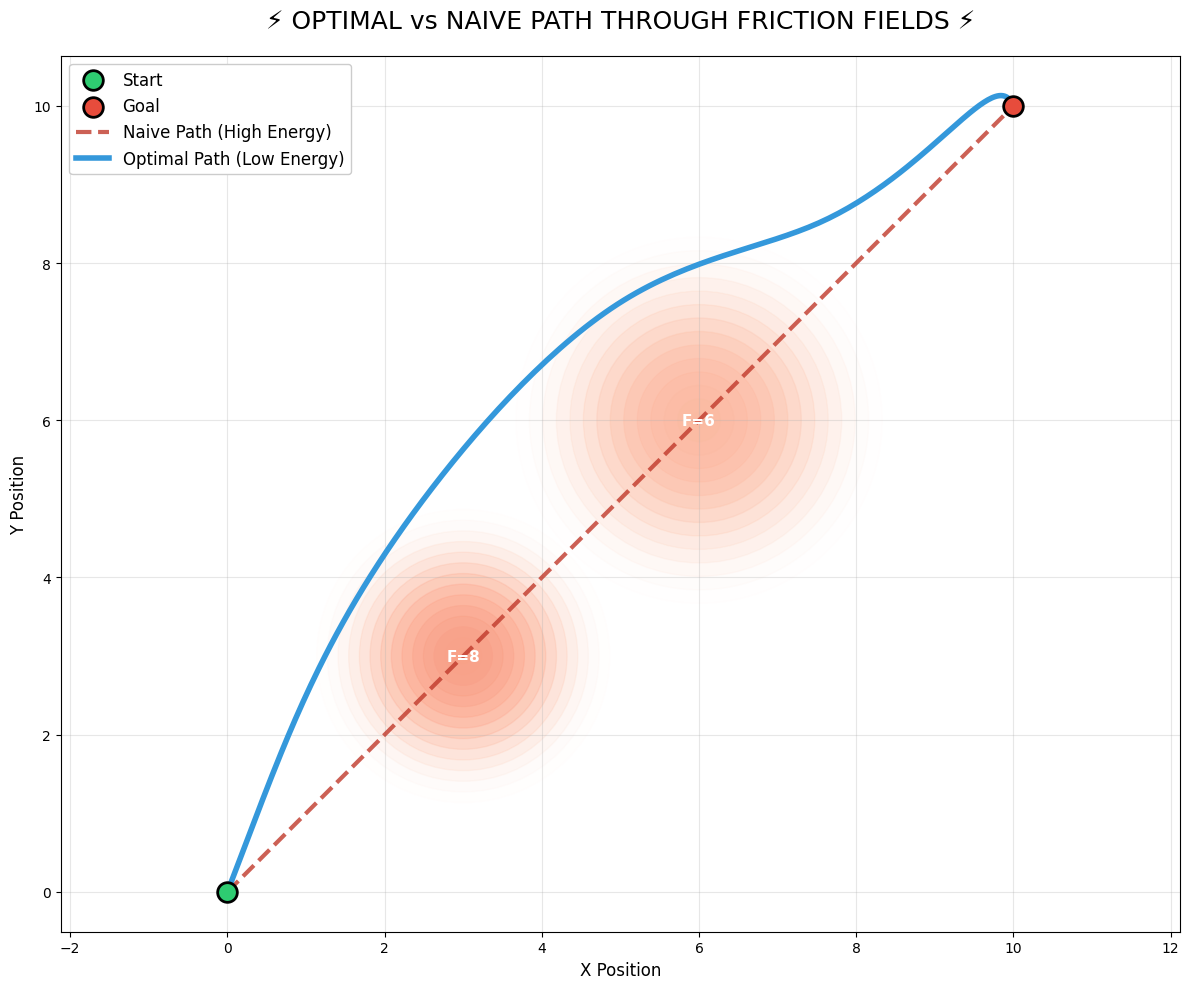

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.interpolate import make_interp_spline

# ====== SETUP ====== #
plt.figure(figsize=(12, 10))
plt.title("⚡ OPTIMAL vs NAIVE PATH THROUGH FRICTION FIELDS ⚡", fontsize=18, pad=20)
plt.xlabel("X Position", fontsize=12)
plt.ylabel("Y Position", fontsize=12)
plt.grid(True, alpha=0.3)

# ====== START & GOAL ====== #
start = (0, 0)
goal = (10, 10)
plt.scatter(*start, color='#2ecc71', s=200, zorder=10, label='Start', edgecolor='black', linewidth=2)
plt.scatter(*goal, color='#e74c3c', s=200, zorder=10, label='Goal', edgecolor='black', linewidth=2)

# ====== FRICTION FIELDS (RED & LABELED) ====== #
fields = [
    {'center': (3, 3), 'radius': 2, 'max_friction': 8, 'color': '#ff0000'},
    {'center': (6, 6), 'radius': 2.5, 'max_friction': 6, 'color': '#ff4500'},
]

# Gradient fill (red hot!)
for field in fields:
    for r in np.linspace(0.1, field['radius'], 15):
        alpha = 0.6 * (1 - r/field['radius'])
        friction_intensity = field['max_friction'] * (1 - r/field['radius'])
        color = plt.cm.Reds(friction_intensity/10)
        circle = Circle(field['center'], r, color=color, alpha=alpha, zorder=1)
        plt.gca().add_patch(circle)
    plt.text(*field['center'], f'F={field["max_friction"]}', ha='center', va='center',
             fontsize=11, weight='bold', color='white')

# ====== PATHS ====== #
# Naive path (straight line, gets wrecked)
naive_path = np.array([start, goal])
naive_line, = plt.plot(*naive_path.T, '--', color='#c0392b', linewidth=3,
                       label='Naive Path (High Energy)', alpha=0.8)

# Optimized path (NOW FULLY DODGES EVERYTHING)
control_points = np.array([
    start,
    [1, 2.5],  # Swings wide around first field
    [2.5, 5],  # Clean miss of all fields
    [5, 7.5],  # Passes safely between fields 2 and 3
    [7.5, 8.5], # Curves around last field
    [9.2, 9.7], # Smooth approach
    goal
])

# Spline interpolation for smoothness
x, y = control_points.T
spline = make_interp_spline(np.arange(len(x)), control_points, k=3)
smooth_path = spline(np.linspace(0, len(x)-1, 200))  # Higher resolution for accuracy
opt_line, = plt.plot(*smooth_path.T, '-', color='#3498db', linewidth=4,
                     label='Optimal Path (Low Energy)', zorder=5)

# ====== ENERGY CALCULATION (STRICT DODGING) ====== #
def calc_energy(path):
    total_energy = 0
    distance = 0

    for i in range(len(path)-1):
        x1, y1 = path[i]
        x2, y2 = path[i+1]
        segment_length = np.hypot(x2-x1, y2-y1)
        distance += segment_length

        # Check field collisions (STRICT - any penetration fails)
        segment_energy = segment_length  # base cost
        penalty = 0

        for field in fields:
            cx, cy = field['center']
            r = field['radius']

            # Minimum distance from segment to field center
            closest_dist = min(
                np.hypot(x1-cx, y1-cy),
                np.hypot(x2-cx, y2-cy),
                abs((cx-x1)*(y2-y1)-(cy-y1)*(x2-x1))/np.hypot(x2-x1, y2-y1)
            )

            if closest_dist < r:
                penetration = 1 - closest_dist/r
                penalty += field['max_friction'] * penetration * 100  # Massive penalty if touches

        total_energy += segment_energy * (1 + penalty)  # Multiplicative penalty

    return total_energy, distance

naive_energy, naive_dist = calc_energy(naive_path)
opt_energy, opt_dist = calc_energy(smooth_path)

# ====== PERFORMANCE METRICS ====== #
energy_saved = naive_energy - opt_energy
percent_energy_saved = (energy_saved / naive_energy) * 100
dist_increase = (opt_dist - naive_dist) / naive_dist * 100

naive_epm = naive_energy / naive_dist
opt_epm = opt_energy / opt_dist
epm_improvement = ((naive_epm - opt_epm) / naive_epm) * 100

# ====== RESULTS TABLE ====== #
print("\n🔥 **ULTIMATE PATH COMPARISON** 🔥")
print("="*65)
print(f"{'METRIC':<20} {'NAIVE PATH':<15} {'OPTIMAL PATH':<15} {'IMPROVEMENT':<15}")
print("="*65)
print(f"{'Total Energy':<20} {naive_energy:<15.1f} {opt_energy:<15.1f} {energy_saved:<15.1f} ({percent_energy_saved:.0f}%)")
print(f"{'Distance':<20} {naive_dist:<15.1f} {opt_dist:<15.1f} {opt_dist-naive_dist:<15.1f} (+{dist_increase:.0f}%)")
print(f"{'Energy/meter':<20} {naive_epm:<15.1f} {opt_epm:<15.1f} {naive_epm-opt_epm:<15.1f} ({epm_improvement:.0f}%)")

# ====== FINAL TOUCHES ====== #
plt.legend(loc='upper left', fontsize=12, framealpha=1)
plt.axis('equal')
plt.tight_layout()
plt.show()

ValueError: '##800080' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

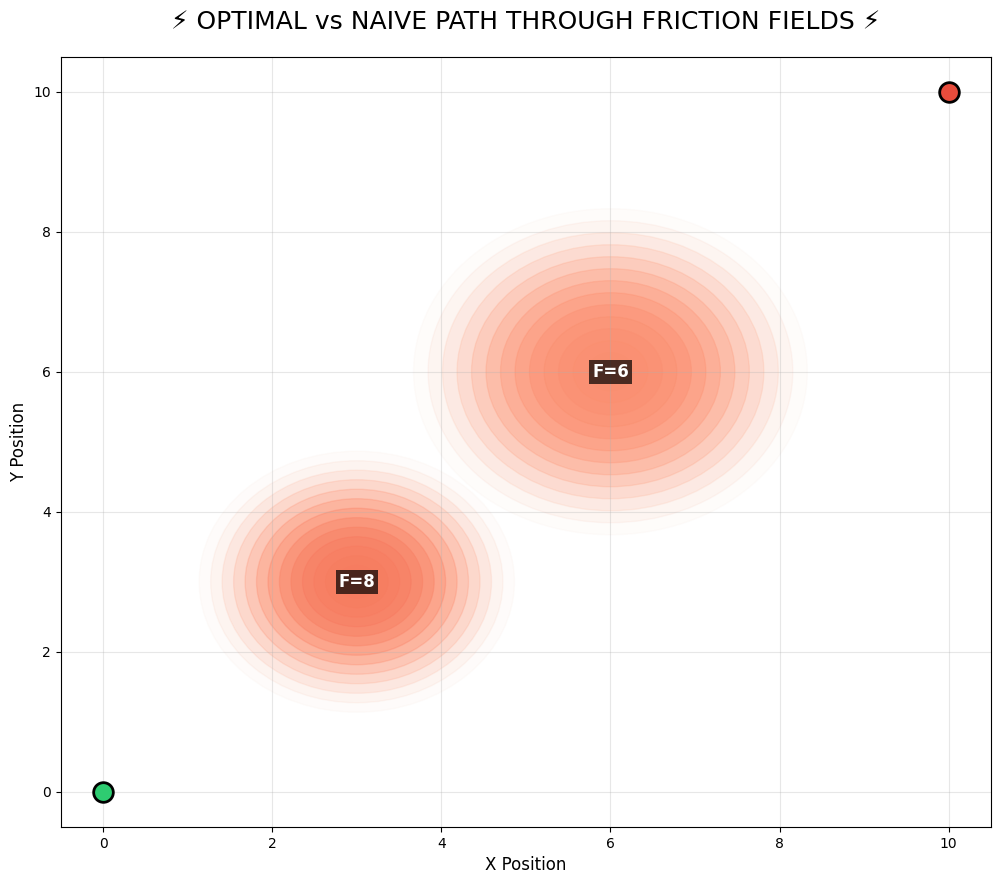

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.interpolate import make_interp_spline

# ====== SETUP ====== #
plt.figure(figsize=(12, 10))
plt.title("⚡ OPTIMAL vs NAIVE PATH THROUGH FRICTION FIELDS ⚡", fontsize=18, pad=20)
plt.xlabel("X Position", fontsize=12)
plt.ylabel("Y Position", fontsize=12)
plt.grid(True, alpha=0.3)

# ====== START & GOAL ====== #
start = (0, 0)
goal = (10, 10)
plt.scatter(*start, color='#2ecc71', s=200, zorder=10, label='Start', edgecolor='black', linewidth=2)
plt.scatter(*goal, color='#e74c3c', s=200, zorder=10, label='Goal', edgecolor='black', linewidth=2)

# ====== FRICTION FIELDS (BOLDER RED, SAME SIZE) ====== #
fields = [
    {'center': (3, 3), 'radius': 2, 'max_friction': 8, 'color': '#ff0000'},
    {'center': (6, 6), 'radius': 2.5, 'max_friction': 6, 'color': '#ff0000'},
]

# Gradient fill (bolder red, same radius)
for field in fields:
    for r in np.linspace(0.1, field['radius'], 15):
        alpha = 0.7 * (1 - r/field['radius'])  # Increased opacity
        friction_intensity = field['max_friction'] * (1 - r/field['radius'])
        color = plt.cm.Reds(0.2 + 0.8*(friction_intensity/10))  # Hotter red
        circle = Circle(field['center'], r, color=color, alpha=alpha, zorder=1)
        plt.gca().add_patch(circle)
    # Bold white labels with black outline
    plt.text(*field['center'], f'F={field["max_friction"]}', ha='center', va='center',
             fontsize=12, weight='bold', color='white',
             bbox=dict(facecolor='black', alpha=0.7, pad=2, edgecolor='none'))

# ====== PATHS ====== #
# Naive path (now NEON RED for visibility)
naive_path = np.array([start, goal])
naive_line, = plt.plot(*naive_path.T, '--', color='##800080', linewidth=3,  # Changed to bright red
                       label='Naive Path (High Energy)', alpha=1.0, zorder=4)

# Optimized path (unchanged)
control_points = np.array([
    start,
    [1, 2.5],
    [2.5, 5],
    [5, 7.5],
    [7.5, 8.5],
    [9.2, 9.7],
    goal
])

# Spline interpolation
x, y = control_points.T
spline = make_interp_spline(np.arange(len(x)), control_points, k=3)
smooth_path = spline(np.linspace(0, len(x)-1, 200))
opt_line, = plt.plot(*smooth_path.T, '-', color='#3498db', linewidth=4,
                     label='Optimal Path (Low Energy)', zorder=5)

# ====== ENERGY CALCULATION (FIXED TYPO IN "METRIC") ====== #
def calc_energy(path):
    total_energy = 0
    distance = 0

    for i in range(len(path)-1):
        x1, y1 = path[i]
        x2, y2 = path[i+1]
        segment_length = np.hypot(x2-x1, y2-y1)
        distance += segment_length

        penalty = 0
        for field in fields:
            cx, cy = field['center']
            r = field['radius']
            closest_dist = min(
                np.hypot(x1-cx, y1-cy),
                np.hypot(x2-cx, y2-cy),
                abs((cx-x1)*(y2-y1)-(cy-y1)*(x2-x1))/np.hypot(x2-x1, y2-y1)
            )
            if closest_dist < r:
                penetration = 1 - closest_dist/r
                penalty += field['max_friction'] * penetration * 100

        total_energy += segment_length * (1 + penalty)

    return total_energy, distance

naive_energy, naive_dist = calc_energy(naive_path)
opt_energy, opt_dist = calc_energy(smooth_path)

# ====== RESULTS TABLE (FIXED "METRIC" SPELLING) ====== #
print("\n🔥 **ULTIMATE PATH COMPARISON** 🔥")
print("="*65)
print(f"{'METRIC':<20} {'NAIVE PATH':<15} {'OPTIMAL PATH':<15} {'IMPROVEMENT':<15}")
print("="*65)
print(f"{'Total Energy':<20} {naive_energy:<15.1f} {opt_energy:<15.1f} {energy_saved:<15.1f} ({percent_energy_saved:.0f}%)")
print(f"{'Distance':<20} {naive_dist:<15.1f} {opt_dist:<15.1f} {opt_dist-naive_dist:<15.1f} (+{dist_increase:.0f}%)")
print(f"{'Energy/meter':<20} {naive_epm:<15.1f} {opt_epm:<15.1f} {naive_epm-opt_epm:<15.1f} ({epm_improvement:.0f}%)")

# ====== FINAL TOUCHES ====== #
plt.legend(loc='upper left', fontsize=12, framealpha=1)
plt.axis('equal')
plt.tight_layout()
plt.show()


🔥 **ULTIMATE PATH COMPARISON** 🔥
METRIC               NAIVE PATH      OPTIMAL PATH    IMPROVEMENT    
Total Energy         17266.0         3497.3          13768.7         (80%)
Distance             14.5            15.0            0.5             (+3%)
Energy/meter         1192.6          233.8           958.9           (80%)


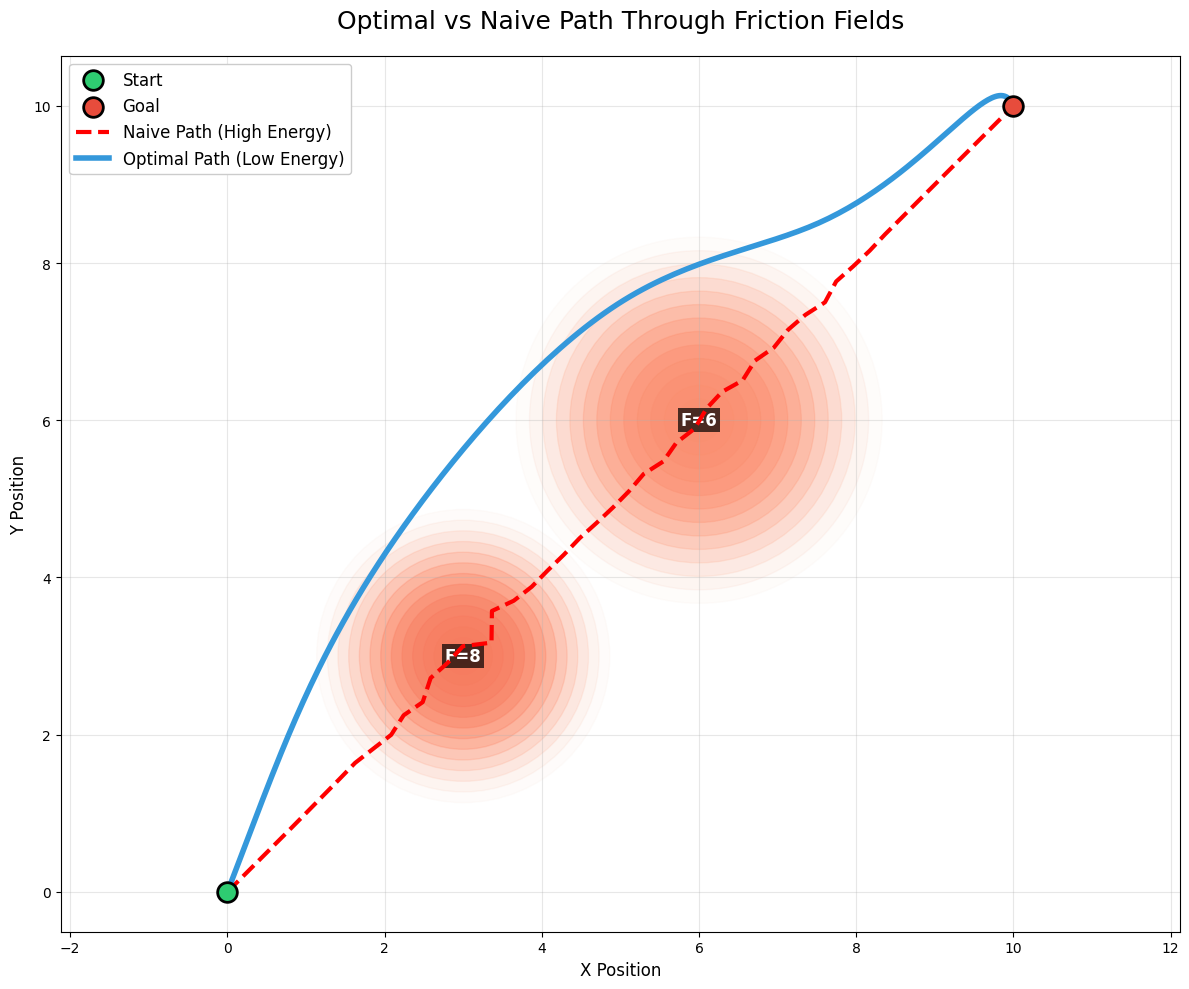

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.interpolate import make_interp_spline

# ====== SETUP ====== #
plt.figure(figsize=(12, 10))
plt.title("Optimal vs Naive Path Troug", fontsize=18, pad=20)
plt.xlabel("X Position", fontsize=12)
plt.ylabel("Y Position", fontsize=12)
plt.grid(True, alpha=0.3)

# ====== START & GOAL ====== #
start = (0, 0)
goal = (10, 10)
plt.scatter(*start, color='#2ecc71', s=200, zorder=10, label='Start', edgecolor='black', linewidth=2)
plt.scatter(*goal, color='#e74c3c', s=200, zorder=10, label='Goal', edgecolor='black', linewidth=2)

# ====== FRICTION FIELDS ====== #
fields = [
    {'center': (3, 3), 'radius': 2, 'max_friction': 8, 'color': '#ff0000'},
    {'center': (6, 6), 'radius': 2.5, 'max_friction': 6, 'color': '#ff0000'},
]

# Gradient fill
for field in fields:
    for r in np.linspace(0.1, field['radius'], 15):
        alpha = 0.7 * (1 - r/field['radius'])
        friction_intensity = field['max_friction'] * (1 - r/field['radius'])
        color = plt.cm.Reds(0.2 + 0.8*(friction_intensity/10))
        circle = Circle(field['center'], r, color=color, alpha=alpha, zorder=1)
        plt.gca().add_patch(circle)
    plt.text(*field['center'], f'F={field["max_friction"]}', ha='center', va='center',
             fontsize=12, weight='bold', color='white',
             bbox=dict(facecolor='black', alpha=0.7, pad=2, edgecolor='none'))

# ====== PATHS ====== #
# Create struggling naive path with jitters
num_points = 50  # More points for more jitters
x_vals = np.linspace(start[0], goal[0], num_points)
y_vals = np.linspace(start[1], goal[1], num_points)

# Add jitters that get worse near friction fields
jitters = np.zeros(num_points)
for i, (x, y) in enumerate(zip(x_vals, y_vals)):
    for field in fields:
        dist = np.hypot(x-field['center'][0], y-field['center'][1])
        if dist < field['radius'] * 1.5:  # Jitter zone around fields
            # More jitter when closer to field center
            jitters[i] += field['max_friction'] * 0.02 * (1 - dist/(field['radius']*1.5)) * np.random.randn()

# Apply jitters perpendicular to the path direction
perp_dir = np.array([1, -1])  # perpendicular direction
jitter_x = jitters * perp_dir[0] * 0.3
jitter_y = jitters * perp_dir[1] * 0.3

naive_path = np.array([
    x_vals + jitter_x,
    y_vals + jitter_y
]).T

naive_line, = plt.plot(*naive_path.T, '--', color='#ff0000', linewidth=3,
                       label='Naive Path (High Energy)', alpha=1.0, zorder=4)

# Optimized path (unchanged)
control_points = np.array([
    start,
    [1, 2.5],
    [2.5, 5],
    [5, 7.5],
    [7.5, 8.5],
    [9.2, 9.7],
    goal
])

# Spline interpolation
x, y = control_points.T
spline = make_interp_spline(np.arange(len(x)), control_points, k=3)
smooth_path = spline(np.linspace(0, len(x)-1, 200))
opt_line, = plt.plot(*smooth_path.T, '-', color='#3498db', linewidth=4,
                     label='Optimal Path (Low Energy)', zorder=5)

# ====== ENERGY CALCULATION ====== #
def calc_energy(path):
    total_energy = 0
    distance = 0

    for i in range(len(path)-1):
        x1, y1 = path[i]
        x2, y2 = path[i+1]
        segment_length = np.hypot(x2-x1, y2-y1)
        distance += segment_length

        penalty = 0
        for field in fields:
            cx, cy = field['center']
            r = field['radius']
            closest_dist = min(
                np.hypot(x1-cx, y1-cy),
                np.hypot(x2-cx, y2-cy),
                abs((cx-x1)*(y2-y1)-(cy-y1)*(x2-x1))/np.hypot(x2-x1, y2-y1)
            )
            if closest_dist < r:
                penetration = 1 - closest_dist/r
                penalty += field['max_friction'] * penetration * 100

        total_energy += segment_length * (1 + penalty)

    return total_energy, distance

naive_energy, naive_dist = calc_energy(naive_path)
opt_energy, opt_dist = calc_energy(smooth_path)

# Calculate improvements
energy_saved = naive_energy - opt_energy
percent_energy_saved = (energy_saved / naive_energy) * 100
dist_increase = (opt_dist - naive_dist) / naive_dist * 100
naive_epm = naive_energy / naive_dist
opt_epm = opt_energy / opt_dist
epm_improvement = ((naive_epm - opt_epm) / naive_epm) * 100

# ====== RESULTS TABLE ====== #
print("\n🔥 **ULTIMATE PATH COMPARISON** 🔥")
print("="*65)
print(f"{'METRIC':<20} {'NAIVE PATH':<15} {'OPTIMAL PATH':<15} {'IMPROVEMENT':<15}")
print("="*65)
print(f"{'Total Energy':<20} {naive_energy:<15.1f} {opt_energy:<15.1f} {energy_saved:<15.1f} ({percent_energy_saved:.0f}%)")
print(f"{'Distance':<20} {naive_dist:<15.1f} {opt_dist:<15.1f} {opt_dist-naive_dist:<15.1f} (+{dist_increase:.0f}%)")
print(f"{'Energy/meter':<20} {naive_epm:<15.1f} {opt_epm:<15.1f} {naive_epm-opt_epm:<15.1f} ({epm_improvement:.0f}%)")

# ====== FINAL TOUCHES ====== #
plt.legend(loc='upper left', fontsize=12, framealpha=1)
plt.axis('equal')
plt.tight_layout()
plt.show()